In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import pearsonr as pcor
from scipy.stats import fisher_exact
import statsmodels.api as sm
from statsmodels.formula.api import ols

Size of gene sets.

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

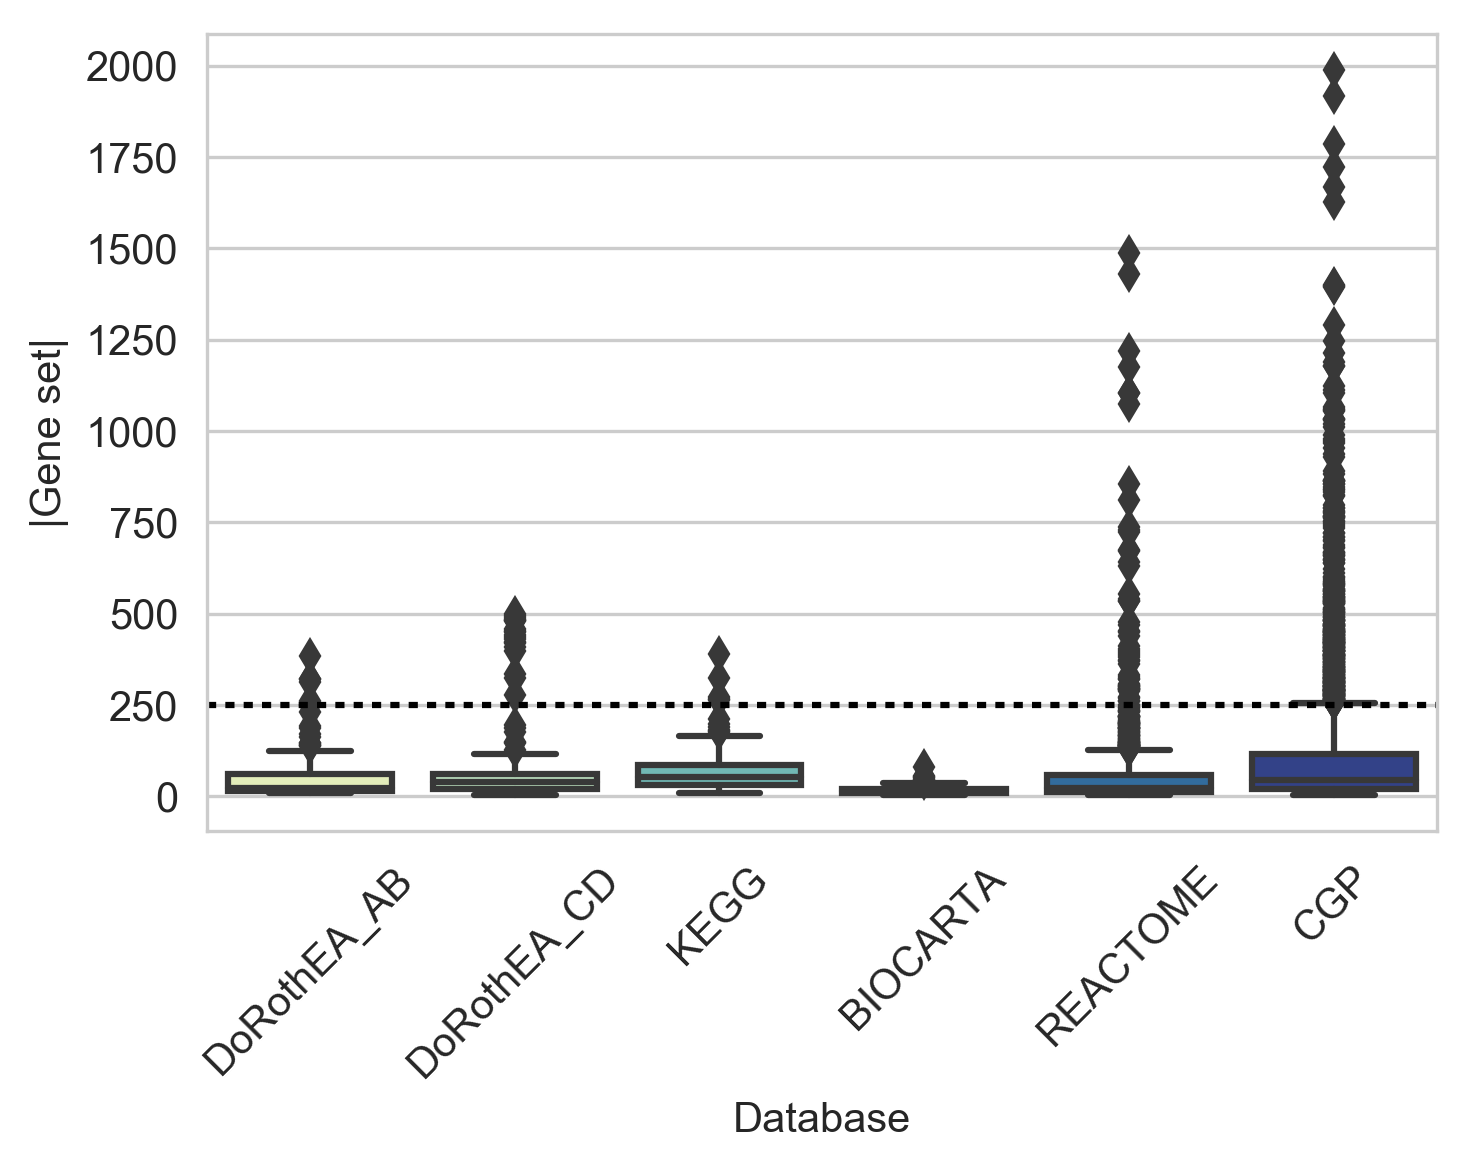

In [4]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

Gene set similarity

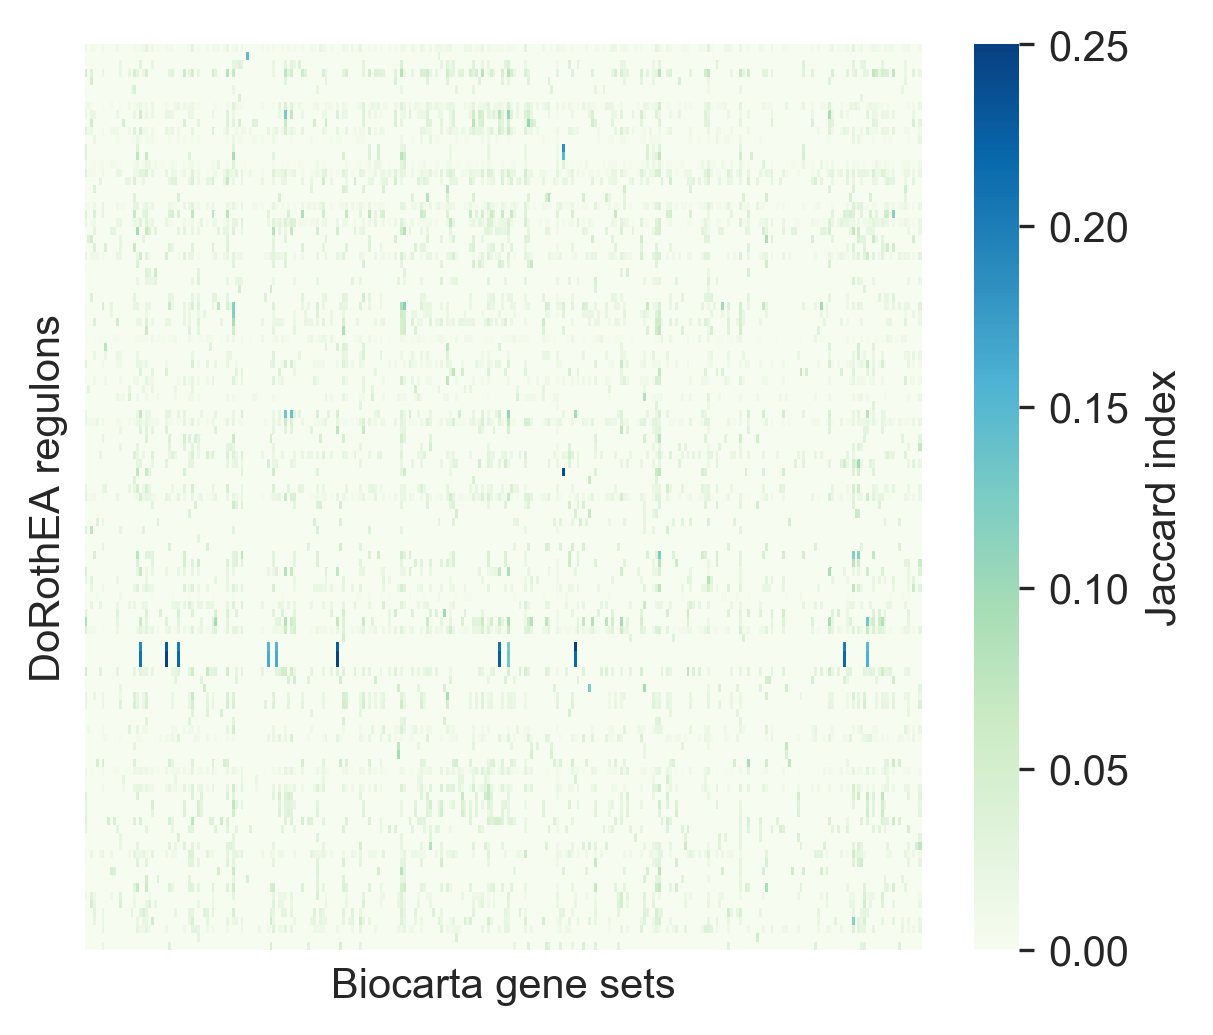

In [5]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_BIOCARTA_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu',cbar_kws={'label': 'Jaccard index'})
plt.xticks([])
plt.yticks([])
plt.xlabel('Biocarta gene sets')
plt.ylabel('DoRothEA regulons')
plt.savefig('../figures/raw/Fig2A.pdf')

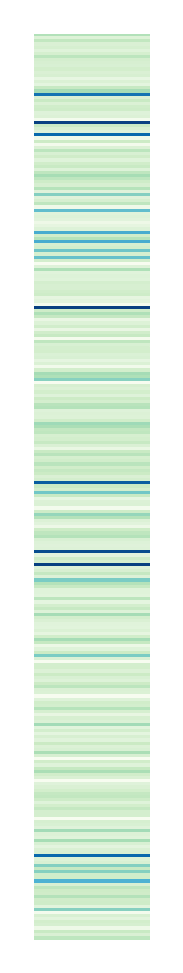

In [6]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

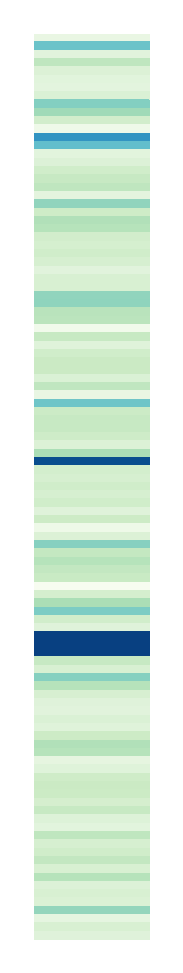

In [7]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

Gene set similarity distribution

In [48]:
dname1='BEST_dorothea_CD'
metric='jaccard'

In [69]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Real'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(5,4),dpi=300)
    sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index')
    else:
        plt.ylabel('Overlap coefficient')
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


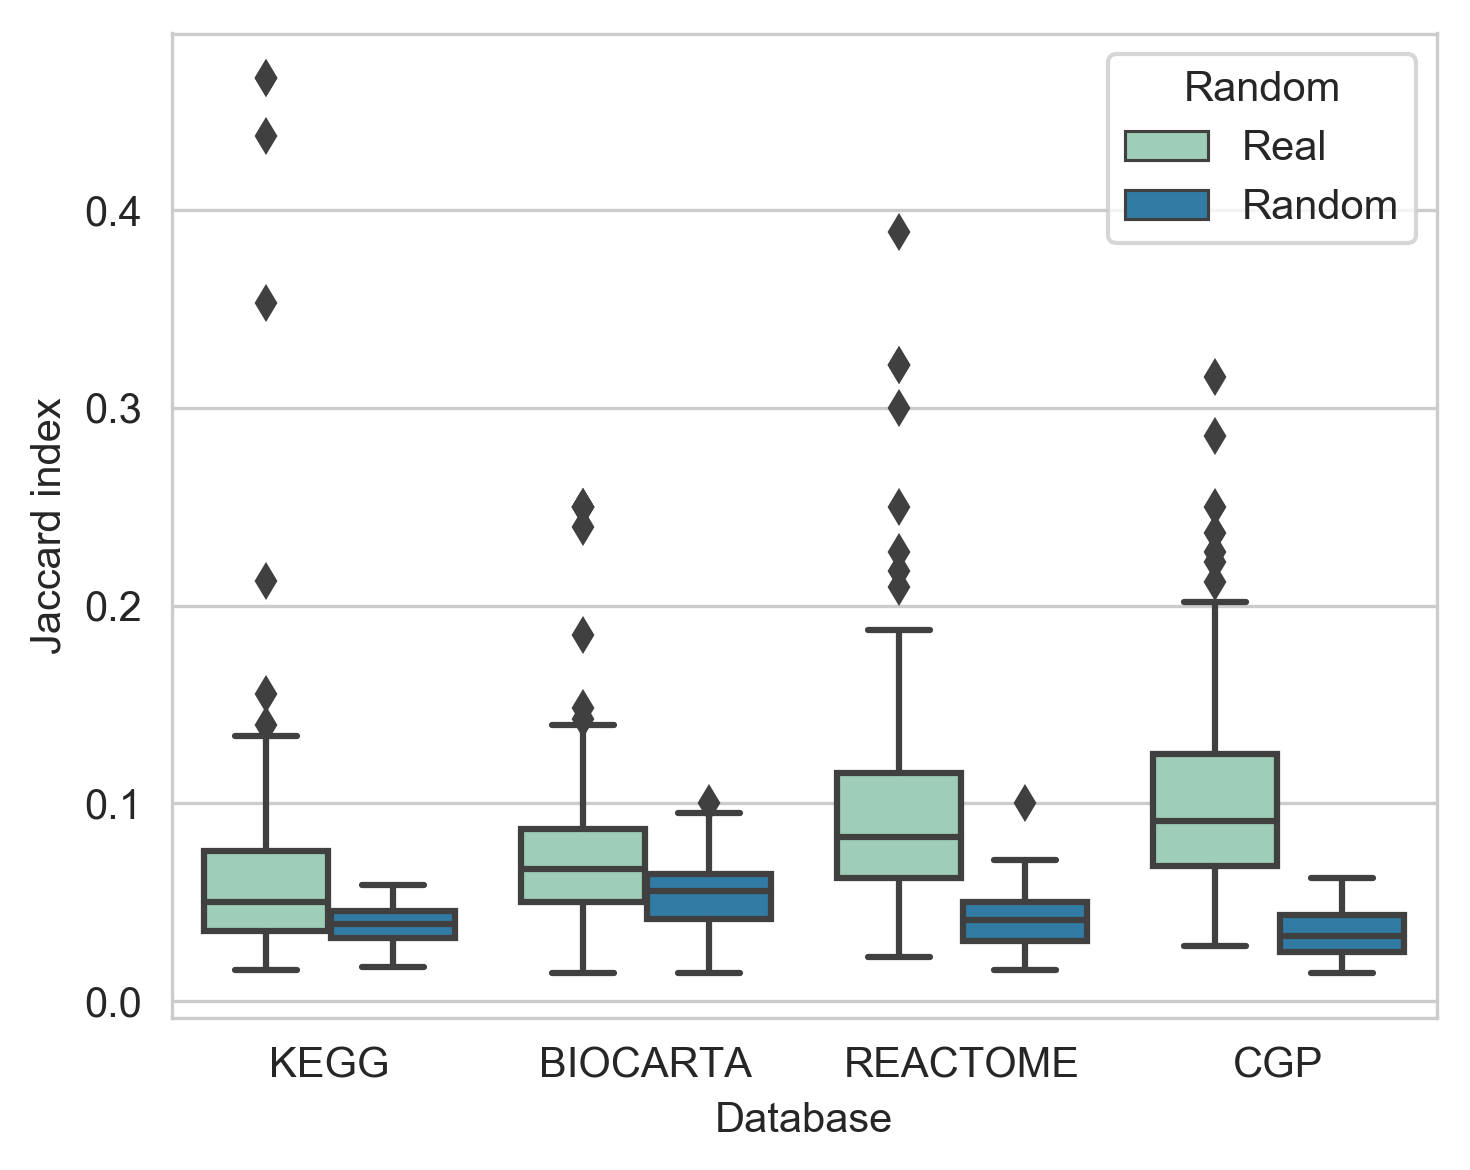

In [70]:
make_similarity_distribution('Fig2B.pdf')

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


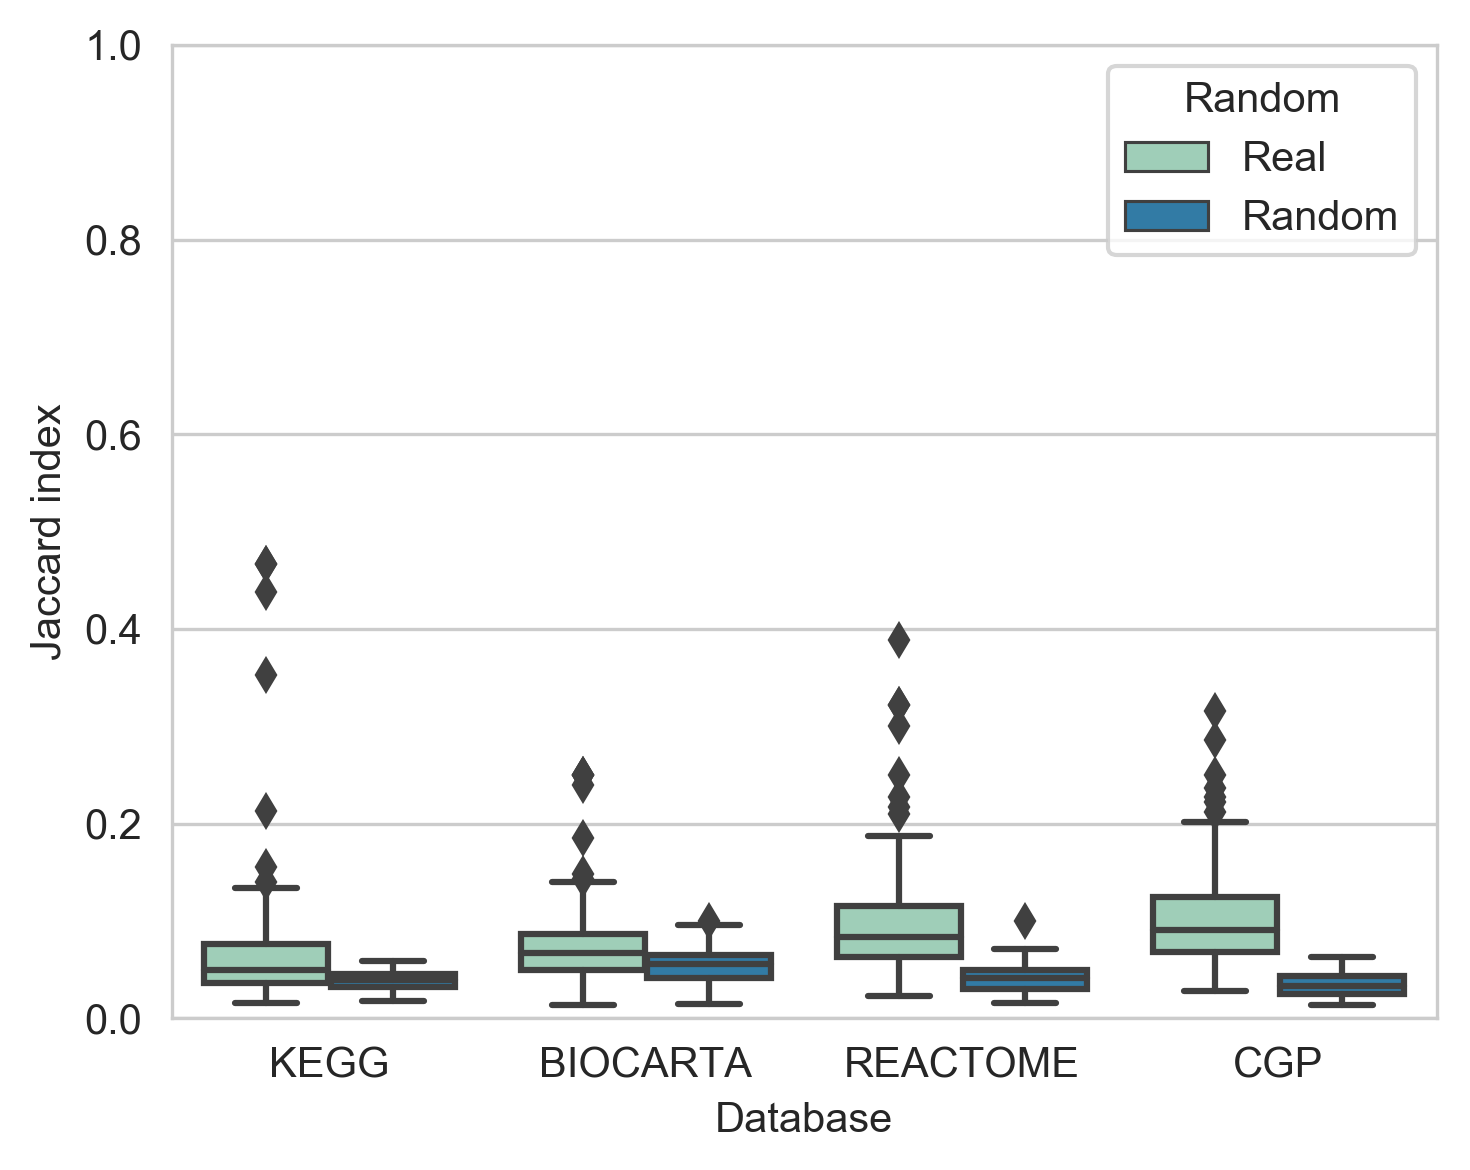

In [71]:
make_similarity_distribution('SFig2A.pdf',dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3220.0, pvalue=2.5218968221402894e-09)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=4997.0, pvalue=0.020534276748425517)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=855.5, pvalue=1.120069377082686e-28)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=261.5, pvalue=1.315089708967561e-34)


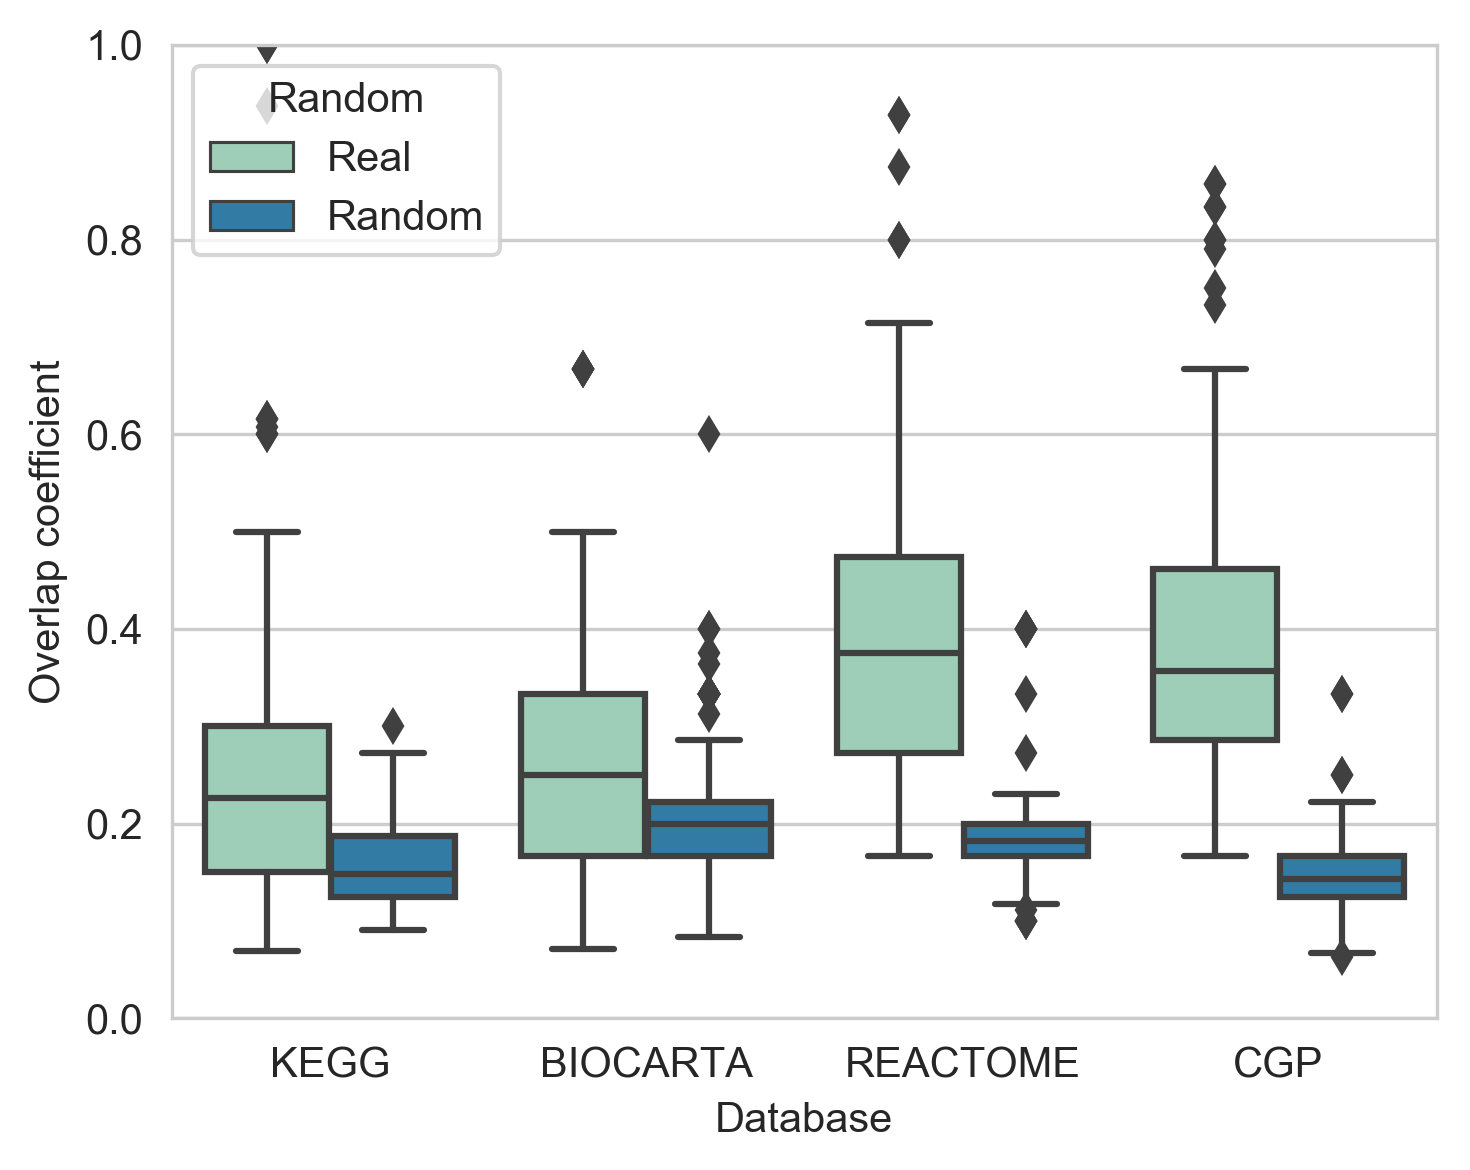

In [72]:
make_similarity_distribution('SFig2B.pdf',dname1='BEST_dorothea_AB',metric='overlap',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=26066.0, pvalue=0.001059444645452985)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=29125.5, pvalue=0.1214983383094177)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=19920.5, pvalue=2.5818771707499164e-12)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9899.0, pvalue=9.348774978947948e-40)


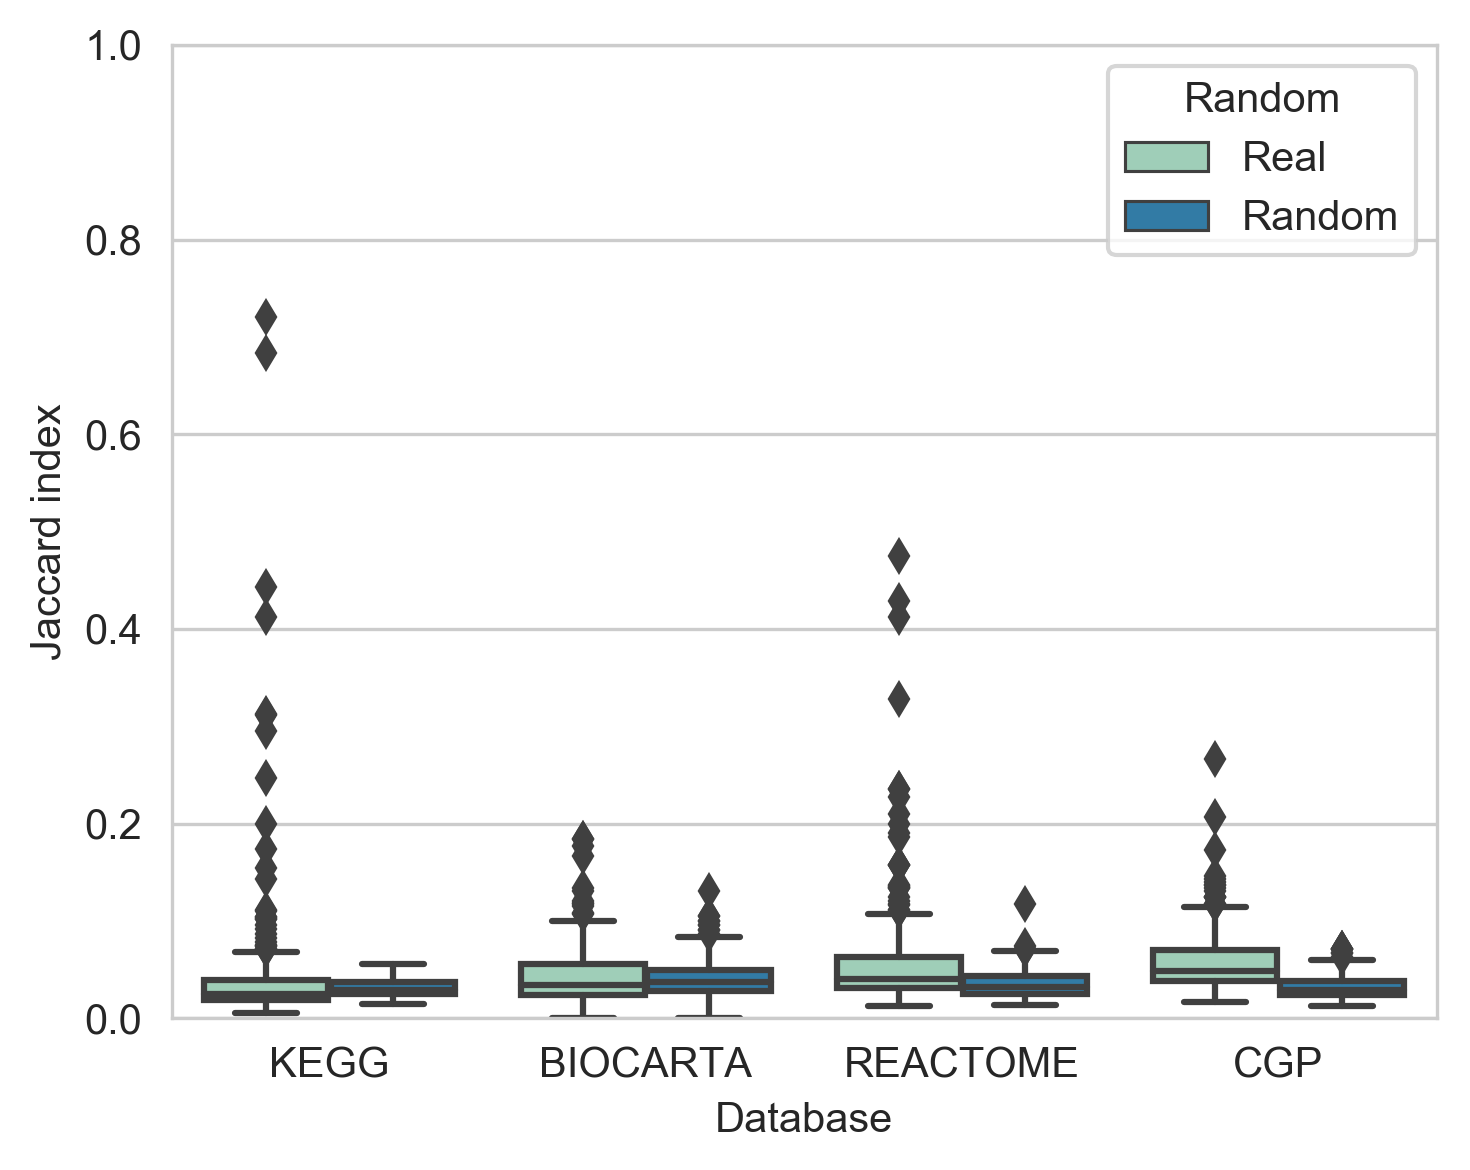

In [73]:
make_similarity_distribution('SFig2C.pdf',dname1='BEST_dorothea_CD',metric='jaccard',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=25948.0, pvalue=0.0008091049757990906)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=28088.5, pvalue=0.03289285384830791)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=16050.0, pvalue=2.331663257730446e-23)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9247.5, pvalue=5.14375156094892e-43)


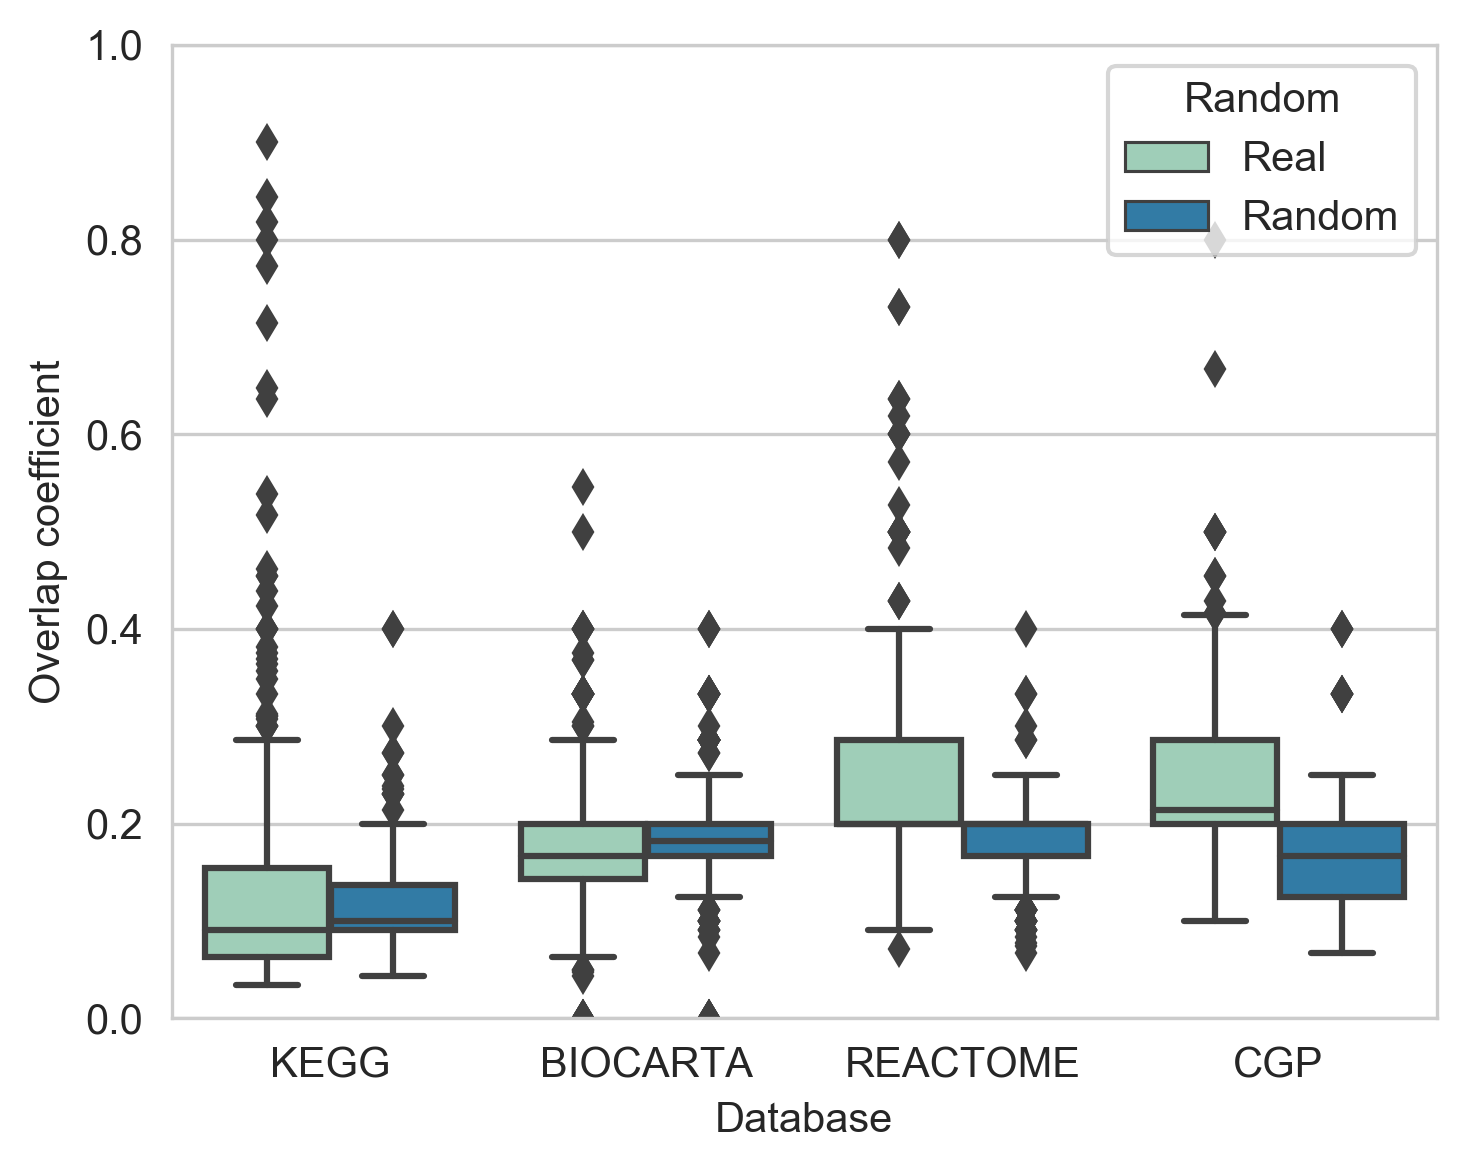

In [74]:
make_similarity_distribution('SFig2D.pdf',dname1='BEST_dorothea_CD',metric='overlap',force_ylim=True)

Shortest path distance

In [77]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [80]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [118]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance')
    plt.ylabel('Density')
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9534279550.5, pvalue=0.0)


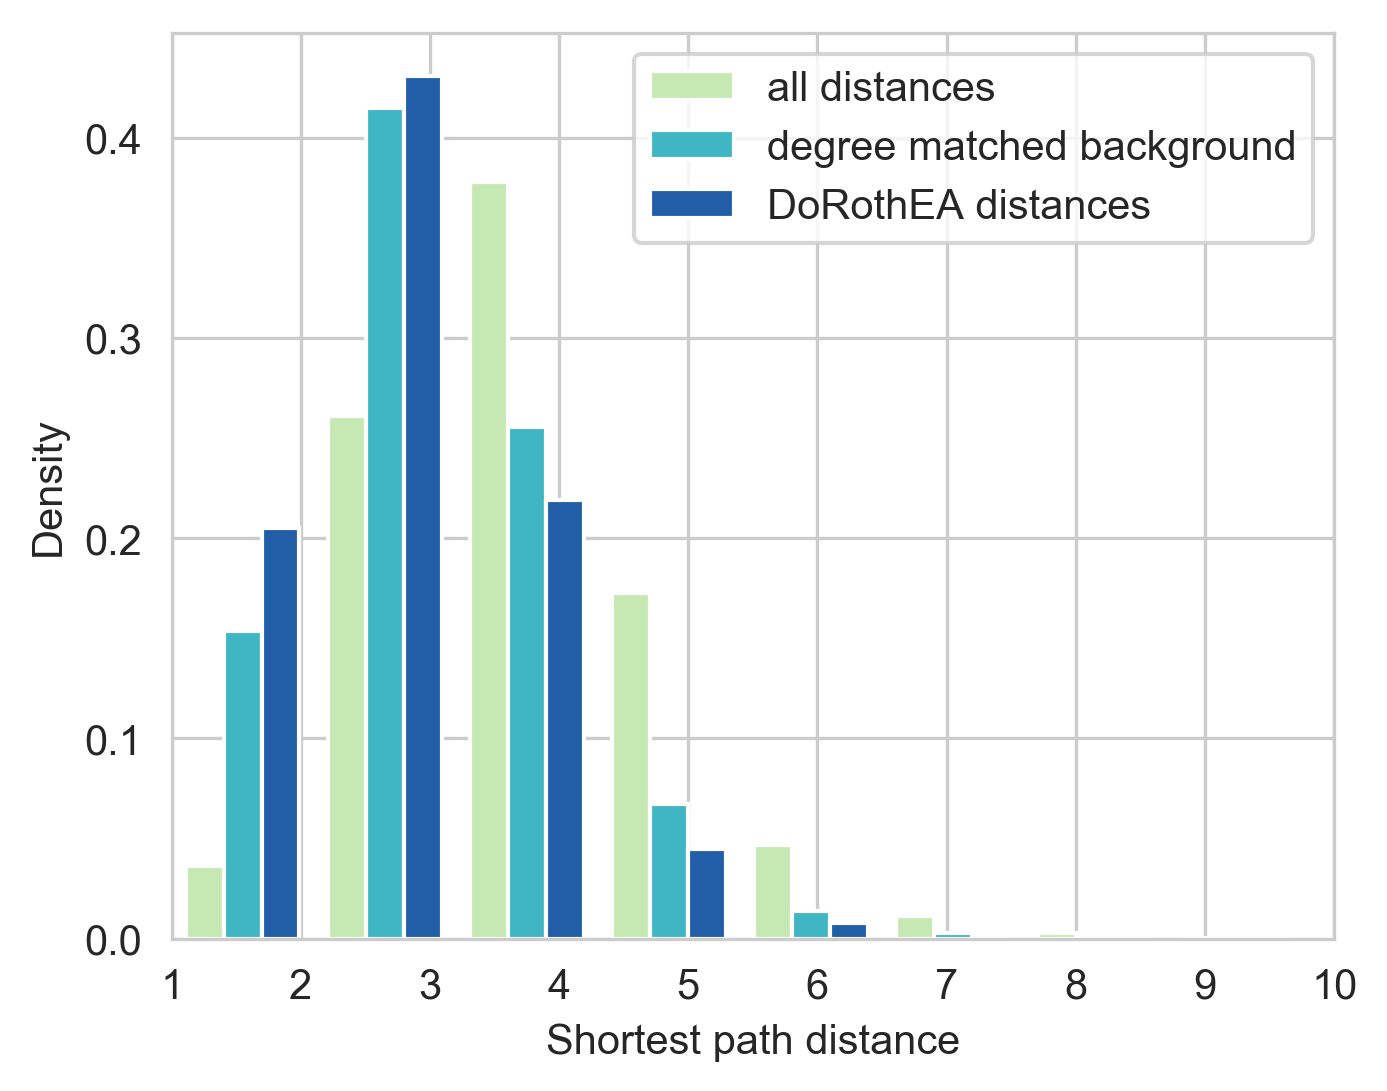

In [119]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9621477243.5, pvalue=0.0)


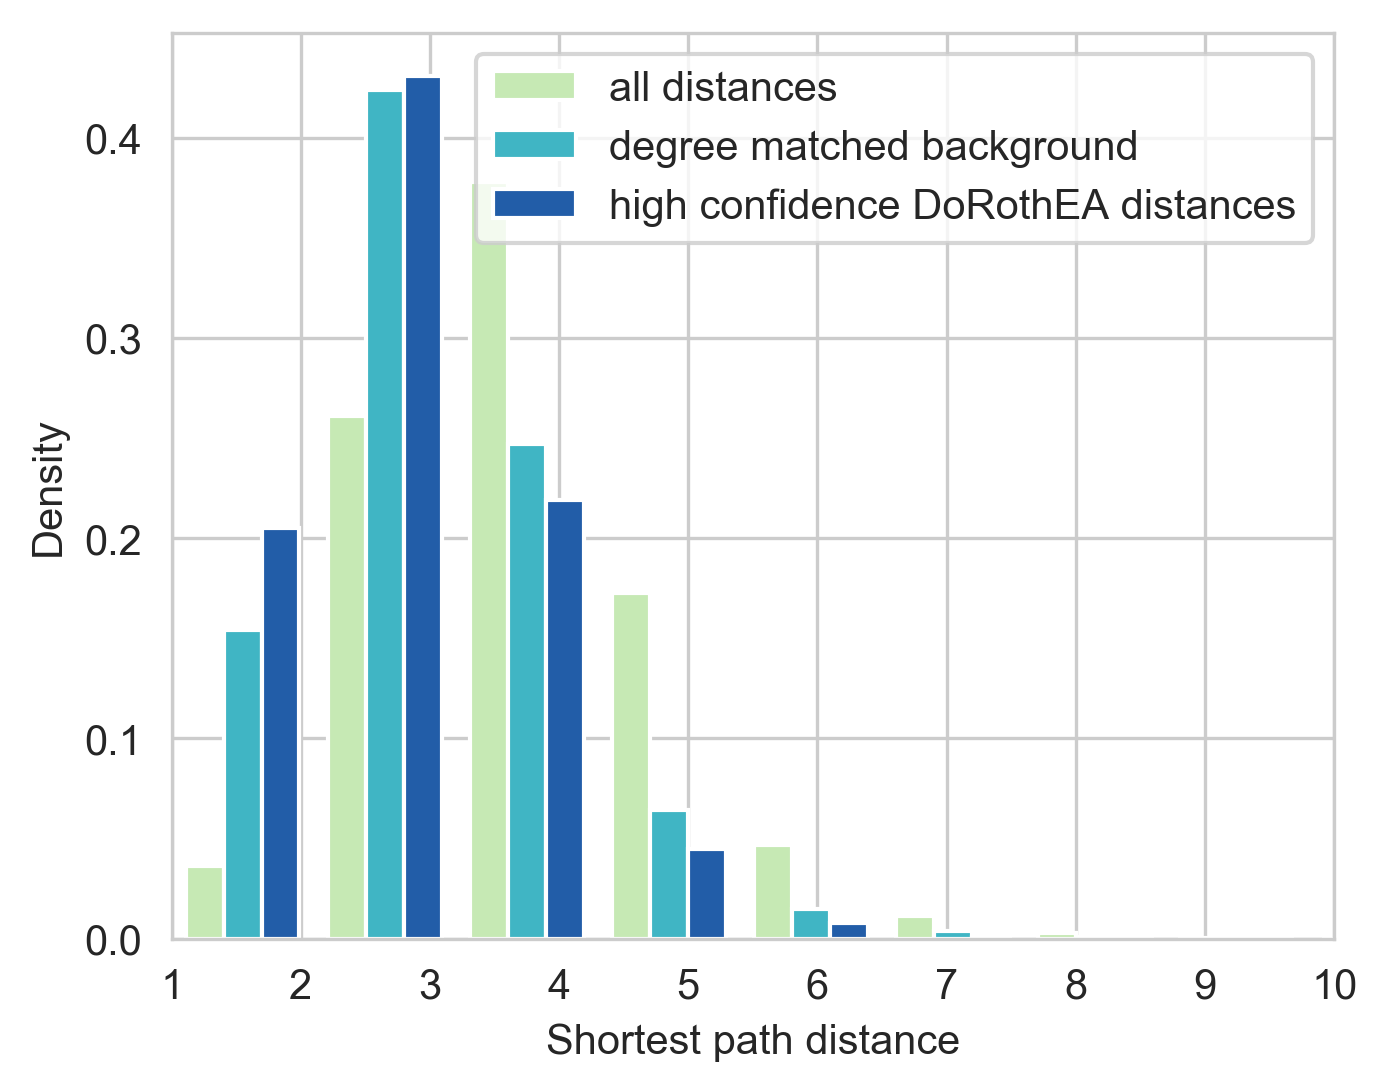

In [122]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1875202701318.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8588397534.5, pvalue=0.0)


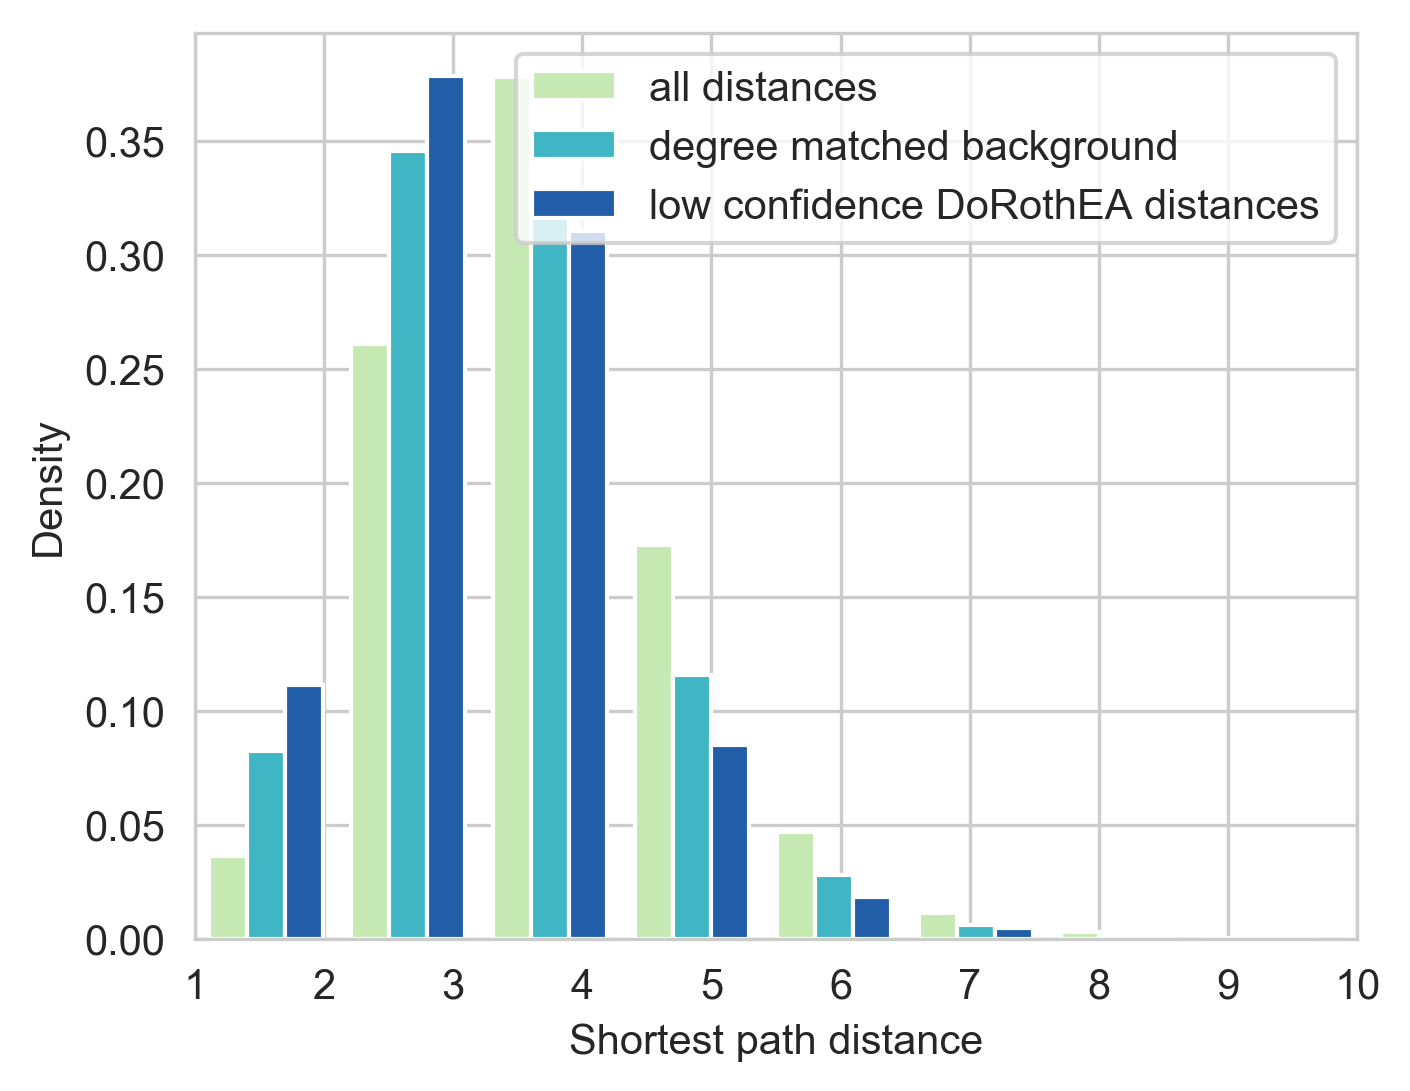

In [123]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3004285610259.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55209633449.0, pvalue=0.0)


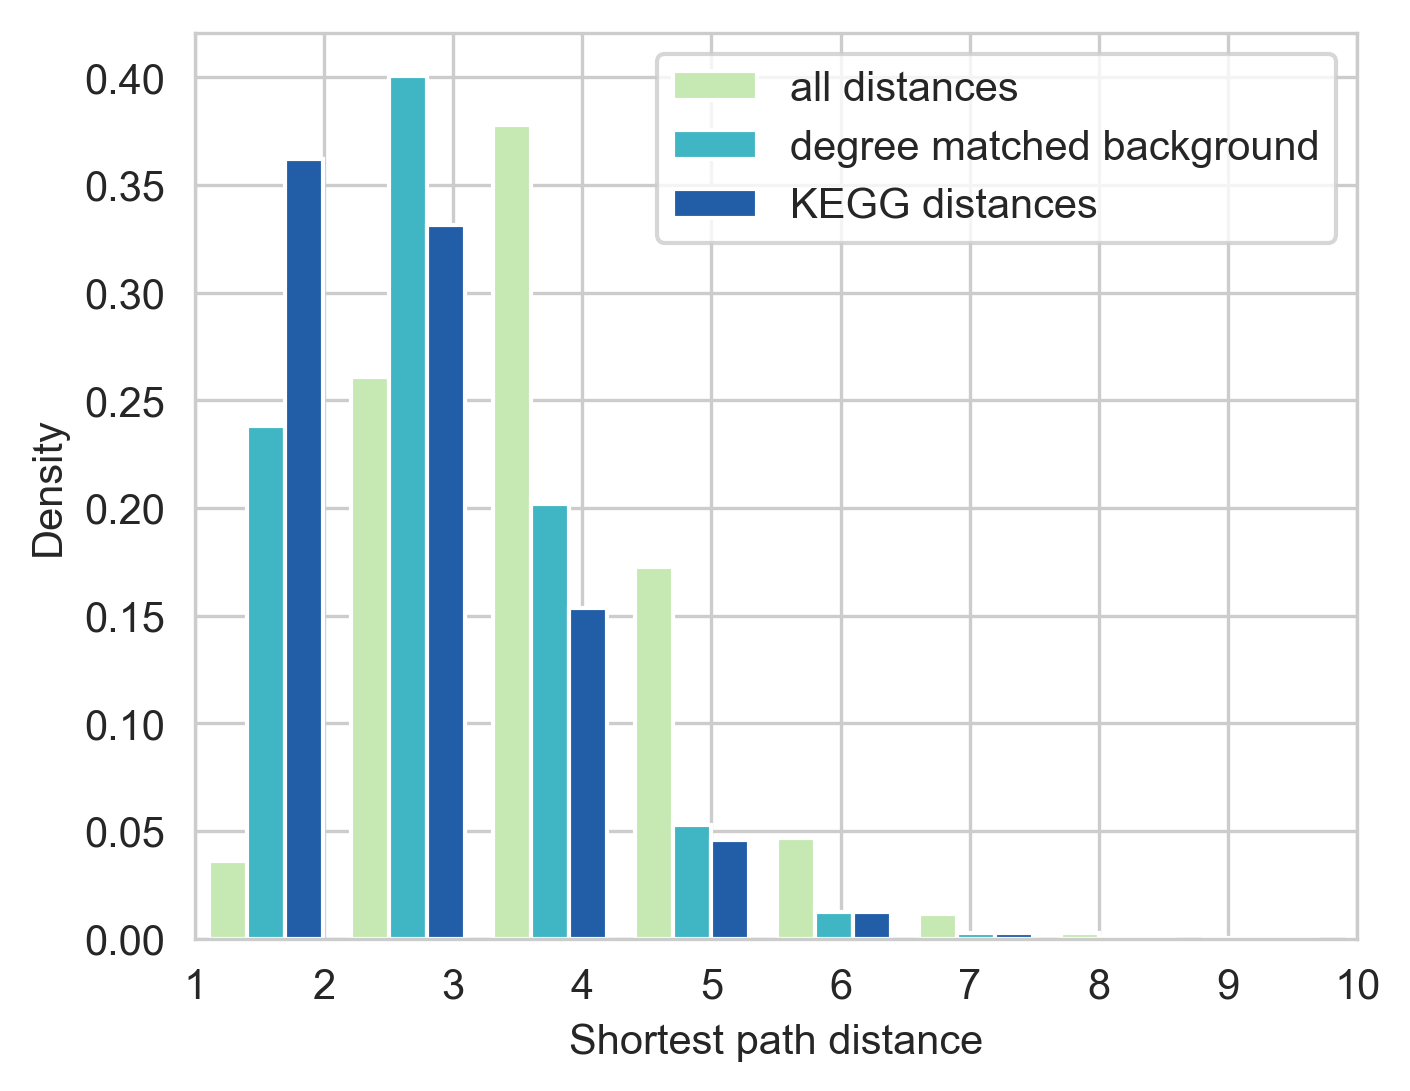

In [124]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148364150091.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=827976822.5, pvalue=0.0)


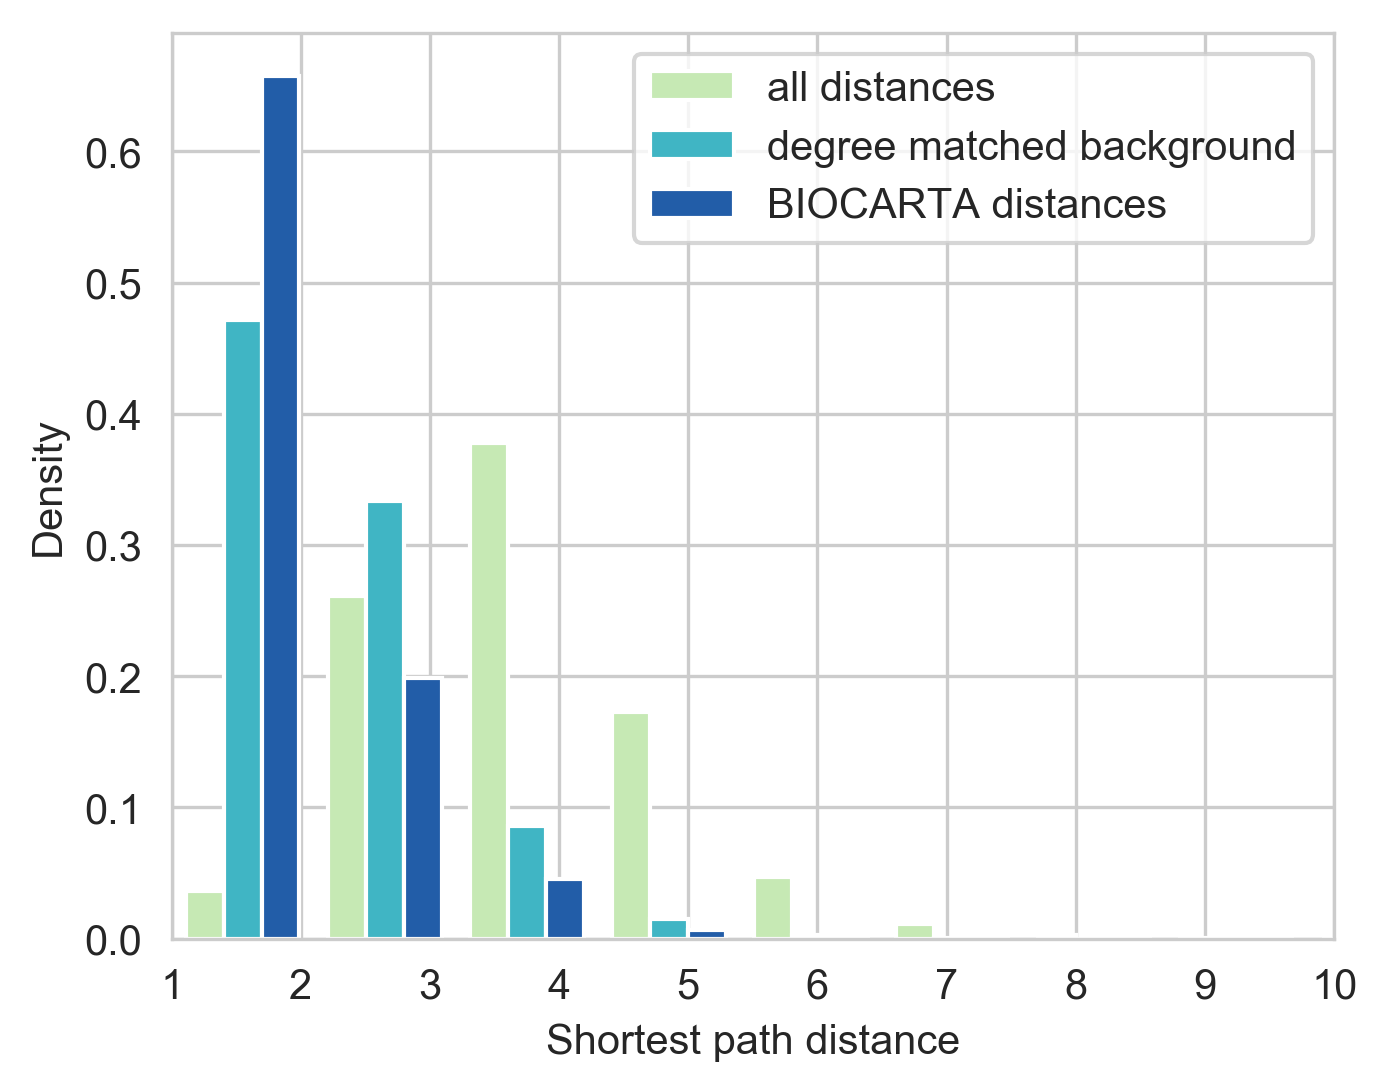

In [128]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12792509248376.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790719361316.5, pvalue=0.0)


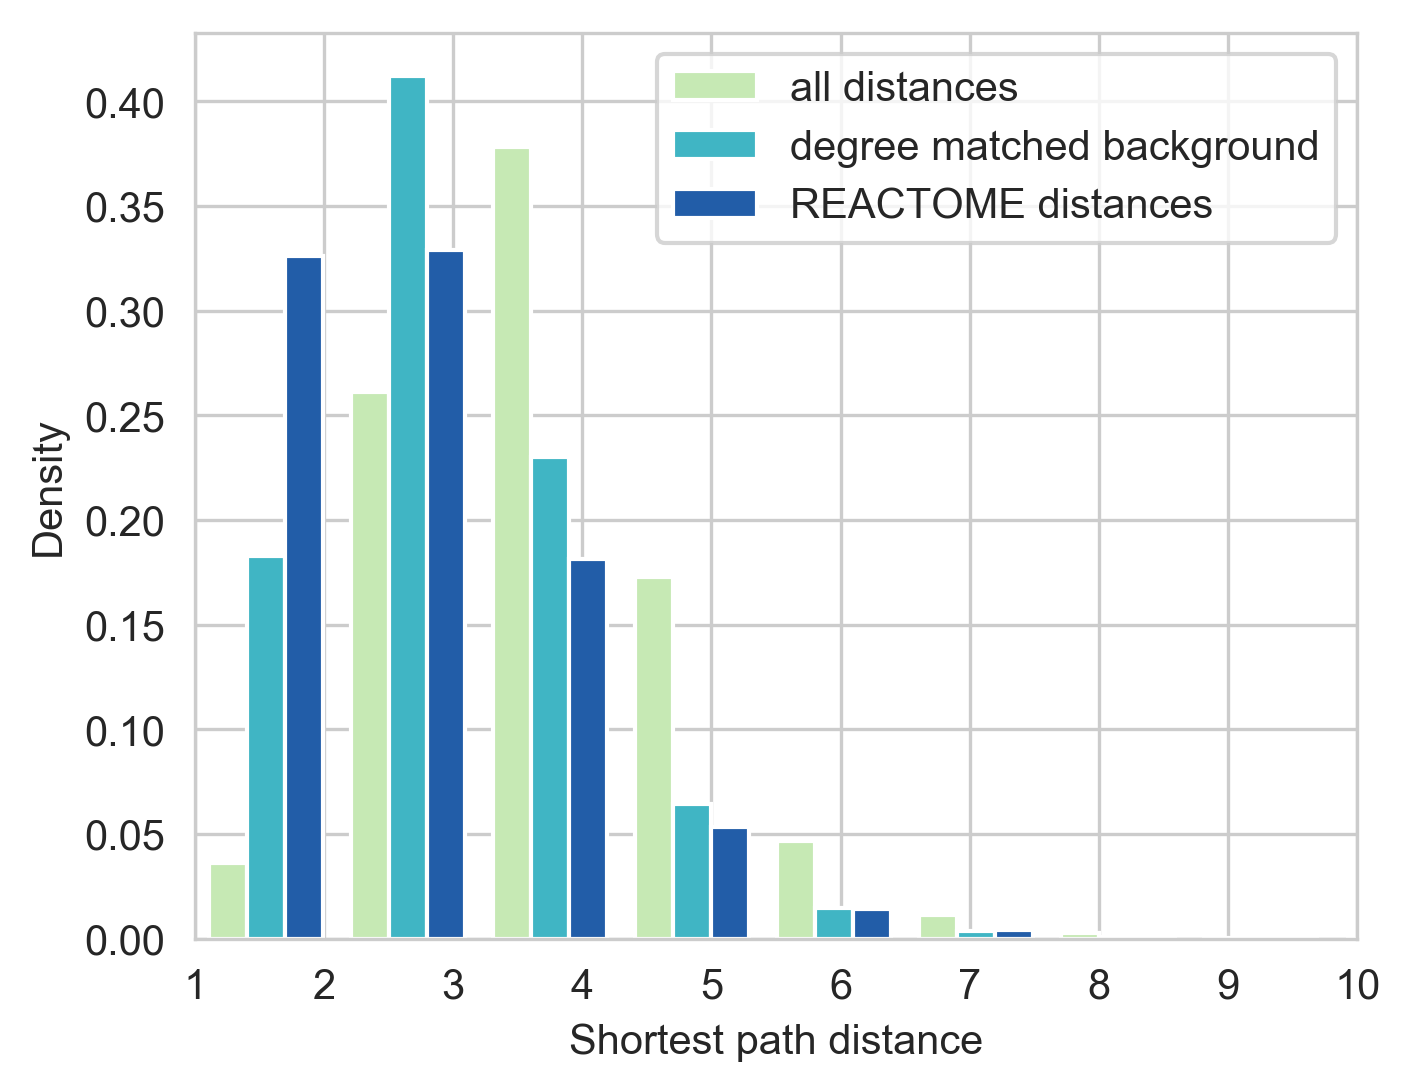

In [129]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62225351048753.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8544221811389.5, pvalue=0.0)


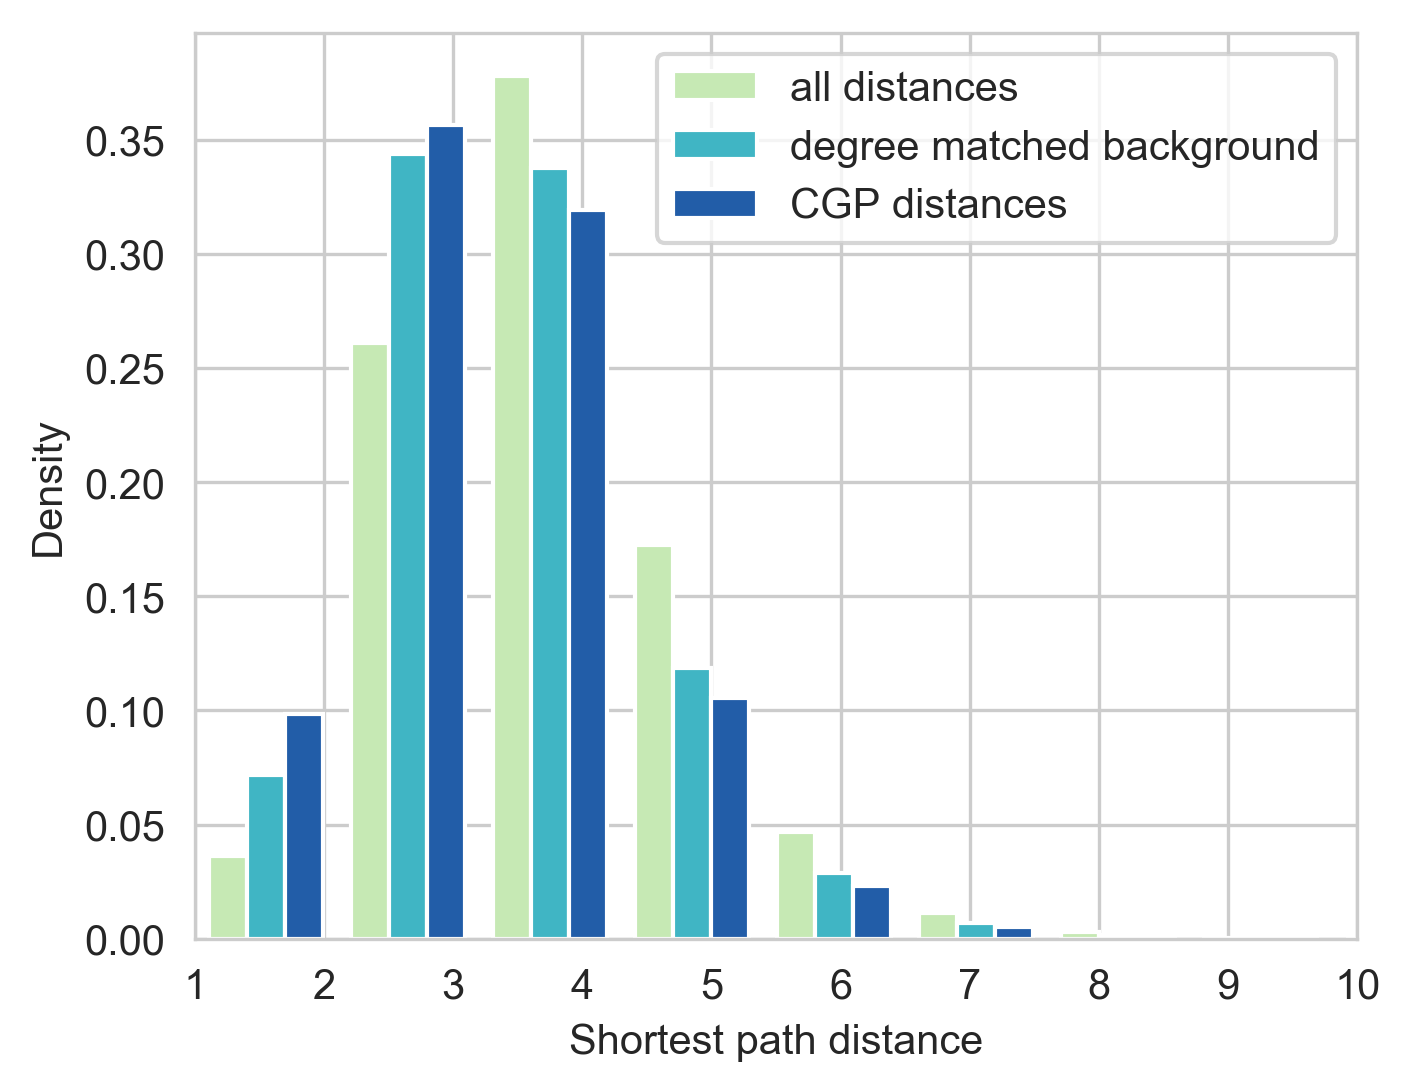

In [130]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')

Benchmark data

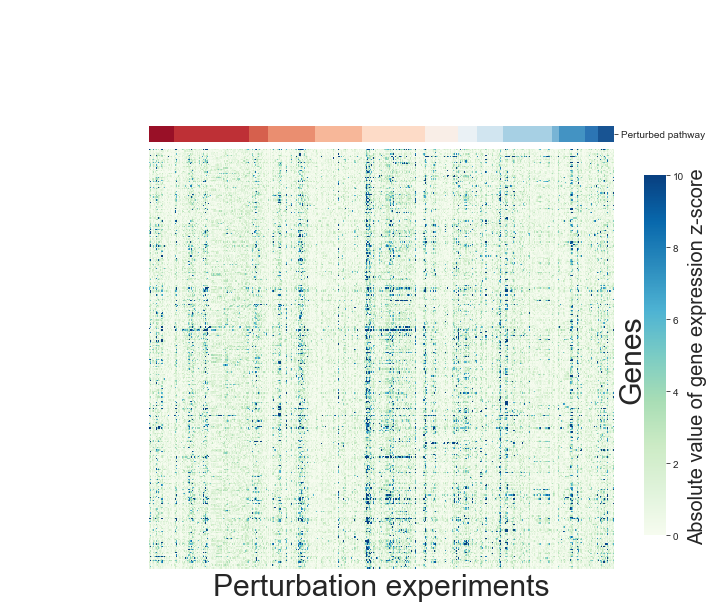

In [134]:
data=pd.read_csv('../results/benchmark/datasets/progeny_data.csv',sep=',',header=0,index_col=0).abs()
data[data<-10]=-10
data[data>10]=10
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
meta.columns=['Perturbed pathway']
col_col=dict(zip(meta['Perturbed pathway'].unique(), sns.color_palette('RdBu',14)))
g=sns.clustermap(data.iloc[:300,],cmap='GnBu',col_colors=meta['Perturbed pathway'].map(col_col),
               row_cluster=False,col_cluster=False,
               cbar_pos=(0.9, .25, .03, .5),rasterized=True)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xlabel('Perturbation experiments',size=30)
g.ax_heatmap.set_ylabel('Genes',size=30)
g.ax_cbar.set_ylabel('Absolute value of gene expression z-score',size=20)
plt.savefig('../figures/raw/Fig3A1.pdf')

In [14]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC

0.867385458682387 0.6752249457027615


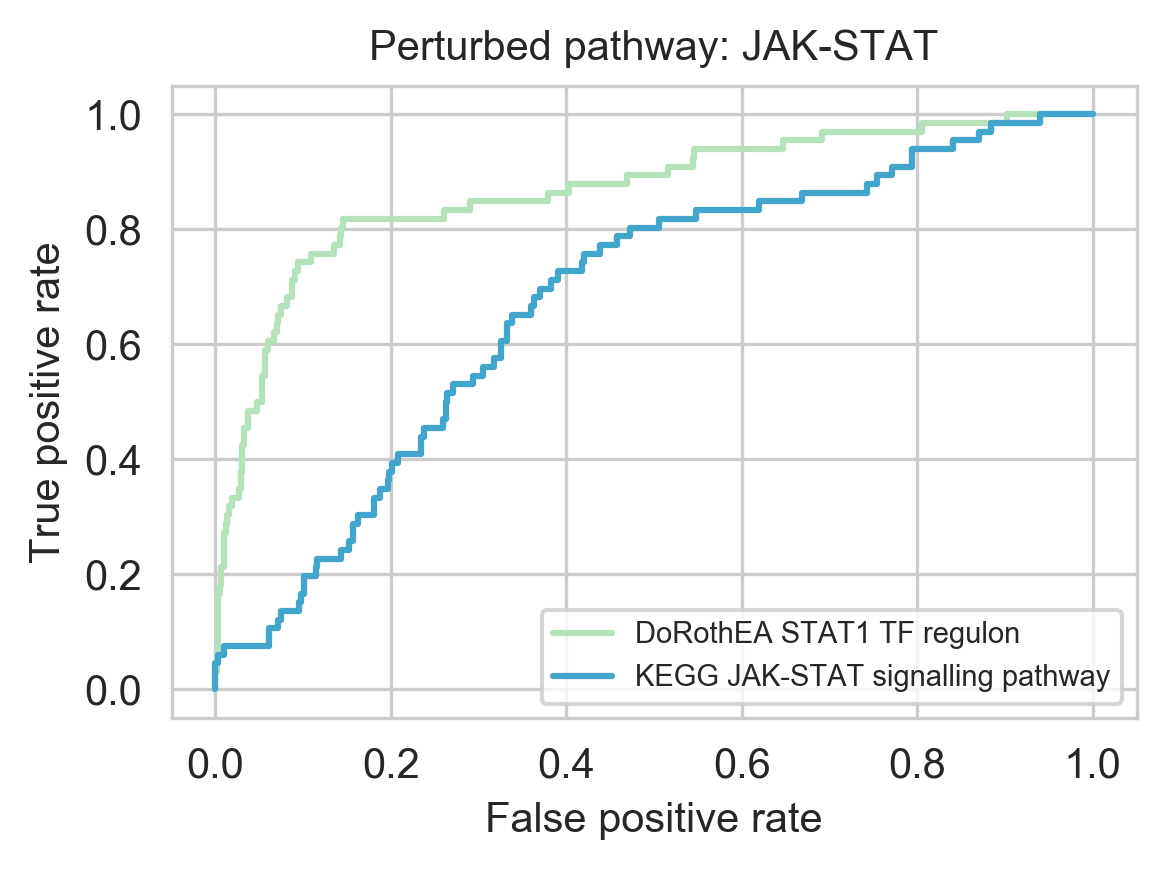

In [16]:
dorothea=pd.read_csv('../results/benchmark/scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
kegg=pd.read_csv('../results/benchmark/scores/progeny/single/KEGG_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
y_pr1=dorothea.loc['STAT1']
y_pr2=kegg.loc['KEGG_JAK_STAT_SIGNALING_PATHWAY']
y_tr=(meta['pathway']=='JAK-STAT')*1
fpr1,tpr1,th=ROC(y_true=y_tr,y_score=y_pr1)
fpr2,tpr2,th=ROC(y_true=y_tr,y_score=y_pr2)
auc1=AUC(fpr1,tpr1)
auc2=AUC(fpr2,tpr2)
sns.set_palette('GnBu',2)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate',size=10)
plt.ylabel('True positive rate',size=10)
plt.title('Perturbed pathway: JAK-STAT',size=10)
plt.legend(['DoRothEA STAT1 TF regulon','KEGG JAK-STAT signalling pathway'],fontsize=7)
plt.tight_layout()
print(auc1,auc2)
plt.savefig('../figures/raw/Fig3A2.pdf')

In [17]:
data=pd.read_csv('../results/benchmark/z_scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                sep=',',header=0,index_col=0)
data=data.sort_index()

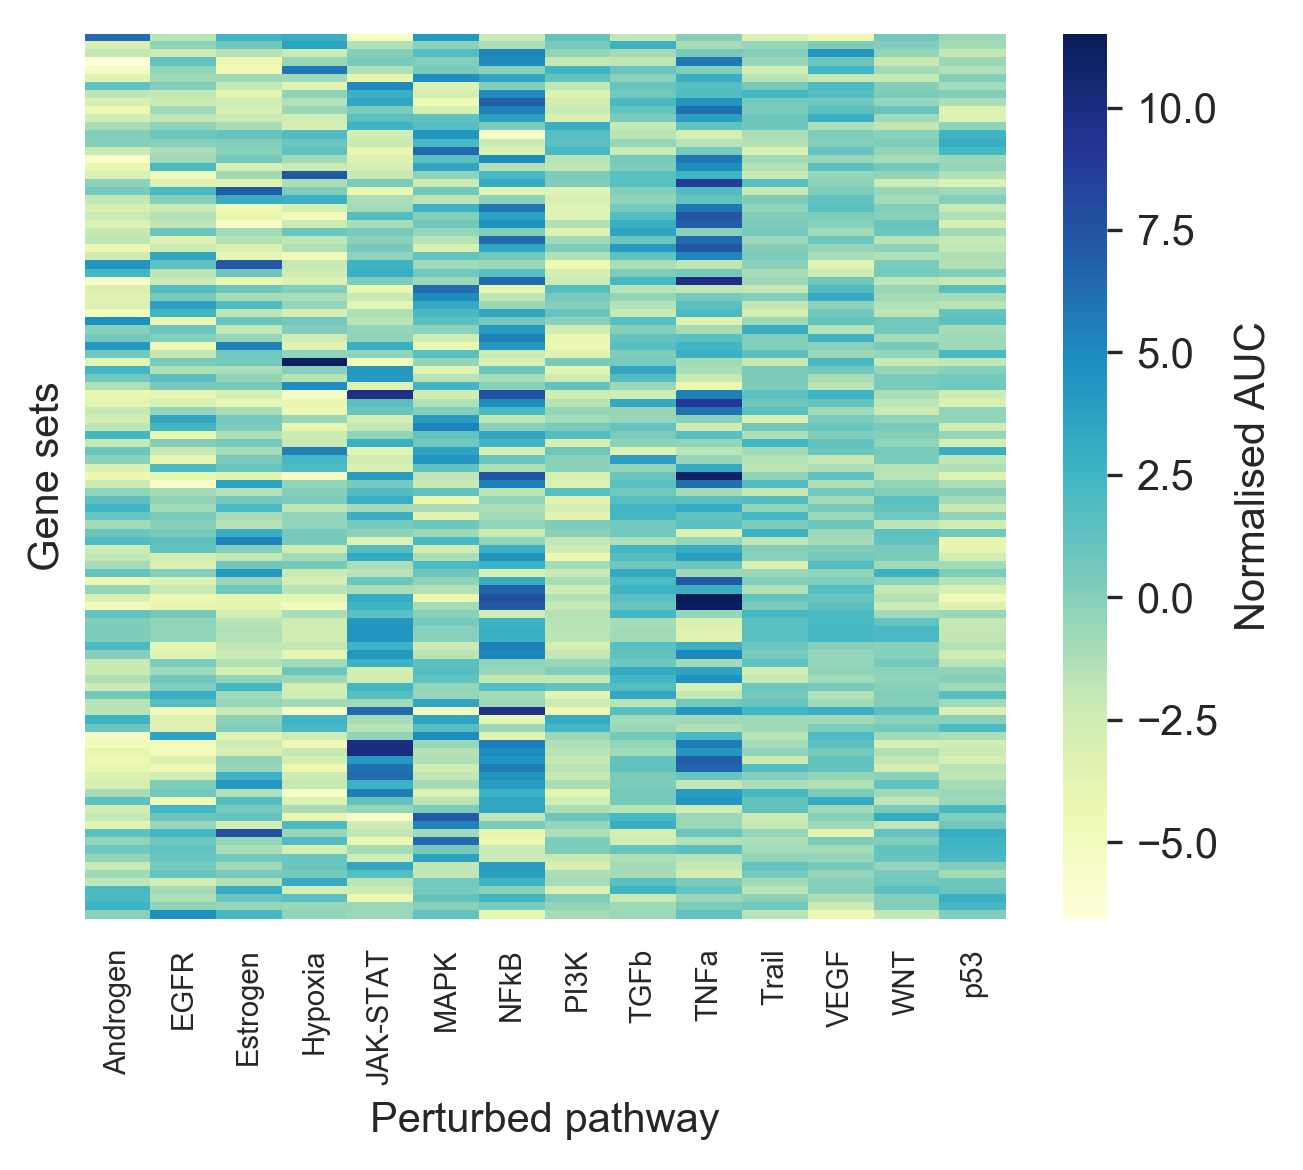

In [18]:
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data.T,cmap='YlGnBu',cbar_kws={'label': 'Normalised AUC'})
plt.xlabel('Perturbed pathway',size=10)
plt.ylabel('Gene sets',size=10)
plt.yticks([])
plt.xticks(size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig3A3.pdf')

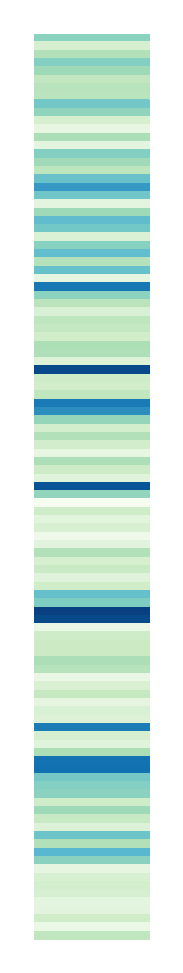

In [19]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.abs().max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig3A4.pdf')

In [135]:
def get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs'):
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','CGP','KEGG','BIOCARTA','REACTOME']
    scores=[]
    for fname in datasets:
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,'_random',abstype),
                         sep=',',header=0,index_col=0)
        scores+=list(data.values.reshape((1,-1))[0])
    scores=np.array(scores)
    th=np.std(scores)*2.5
    m=np.mean(scores)
    print(m)
    results=pd.DataFrame(columns=['Rtype','Dataset','Informative','Total'])
    for rtype in ['_random','_filtered']:
        for fname in datasets:
            data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,rtype,abstype),
                             sep=',',header=0,index_col=0)
            p=((data.abs()>th).sum(0)>0).sum()
            n=data.shape[1]
            temp=pd.DataFrame(index=[len(results)],columns=results.columns)
            temp.loc[len(results)]=[rtype,fname,p,n]
            results=pd.concat([results,temp])
    results['Prop']=results['Informative']/results['Total']
    results['Non_informative']=results['Total']-results['Informative']
    results=results.sort_values(['Dataset','Rtype'])
    results.index=range(len(results))
    return results

In [144]:
def plot_lollipop(results,fname=False):
    plt.figure(figsize=(5,4),dpi=300)
    colors=sns.color_palette('GnBu',2)
    fil=results['Rtype']=='_filtered'
    plt.hlines(y=results.index[fil], xmin=0, xmax=results['Prop'][fil], color=colors[0])
    plt.hlines(y=results.index[~fil], xmin=0, xmax=results['Prop'][~fil], color=colors[1])
    plt.plot(results['Prop'][fil],results.index[fil],'o',color=colors[0])
    plt.plot(results['Prop'][~fil],results.index[~fil],'o',color=colors[1])
    dnames=['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME']
    plt.yticks((results.index[fil]+results.index[~fil])/2,dnames)
    plt.xlabel('Informative / non-informative ratio',size=13)
    plt.legend(['Real','Random'])
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname+'.pdf')

In [137]:
def make_fisher_test(data):
    fil=results['Rtype']=='_filtered'
    a=results['Informative'][fil].sum()
    b=results['Informative'][~fil].sum()
    c=results['Non_informative'][fil].sum()
    d=results['Non_informative'][~fil].sum()
    print('vs. random:',fisher_exact([[a,b],[c,d]]))
    for dataset in data['Dataset'].unique():
        fil=results['Rtype']=='_filtered'
        fil1=(results['Dataset']=='BEST_dorothea_AB')&fil
        fil2=(results['Dataset']==dataset)&fil
        a=results['Informative'][fil1].sum()
        b=results['Informative'][fil2].sum()
        c=results['Non_informative'][fil1].sum()
        d=results['Non_informative'][fil2].sum()
        print('Dorothea vs. ',dataset,fisher_exact([[a,b],[c,d]]))

-0.013246926042144856
vs. random: (2.7603475602250813, 9.409076993897767e-122)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.344710723795691, 0.0003797428092137405)
Dorothea vs.  BIOCARTA (1.454194792671167, 0.11285753068156079)
Dorothea vs.  CGP (1.4261395876678646, 0.07700462862129548)
Dorothea vs.  KEGG (1.6290408055113939, 0.05160847638619953)
Dorothea vs.  REACTOME (2.2303697734801684, 9.521660745376138e-05)


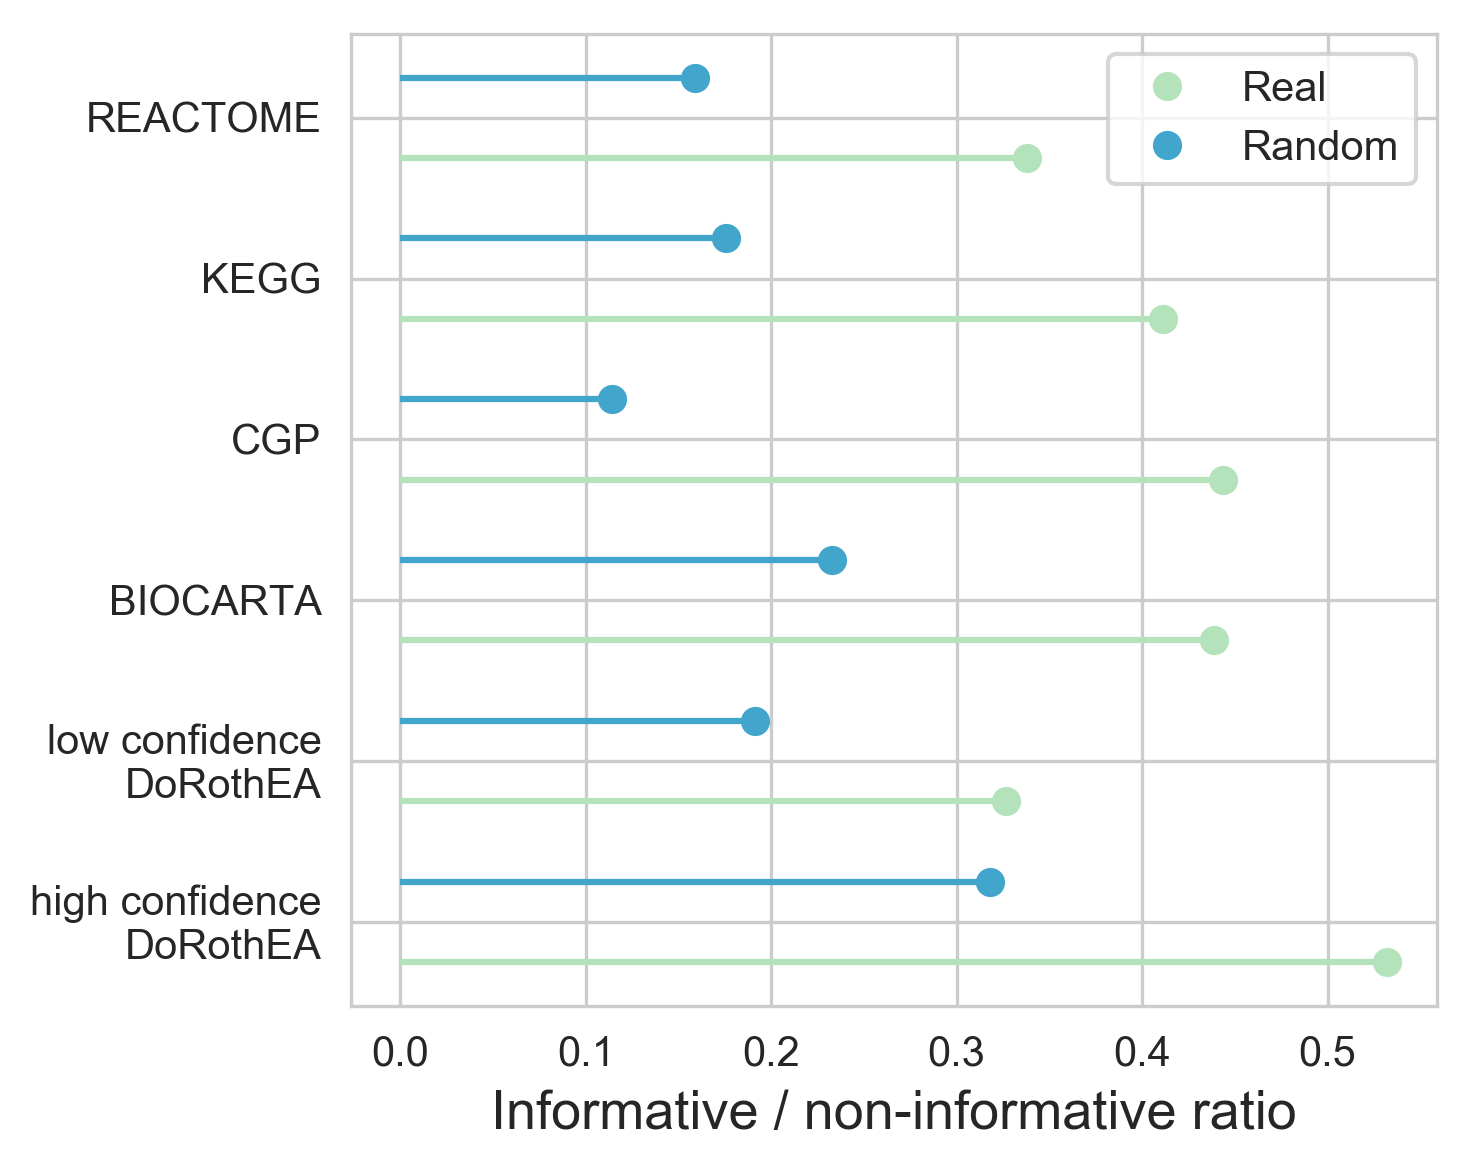

In [150]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='_abs')
plot_lollipop(results,'Fig3B')
make_fisher_test(results)

-0.02991655321601201
vs. random: (1.3835938615419014, 5.356454848062025e-16)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.1850299401197604, 0.005058295266152969)
Dorothea vs.  BIOCARTA (2.9410919540229883, 4.753711536466407e-05)
Dorothea vs.  CGP (1.5421198156682028, 0.09275477740412211)
Dorothea vs.  KEGG (1.7457692307692307, 0.06732295438230555)
Dorothea vs.  REACTOME (3.0480163360560093, 2.0469321909684364e-06)


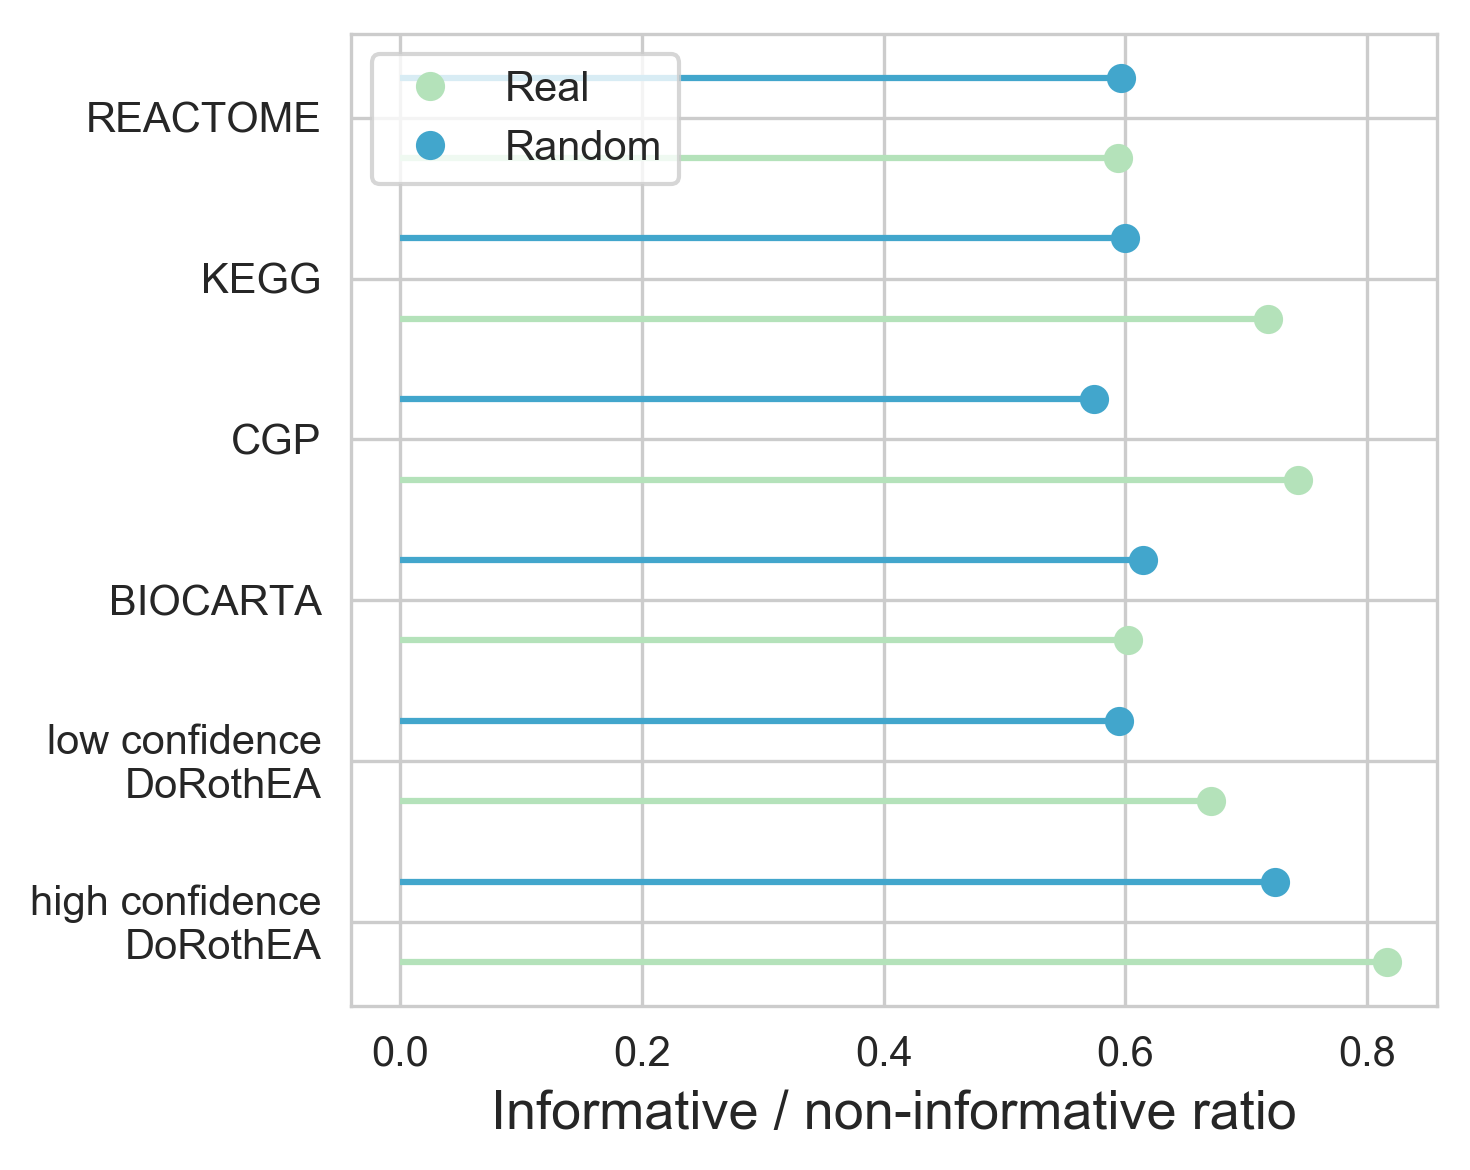

In [149]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs')
plot_lollipop(results,'Fig3C')
make_fisher_test(results)

-0.04333389154584836


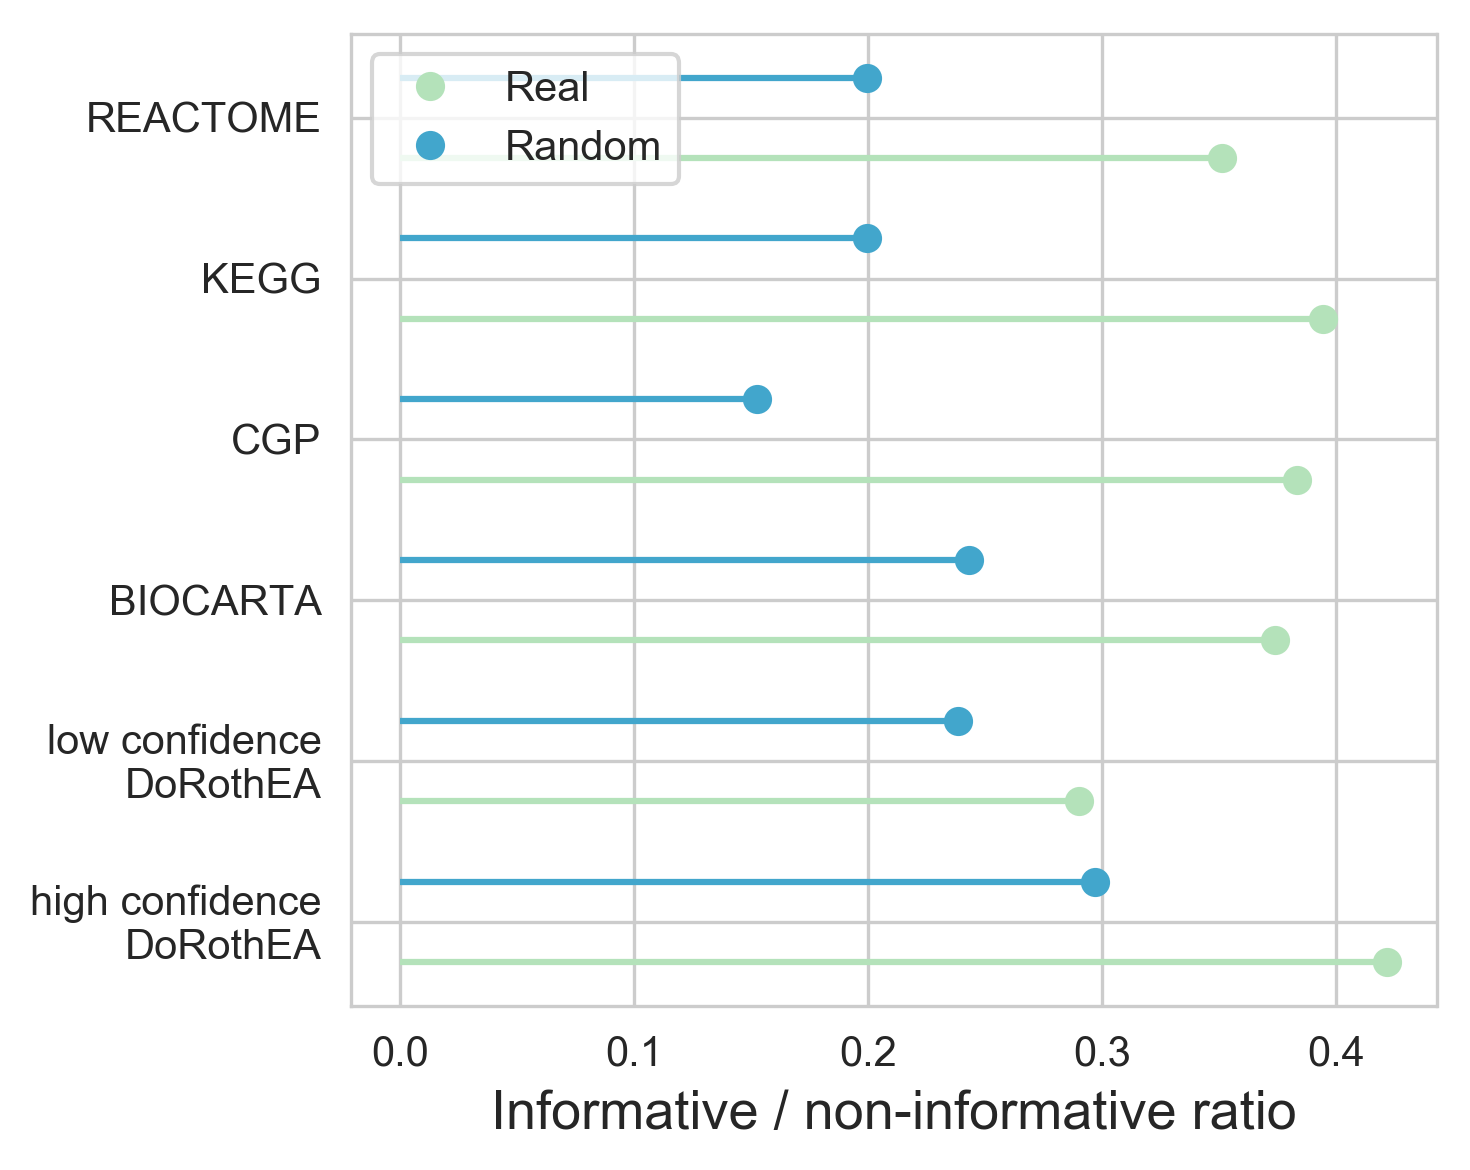

In [151]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='')
plot_lollipop(results,'SFig5A')

-0.21467888372146707


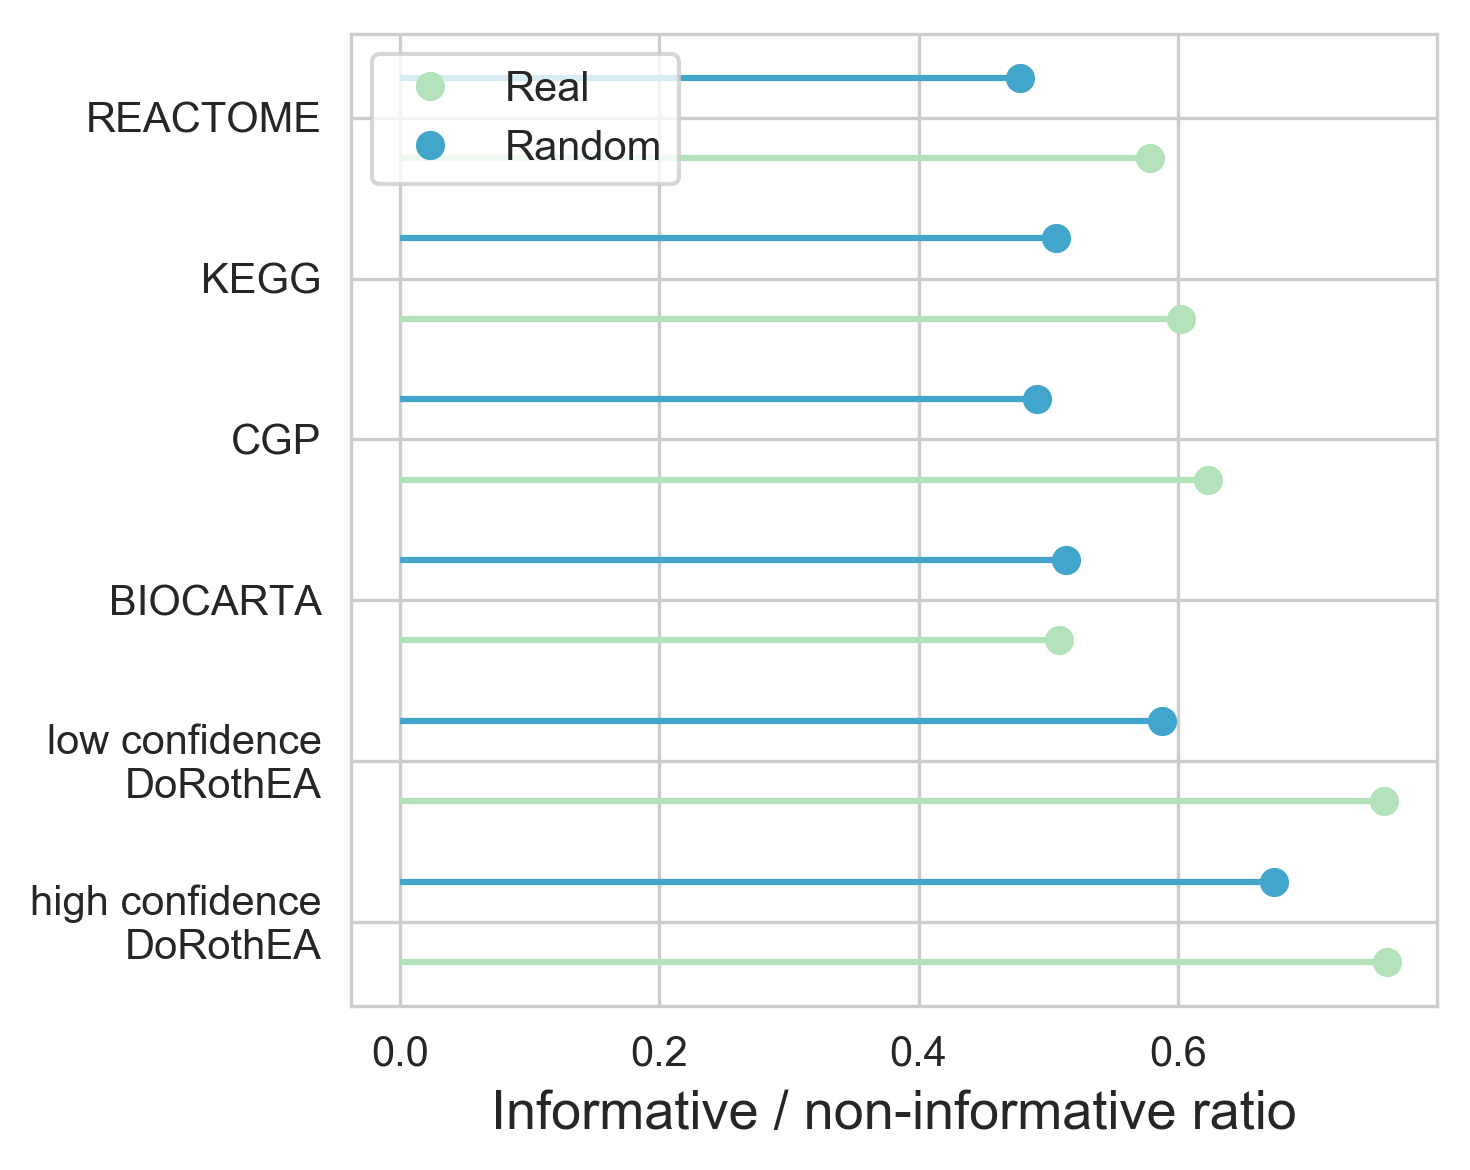

In [152]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='')
plot_lollipop(results,'SFig5B')

In [45]:
def plot_informative_score(benchmark='progeny',add_abs=True,final_name='Fig3B'):
    results=pd.DataFrame(columns=['Database','Random','Setname','Score'])
    for i in range(len(datasets)):
        fname=datasets[i]
        if add_abs:
            fname+='_abs.csv'
        else:
            fname+='.csv'
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s' % (benchmark,fname) ,sep=',',header=0,index_col=0)
        data=pd.DataFrame(data.abs().max())
        data['Database']=dnames[i//2]
        if (i%2)==0:
            data['Random']='Real'
        else:
            data['Random']='Random'
        data['Setname']=data.index
        data.columns=['Score','Database','Random','Setname']
        data=data[results.columns]
        results=pd.concat([results,data])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',2)
    sns.boxplot(x='Database',y='Score',hue='Random',data=results)
    plt.legend(loc=1)
    plt.xticks(rotation=45)
    plt.ylabel('Gene set informative score\n(normalised AUC)')
    plt.tight_layout()
    plt.savefig('../figures/raw/'+final_name+'.pdf')
    results.to_csv('../results/benchmark/'+final_name+'.csv',sep=',')

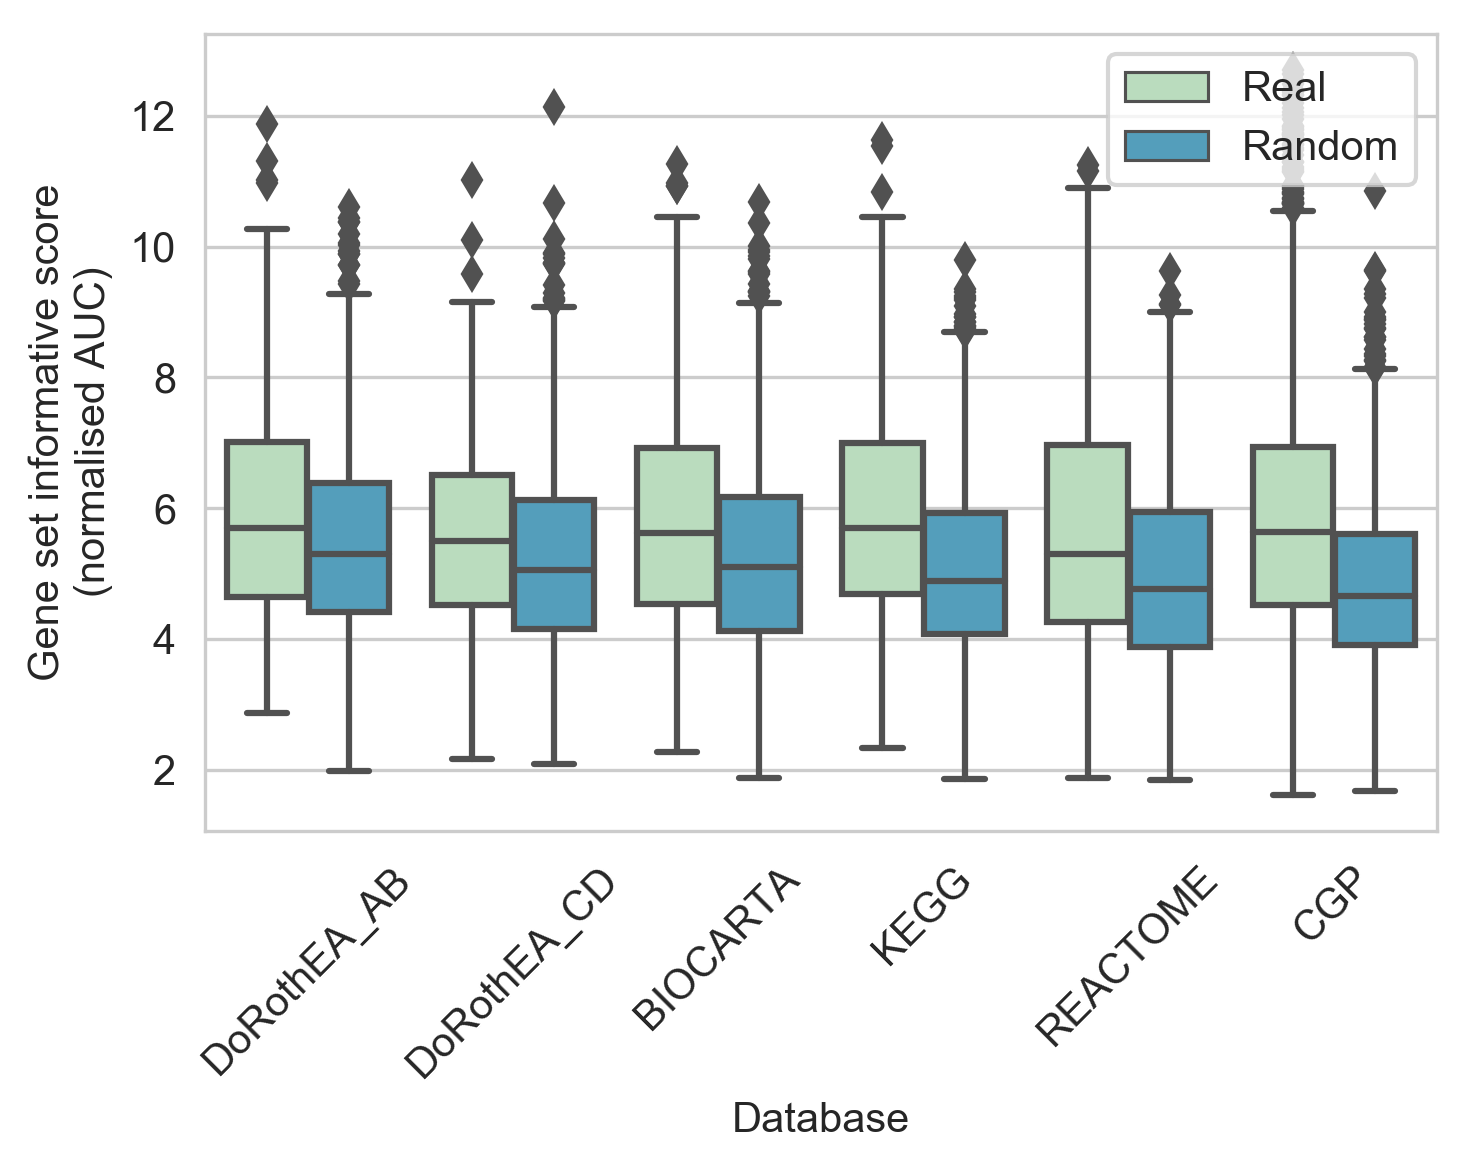

In [49]:
plot_informative_score(benchmark='progeny',add_abs=False,final_name='Fig3B')

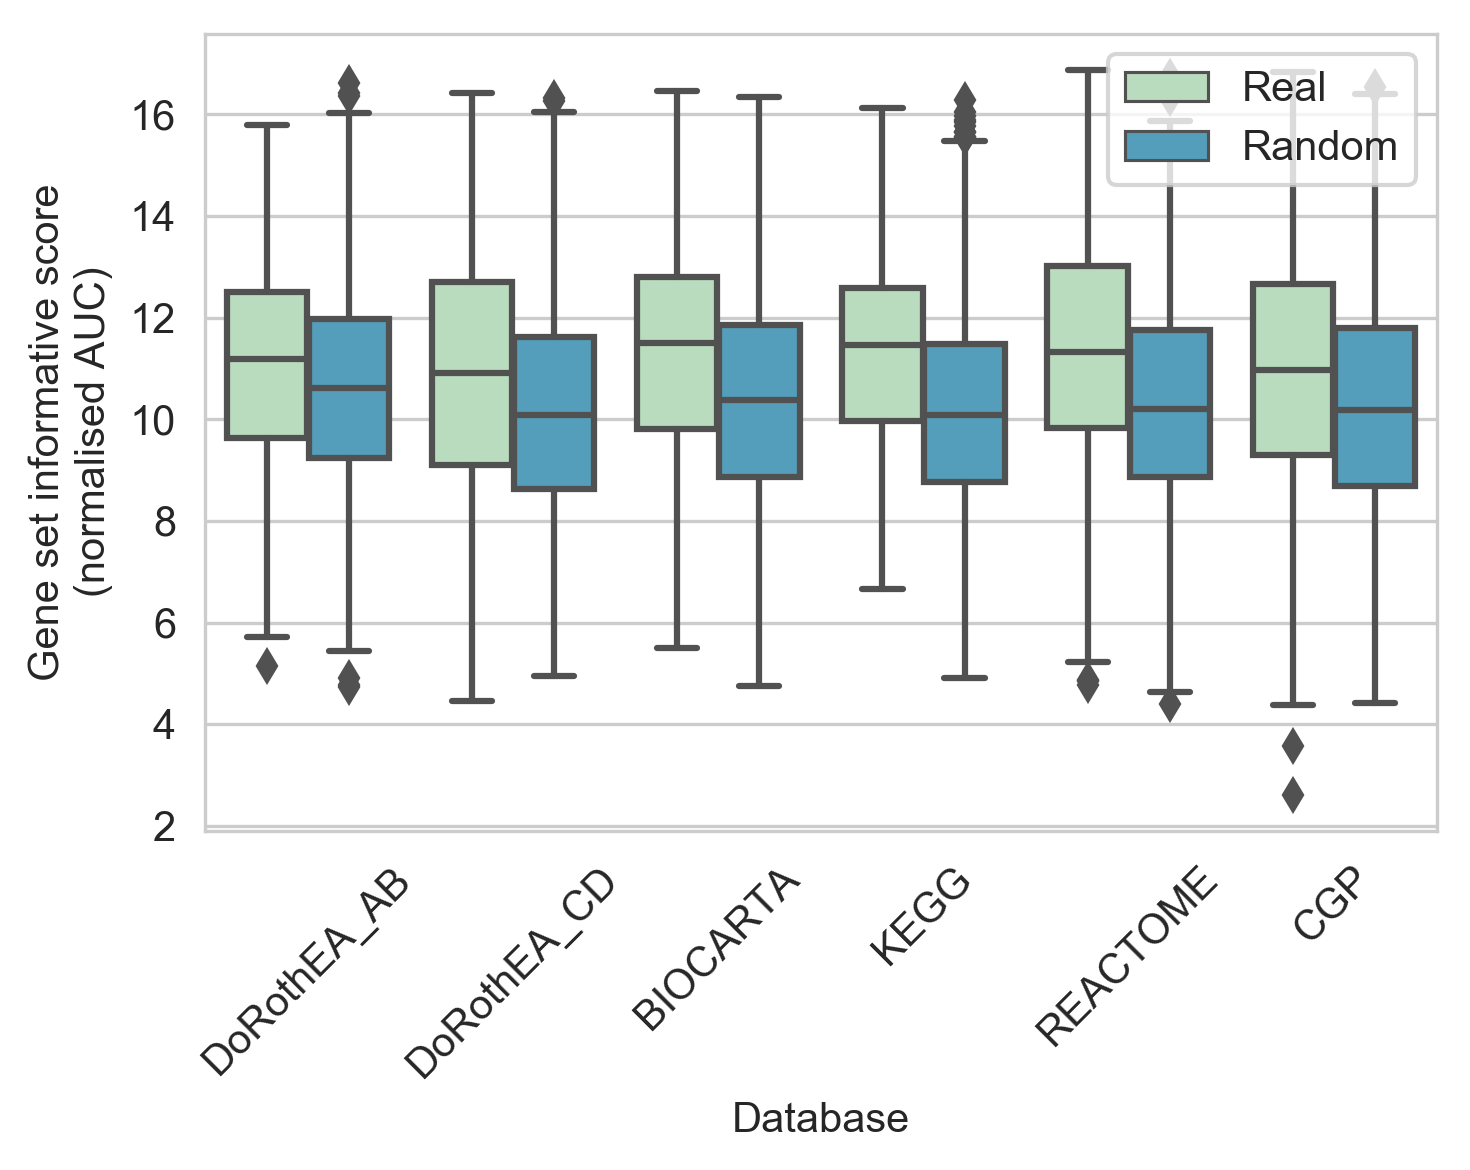

In [48]:
plot_informative_score(benchmark='tcga',add_abs=False,final_name='Fig3C')

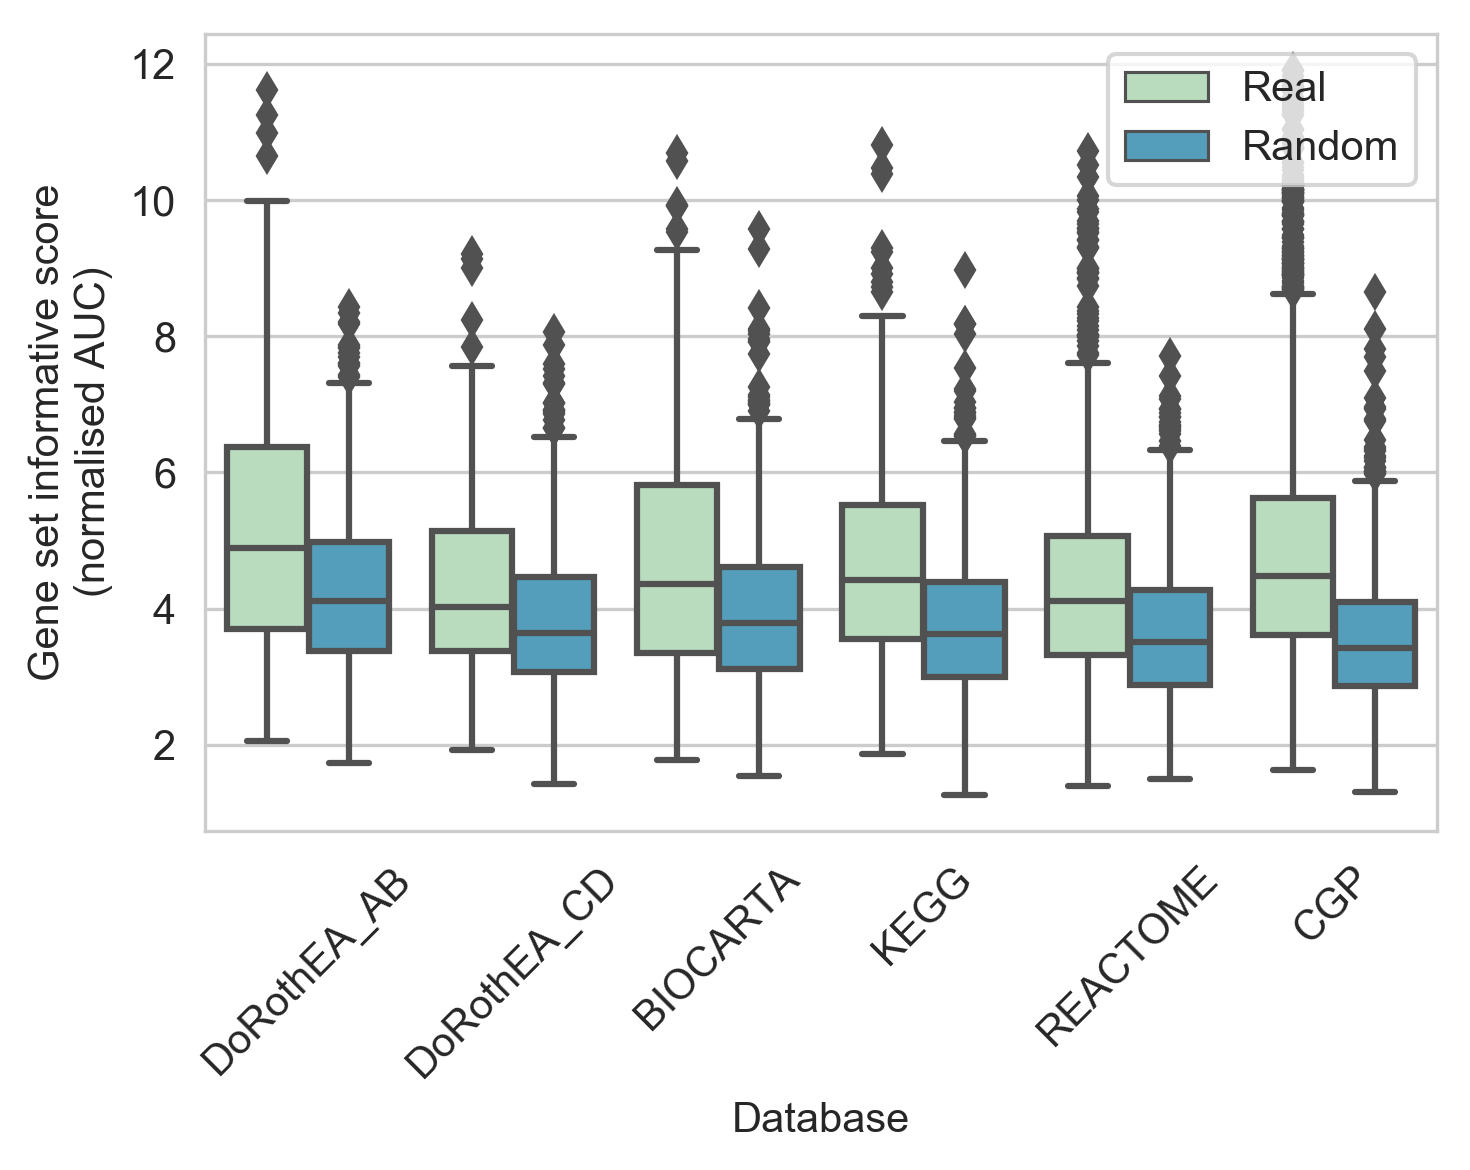

In [50]:
plot_informative_score(benchmark='progeny',add_abs=True,final_name='SFig4A')

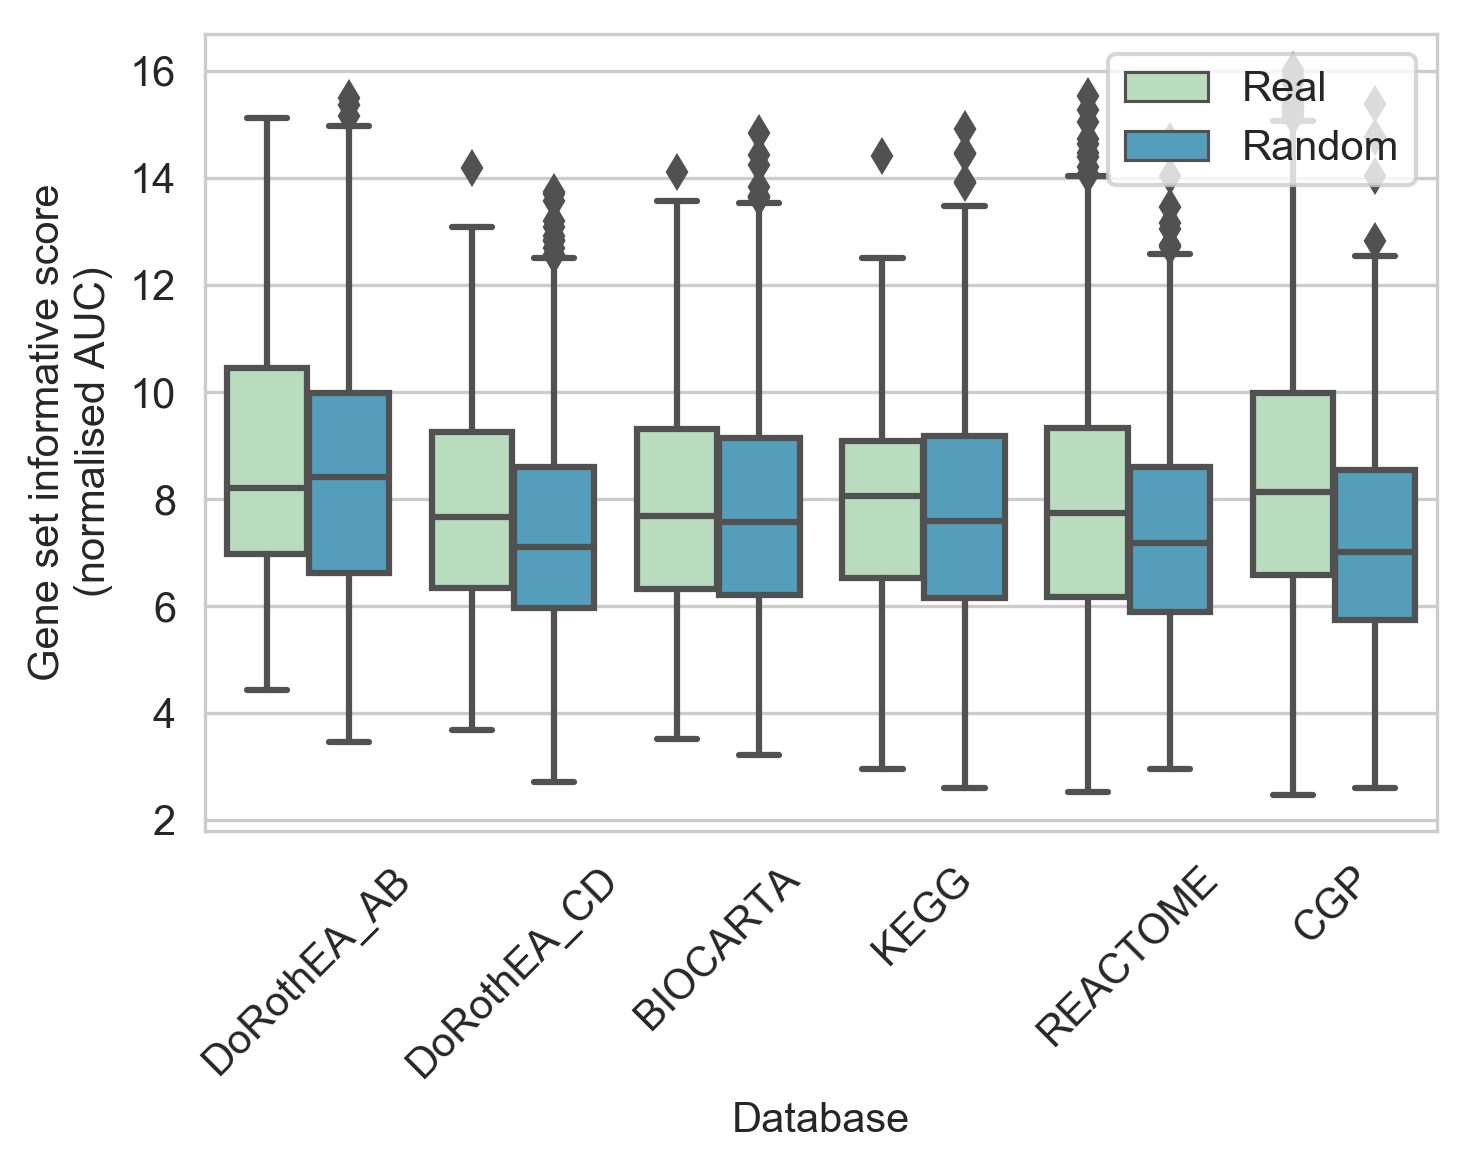

In [51]:
plot_informative_score(benchmark='tcga',add_abs=True,final_name='SFig4B')

In [3]:
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','BIOCARTA',
         'KEGG','REACTOME','CGP']
results=pd.DataFrame(columns=['Dataset','Rtype','r'])

In [4]:
for fname in datasets:
    data1=pd.read_csv('../results/benchmark/scores/progeny/single/'+fname+'_filtered_abs.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
    data2=pd.read_csv('../results/benchmark/scores/gdsc/single/'+fname+'_filtered_abs.csv',
                      sep=',',header=0,index_col=0).abs().max(1)
    sets=list(set(data1.index)&set(data2.index))
    data1=data1[sets]
    data2=data2[sets]
    temp=pd.DataFrame(index=[len(results)],columns=results.columns)
    temp.loc[len(results)]=fname,'real',pcor(data1,data2)[0]
    results=pd.concat([results,temp])
results=results.sort_values(['Dataset','Rtype'])

In [9]:
results

Dataset Rtype         r
0  BEST_dorothea_AB  real  0.797089
1  BEST_dorothea_CD  real  0.384027
2          BIOCARTA  real    0.4464
5               CGP  real   0.71781
3              KEGG  real  0.524283
4          REACTOME  real  0.539995

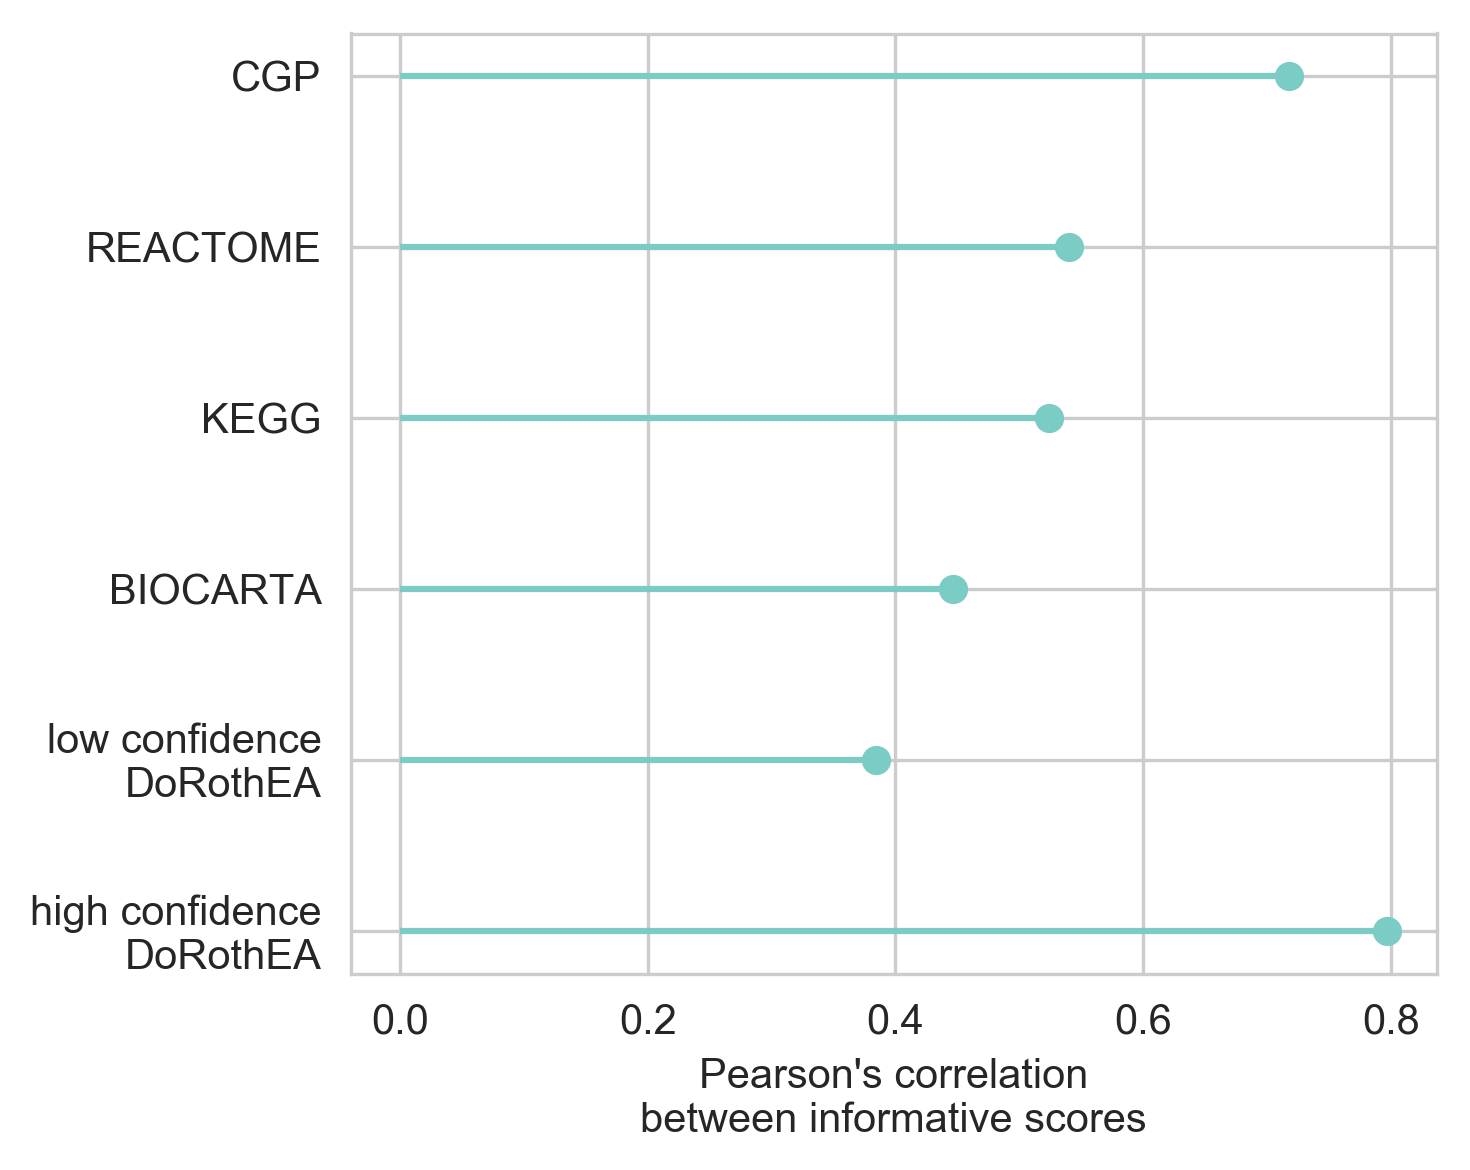

In [25]:
plt.figure(figsize=(5,4),dpi=300)
colors=sns.color_palette('GnBu',1)
plt.hlines(y=results.index, xmin=0, xmax=results['r'],colors=colors[0])
plt.plot(results['r'], results.index, "o",color=colors[0])
plt.xlabel("Pearson's correlation\nbetween informative scores")
plt.yticks(results.index,['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME'])
plt.tight_layout()
plt.savefig('../figures/raw/SFig4.pdf')

In [27]:
def plot_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type,name1,name2):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    colors=sns.color_palette('GnBu',2)
    f,axs=plt.subplots(1,2,figsize=(8,4),dpi=300)
    sns.regplot(similarity1,activity1,ax=axs[0],color=colors[0])
    axs[0].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name1,name2))
    axs[0].set_ylabel('Informative score of %s gene sets' % name1)

    sns.regplot(similarity2,activity2,ax=axs[1],color=colors[1])
    axs[1].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name2,name1))
    axs[1].set_ylabel('Informative score of %s gene sets' % name2)
    print(pcor(similarity1,activity1))
    print(pcor(similarity2,activity2))
    plt.tight_layout()

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.010514947338572106, 0.9135858866211439)
(0.33339568798299574, 1.2149958933631959e-08)


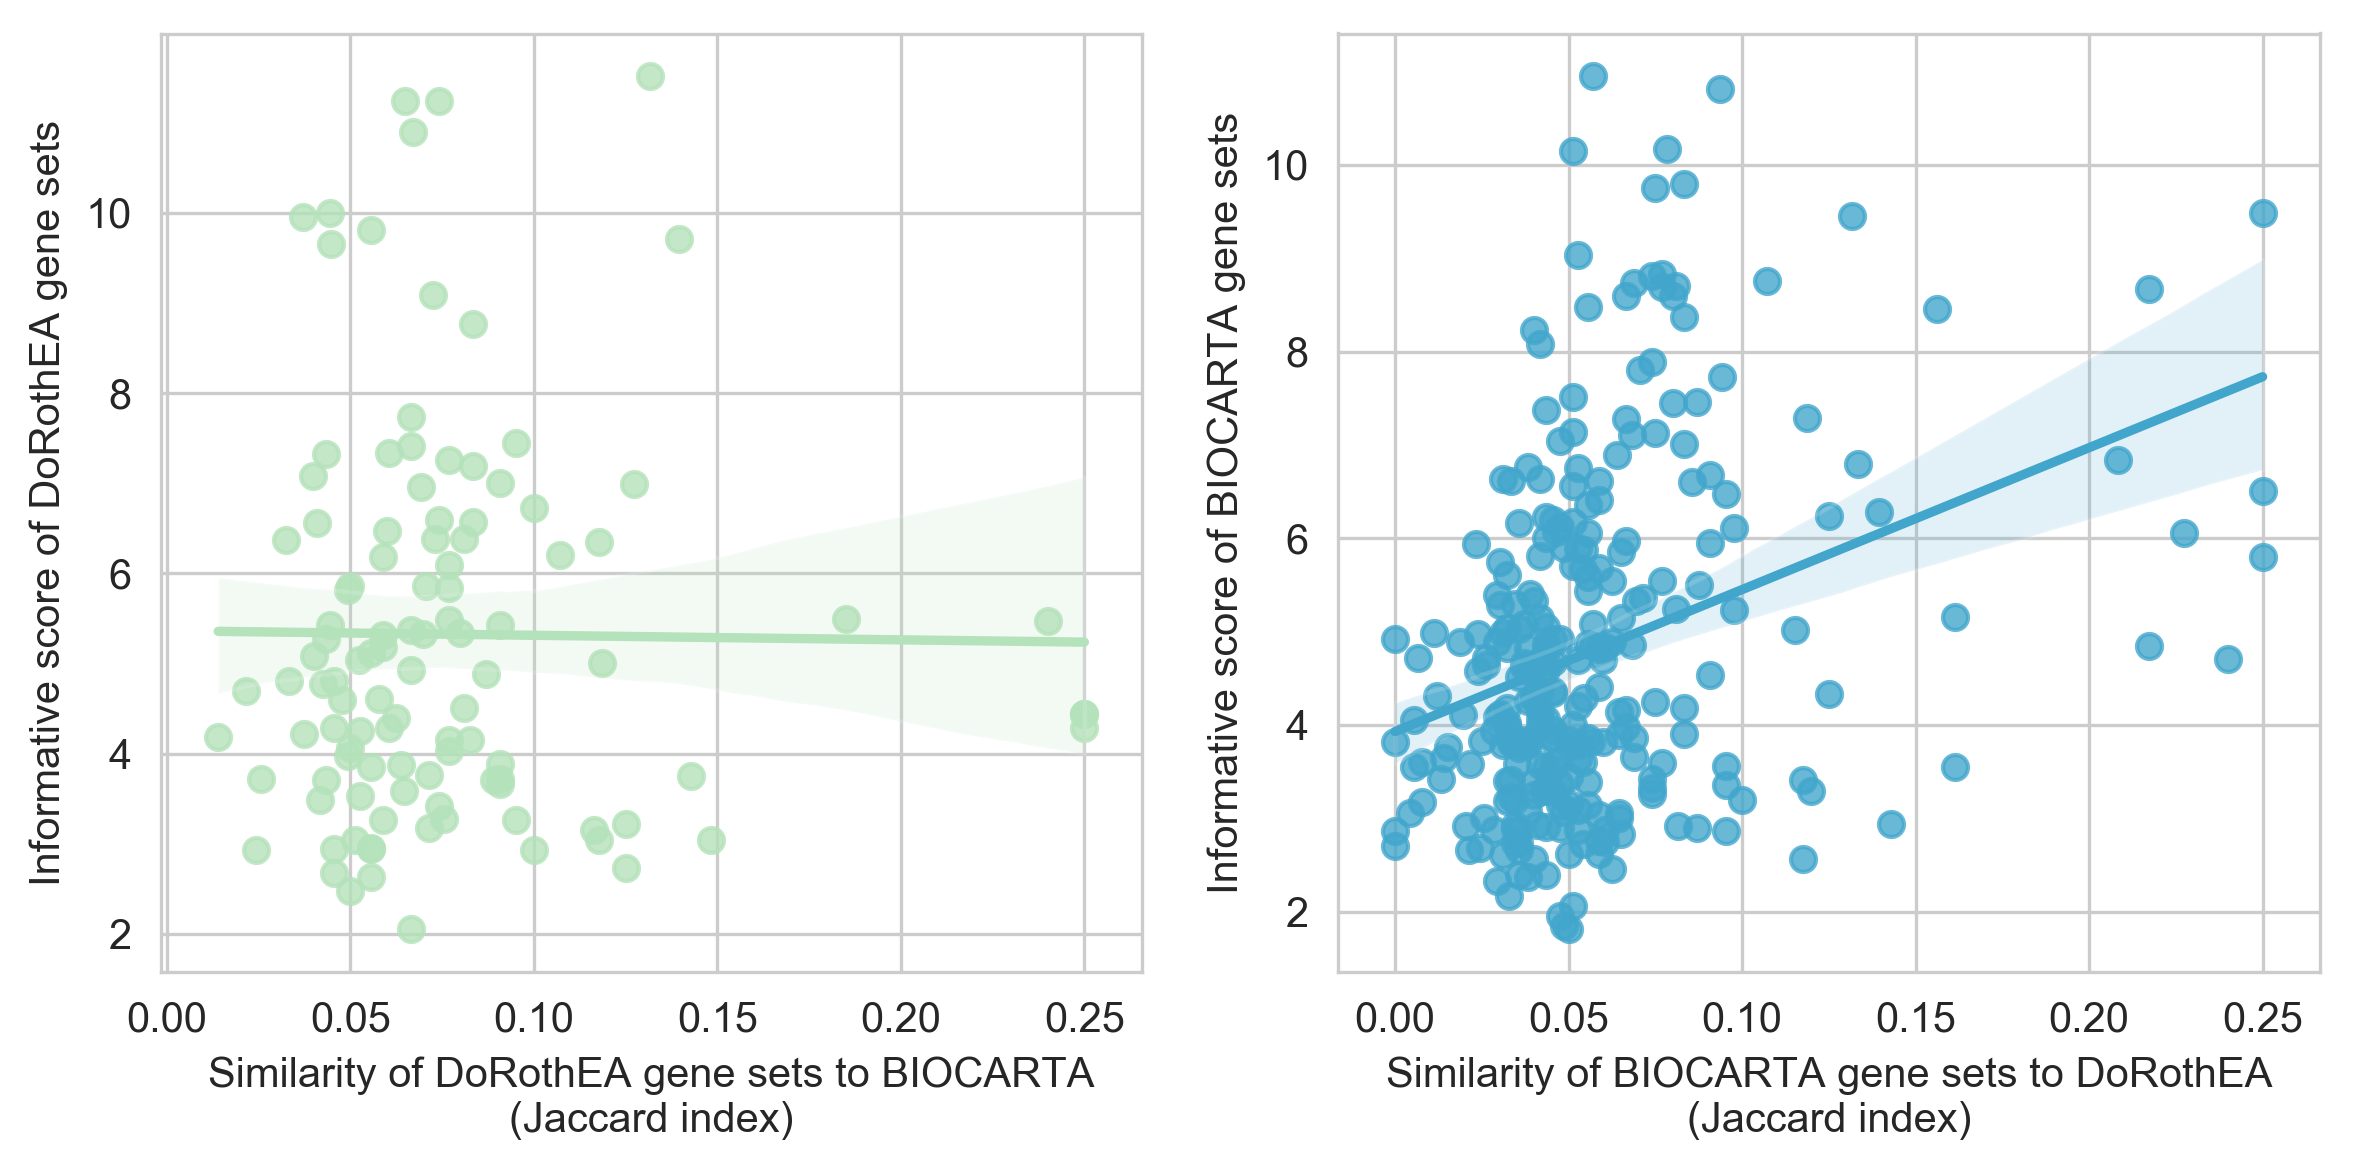

In [109]:
plot_correaltions('BEST_dorothea_AB','BIOCARTA','_abs','_filtered','progeny','jaccard',
                  'DoRothEA','BIOCARTA')
plt.savefig('../figures/raw/Fig4A.pdf')

In [29]:
def get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    return pcor(similarity1,activity1)[0],pcor(similarity2,activity2)[0]

In [120]:
def analyse_pairwise_correaltions(abs_type='_abs',rnd_fil='_filtered',bname='progeny',sim_type='jaccard'):
    results=pd.DataFrame(columns=['data1','data2','r'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1<dname2:
                r1,r2=get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type)
                temp=pd.DataFrame(index=range(2),columns=results.columns)
                temp.loc[0]=[dname1,dname2,r1]
                temp.loc[1]=[dname2,dname1,r2]
                results=pd.concat([results,temp])
    results.index=range(len(results.index)) 
    results['r']=results['r'].astype(float)
    fil=np.in1d(results['data2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['Data driven gene set']=False
    results.loc[results.index[fil],'Data driven gene set']=True
    fil=np.in1d(results['data1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['data_driven_from']=0
    results.loc[results.index[fil],'data_driven_from']=1
    results.columns=['Similarity of','Similarity to','Correaltion between similarity\nand informative score',
                    'Data driven gene set','data_driven_from']
    results=results.sort_values(['Similarity to','Similarity of'])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',6)
    sns.boxplot(y='Correaltion between similarity\nand informative score',
                x='Data driven gene set',hue='Similarity to',data=results)
    plt.legend(fontsize=7)
    plt.tight_layout()
    results.columns=['of','to','r','dd_to','dd_from']
    model = ols('r ~ dd_to',data=results).fit()
    print(sm.stats.anova_lm(model))
    print('')
    model = ols('r ~ to',data=results).fit()
    print(model.pvalues)
    print('')
    print(model.params)
    return results

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.115998  0.115998  7.704147  0.009708
Residual  28.0  0.421585  0.015057       NaN       NaN

Intercept                 0.000053
to[T.BEST_dorothea_CD]    0.101053
to[T.BIOCARTA]            0.153158
to[T.CGP]                 0.864730
to[T.KEGG]                0.029217
to[T.REACTOME]            0.005332
dtype: float64

Intercept                 0.259826
to[T.BEST_dorothea_CD]   -0.127742
to[T.BIOCARTA]           -0.110506
to[T.CGP]                -0.012899
to[T.KEGG]               -0.173729
to[T.REACTOME]           -0.229498
dtype: float64


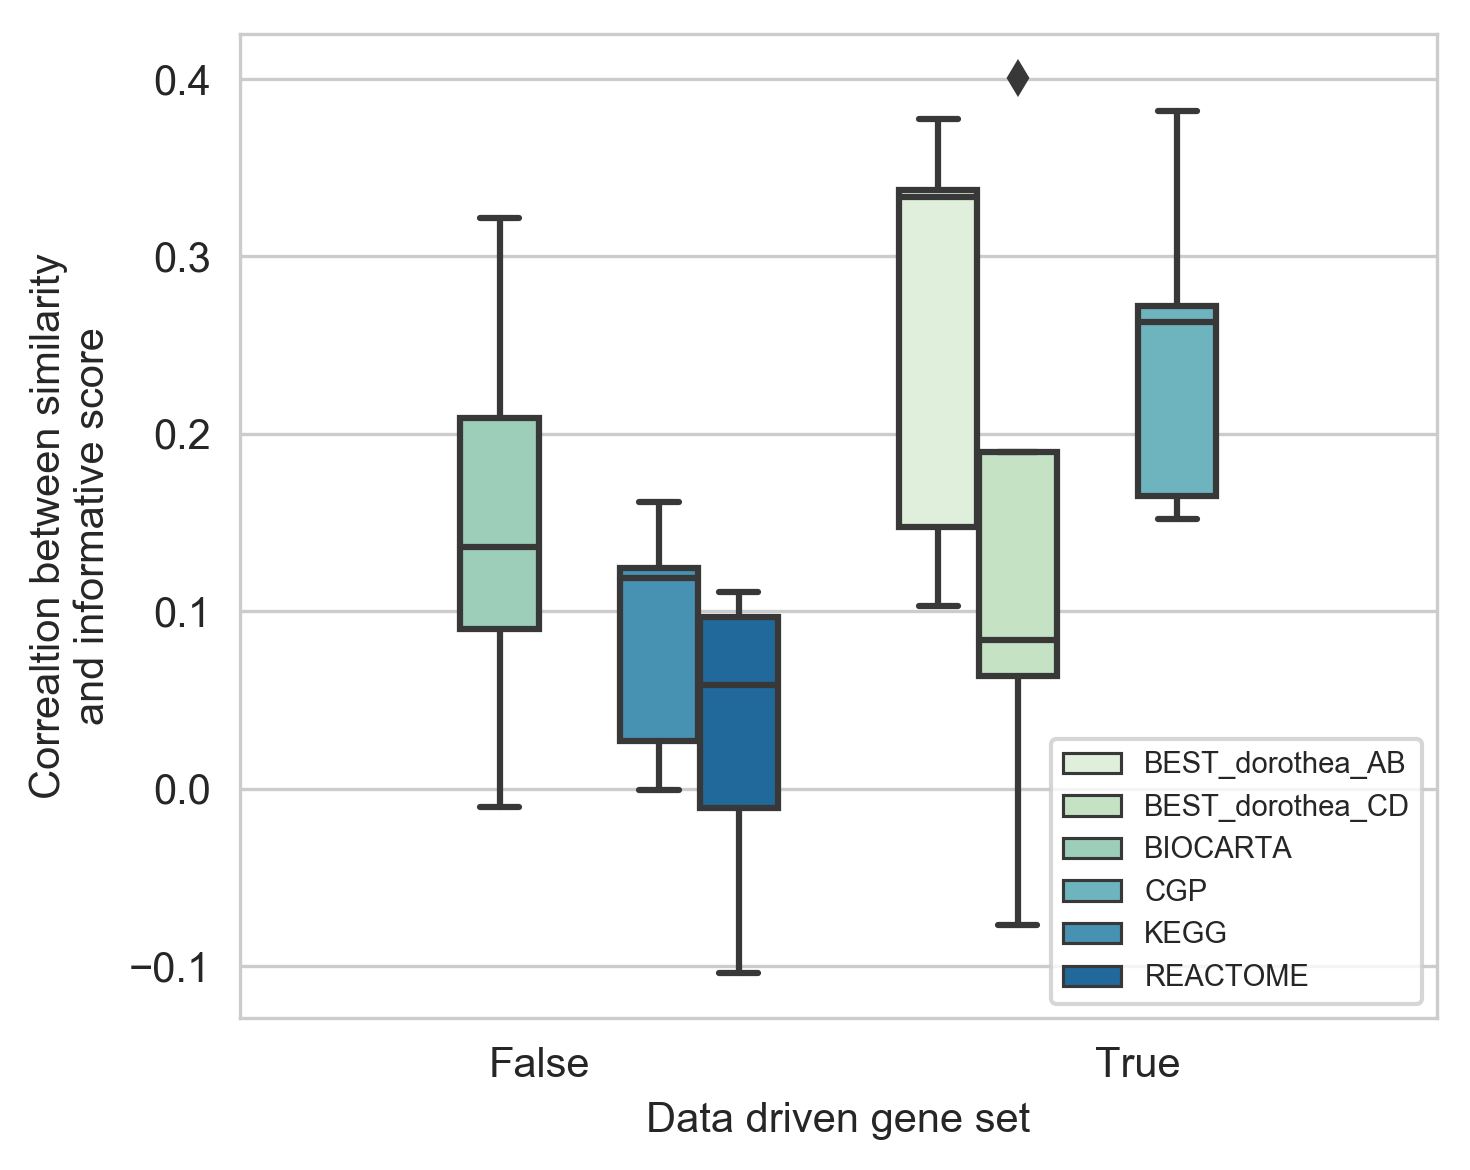

In [121]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='jaccard')
plt.savefig('../figures/raw/Fig4B.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.044270  0.044270  2.372378  0.134725
Residual  28.0  0.522495  0.018661       NaN       NaN

Intercept                 0.002384
to[T.BEST_dorothea_CD]    0.488029
to[T.BIOCARTA]            0.038510
to[T.CGP]                 0.018720
to[T.KEGG]                0.163918
to[T.REACTOME]            0.022101
dtype: float64

Intercept                 0.194410
to[T.BEST_dorothea_CD]   -0.057027
to[T.BIOCARTA]           -0.177296
to[T.CGP]                -0.204197
to[T.KEGG]               -0.116272
to[T.REACTOME]           -0.198142
dtype: float64


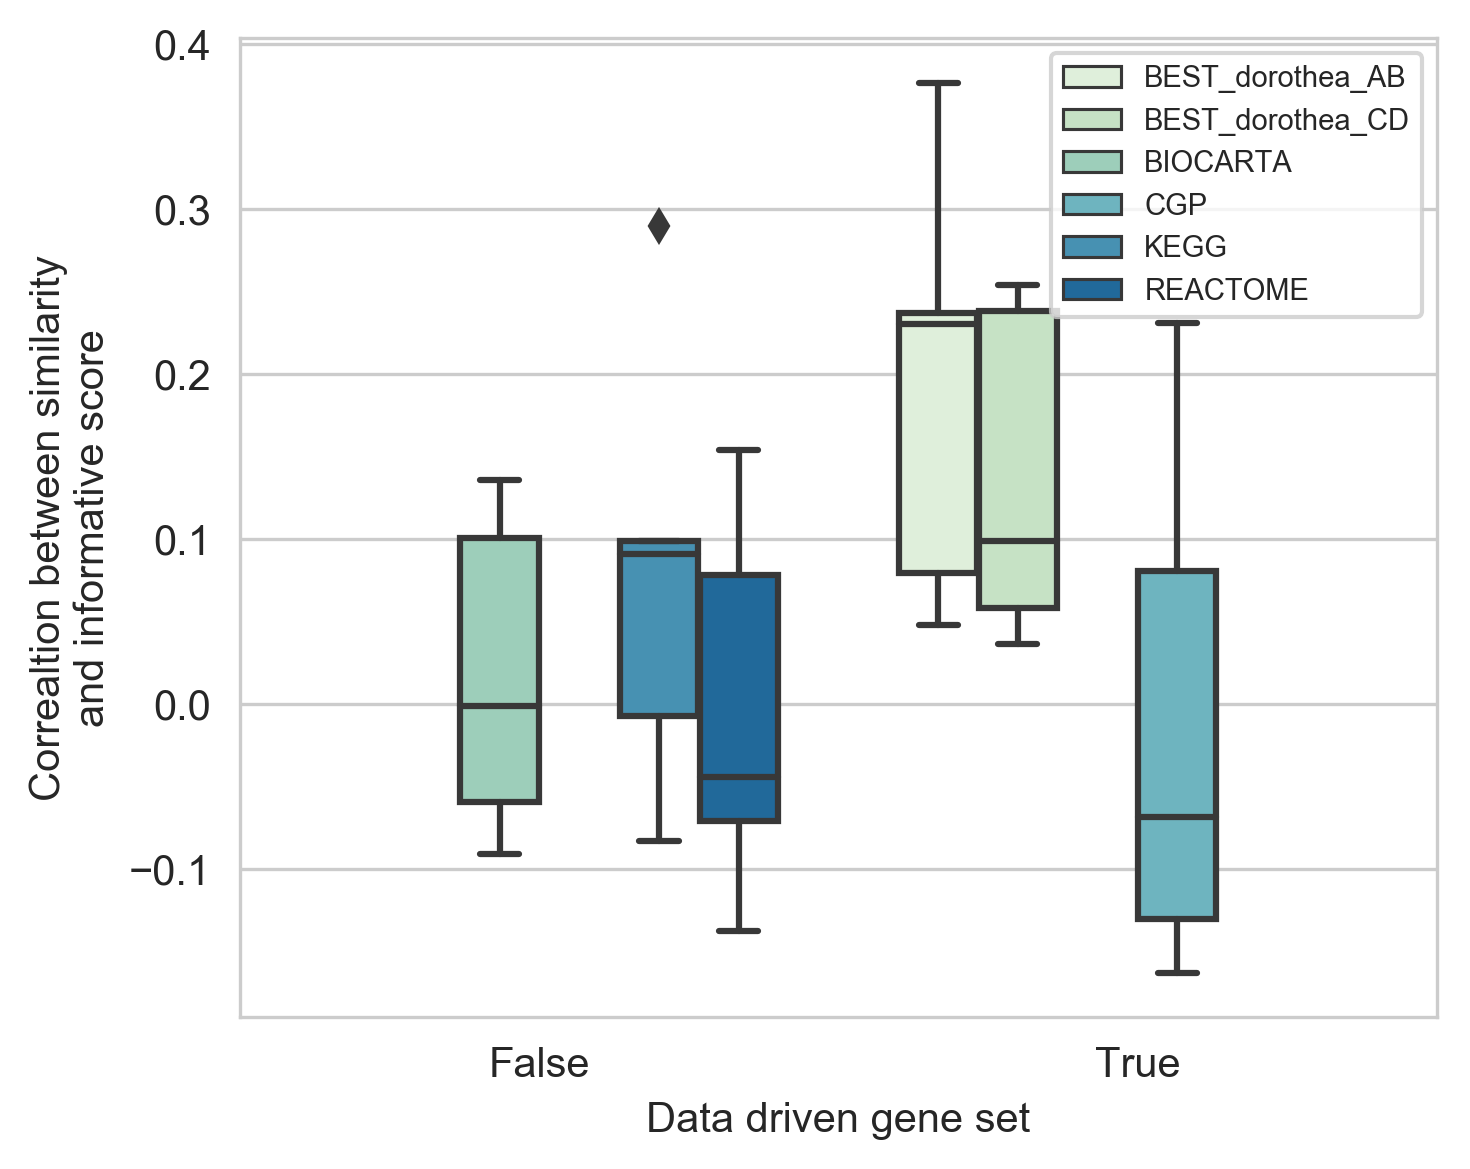

In [122]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='jaccard')
plt.savefig('../figures/raw/Fig4C.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.089082  0.089082  6.388098  0.017415
Residual  28.0  0.390461  0.013945       NaN       NaN

Intercept                 6.790083e-07
to[T.BEST_dorothea_CD]    1.458904e-01
to[T.BIOCARTA]            5.215336e-01
to[T.CGP]                 5.759356e-01
to[T.KEGG]                3.376099e-03
to[T.REACTOME]            5.697377e-03
dtype: float64

Intercept                 0.316471
to[T.BEST_dorothea_CD]   -0.100914
to[T.BIOCARTA]           -0.043678
to[T.CGP]                -0.038074
to[T.KEGG]               -0.218425
to[T.REACTOME]           -0.203839
dtype: float64


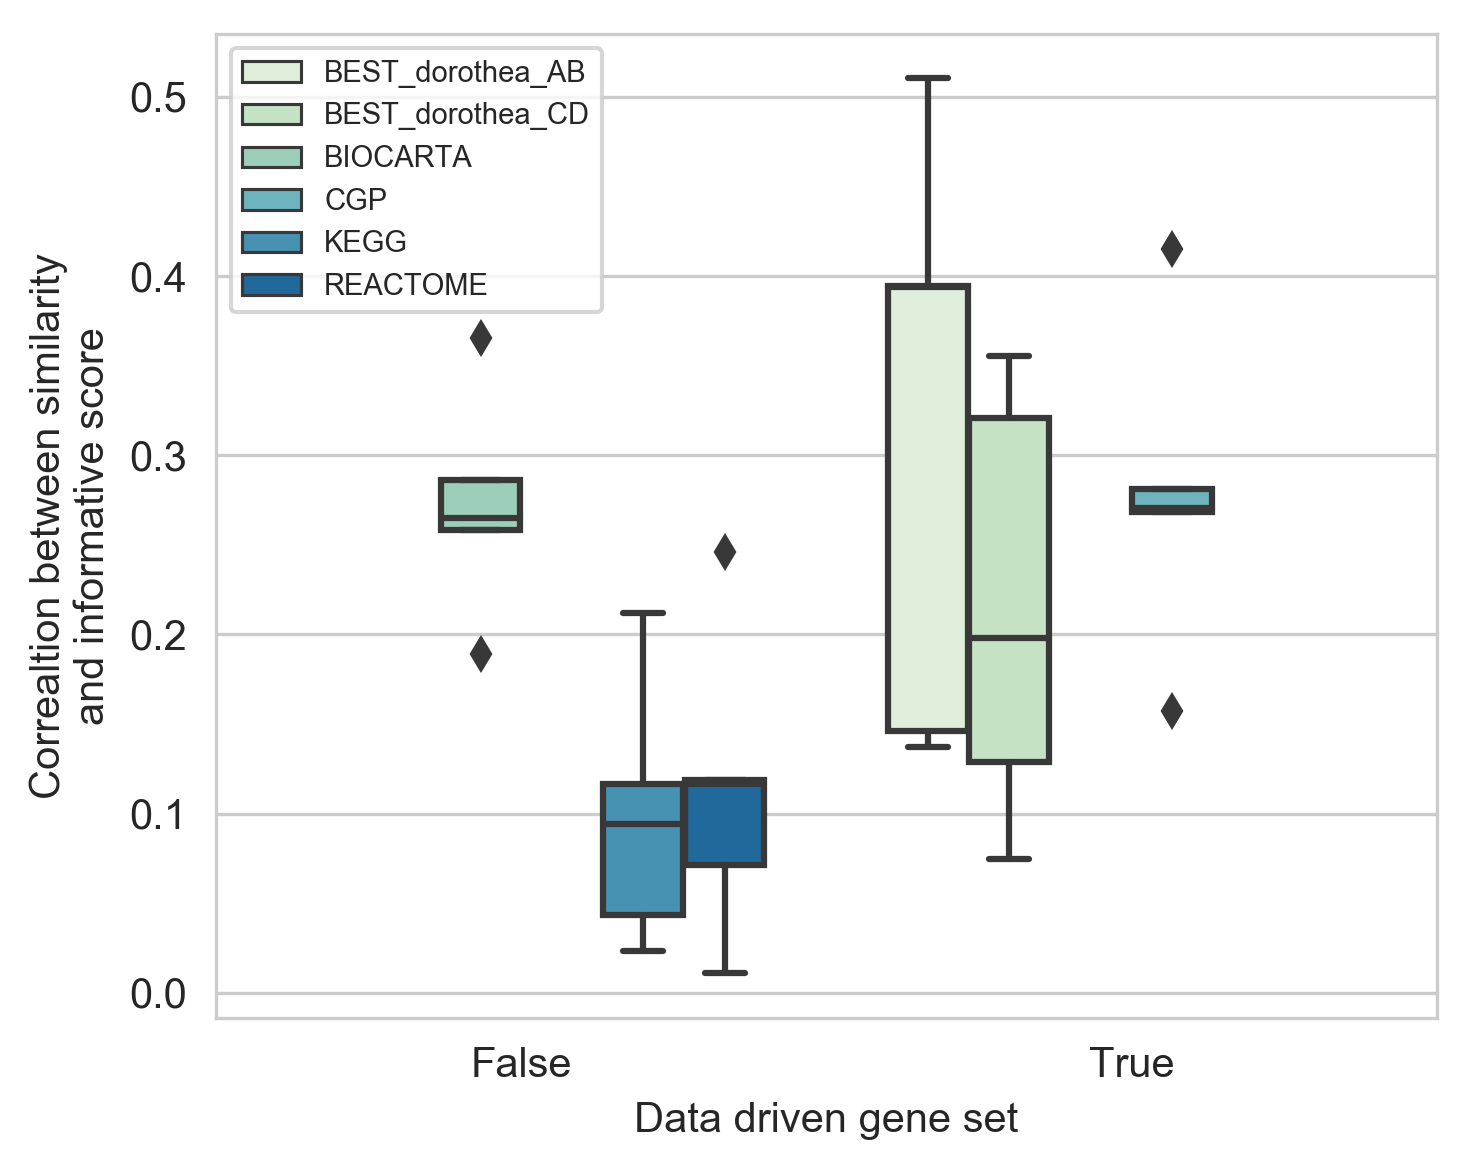

In [125]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6A.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.050720  0.050720  3.824376  0.060558
Residual  28.0  0.371347  0.013262       NaN       NaN

Intercept                 0.011480
to[T.BEST_dorothea_CD]    0.410558
to[T.BIOCARTA]            0.399731
to[T.CGP]                 0.426423
to[T.KEGG]                0.469174
to[T.REACTOME]            0.079341
dtype: float64

Intercept                 0.140582
to[T.BEST_dorothea_CD]   -0.060831
to[T.BIOCARTA]           -0.062271
to[T.CGP]                 0.058764
to[T.KEGG]               -0.053419
to[T.REACTOME]           -0.133084
dtype: float64


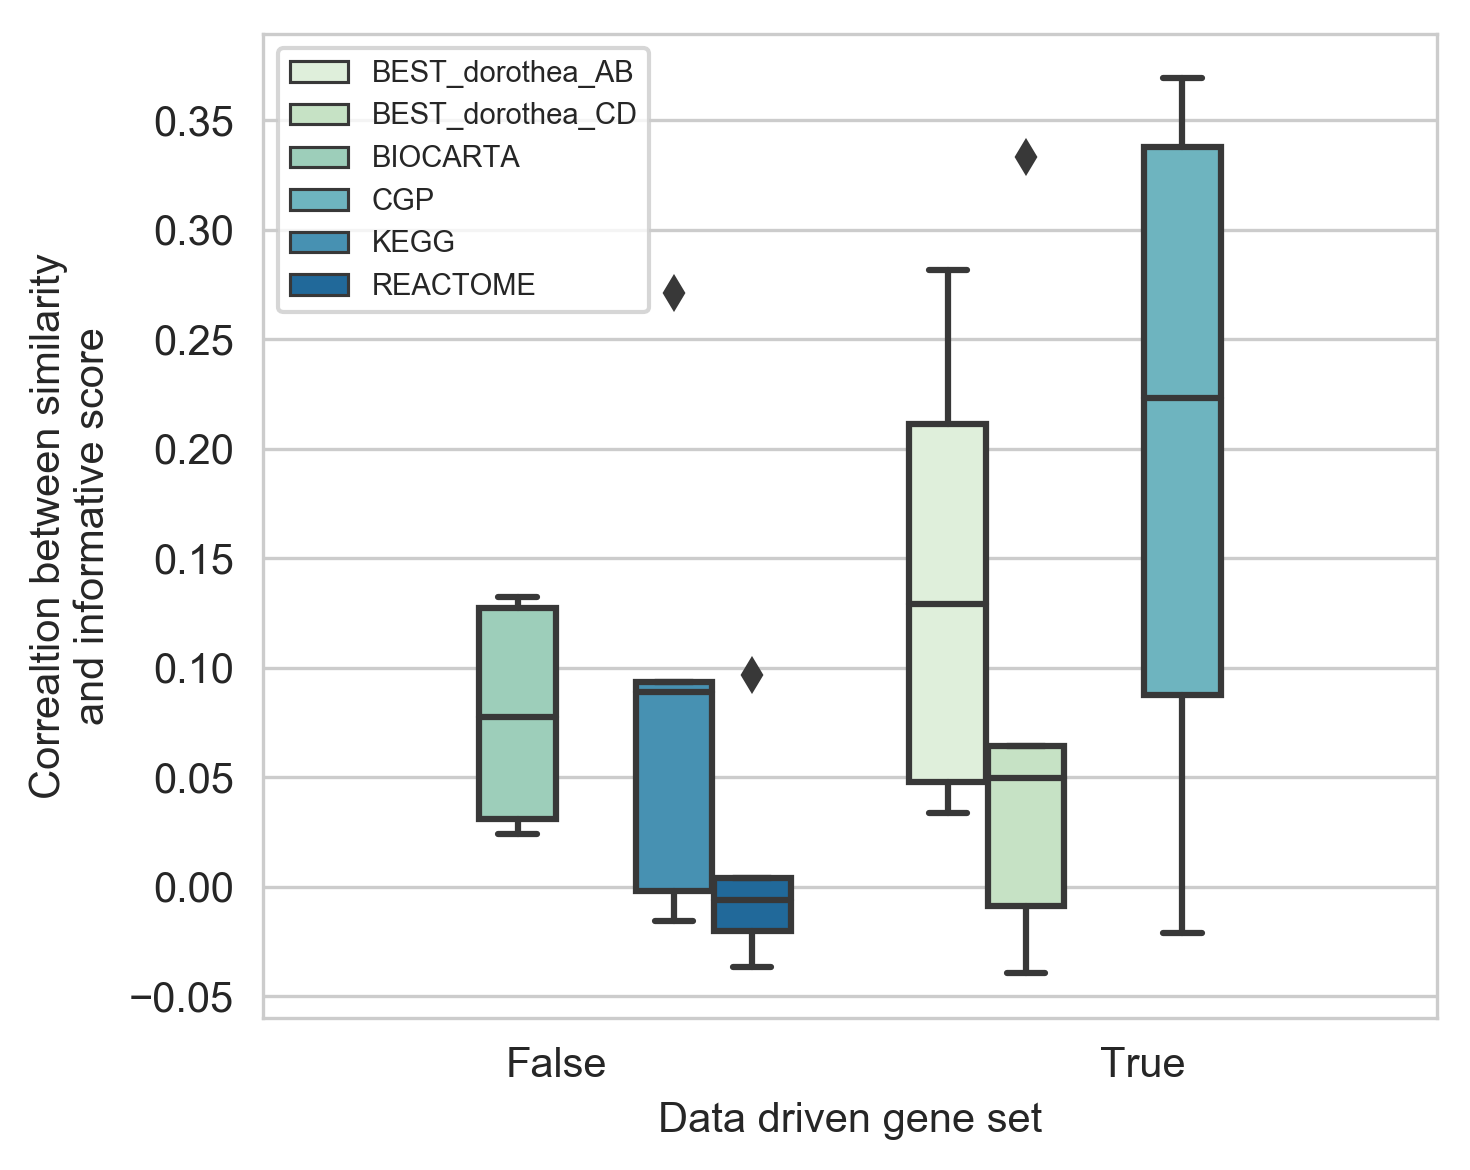

In [126]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6B.pdf')

            df    sum_sq   mean_sq         F   PR(>F)
dd_to      1.0  0.062042  0.062042  6.384884  0.01744
Residual  28.0  0.272075  0.009717       NaN      NaN

Intercept                 0.000011
to[T.BEST_dorothea_CD]    0.201111
to[T.BIOCARTA]            0.775569
to[T.CGP]                 0.488627
to[T.KEGG]                0.009825
to[T.REACTOME]            0.021707
dtype: float64

Intercept                 0.216350
to[T.BEST_dorothea_CD]   -0.072649
to[T.BIOCARTA]           -0.015936
to[T.CGP]                 0.038871
to[T.KEGG]               -0.155002
to[T.REACTOME]           -0.135696
dtype: float64


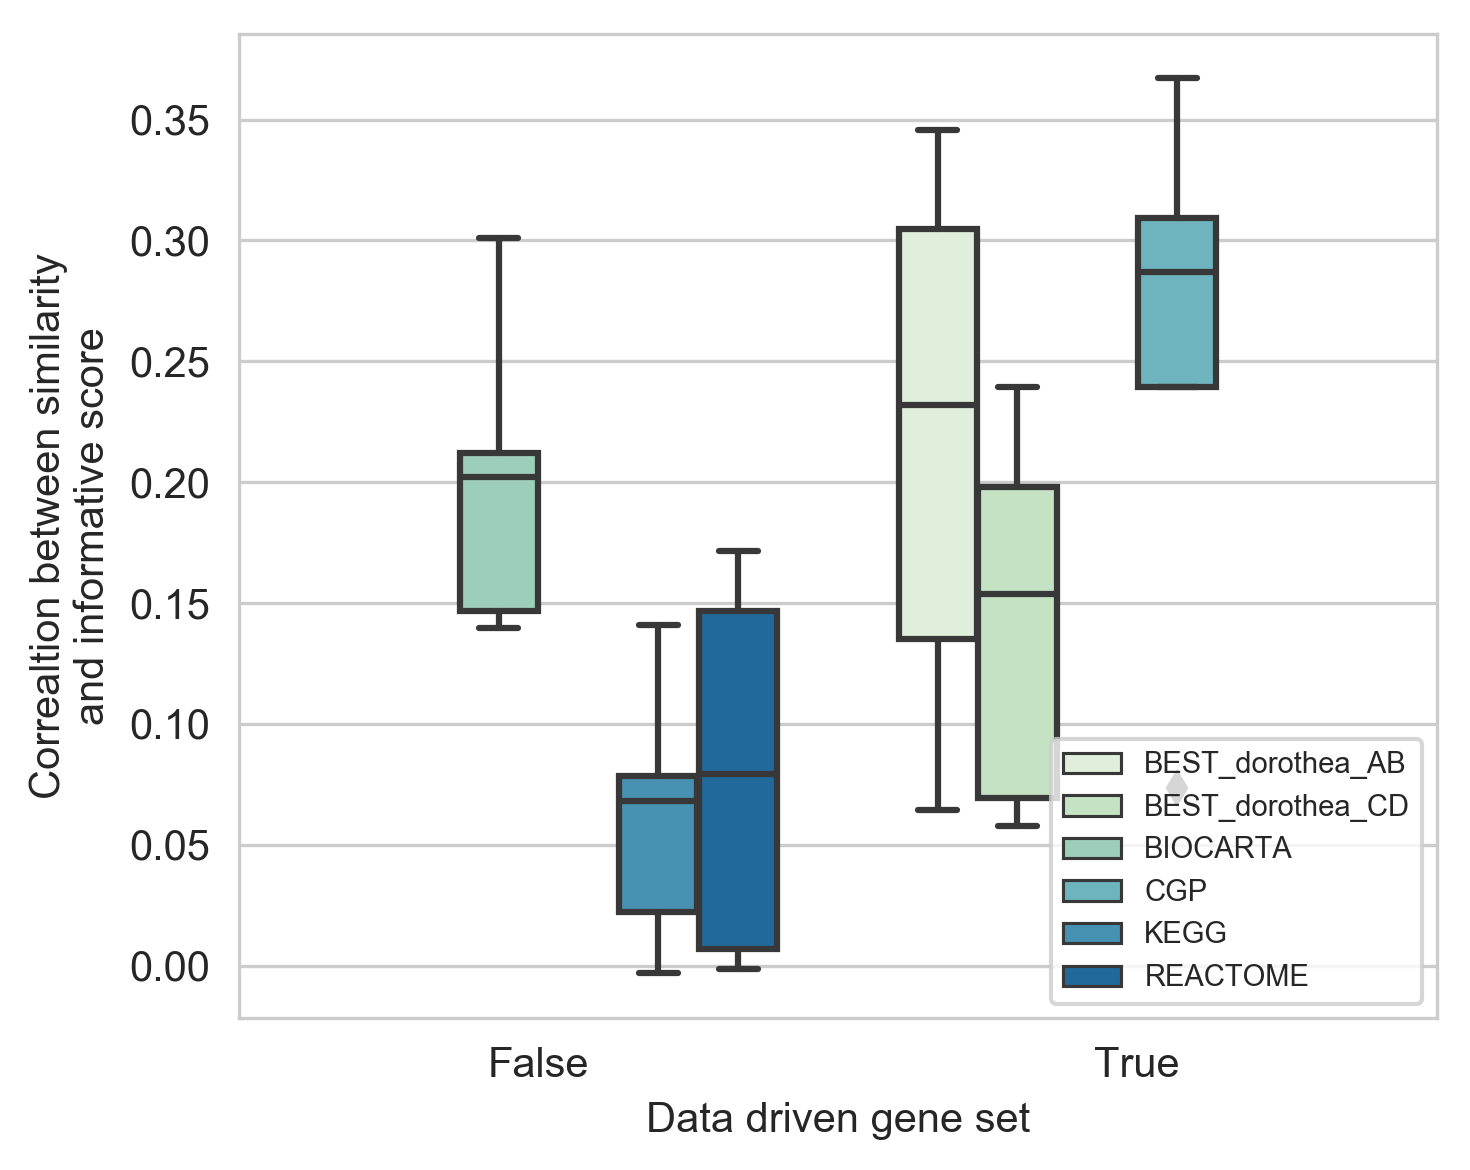

In [127]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6C.pdf')

            df    sum_sq   mean_sq         F   PR(>F)
dd_to      1.0  0.040522  0.040522  2.708913  0.11097
Residual  28.0  0.418847  0.014959       NaN      NaN

Intercept                 0.000616
to[T.BEST_dorothea_CD]    0.460654
to[T.BIOCARTA]            0.075047
to[T.CGP]                 0.039132
to[T.KEGG]                0.065345
to[T.REACTOME]            0.052692
dtype: float64

Intercept                 0.211831
to[T.BEST_dorothea_CD]   -0.057043
to[T.BIOCARTA]           -0.141573
to[T.CGP]                -0.165998
to[T.KEGG]               -0.146922
to[T.REACTOME]           -0.155060
dtype: float64


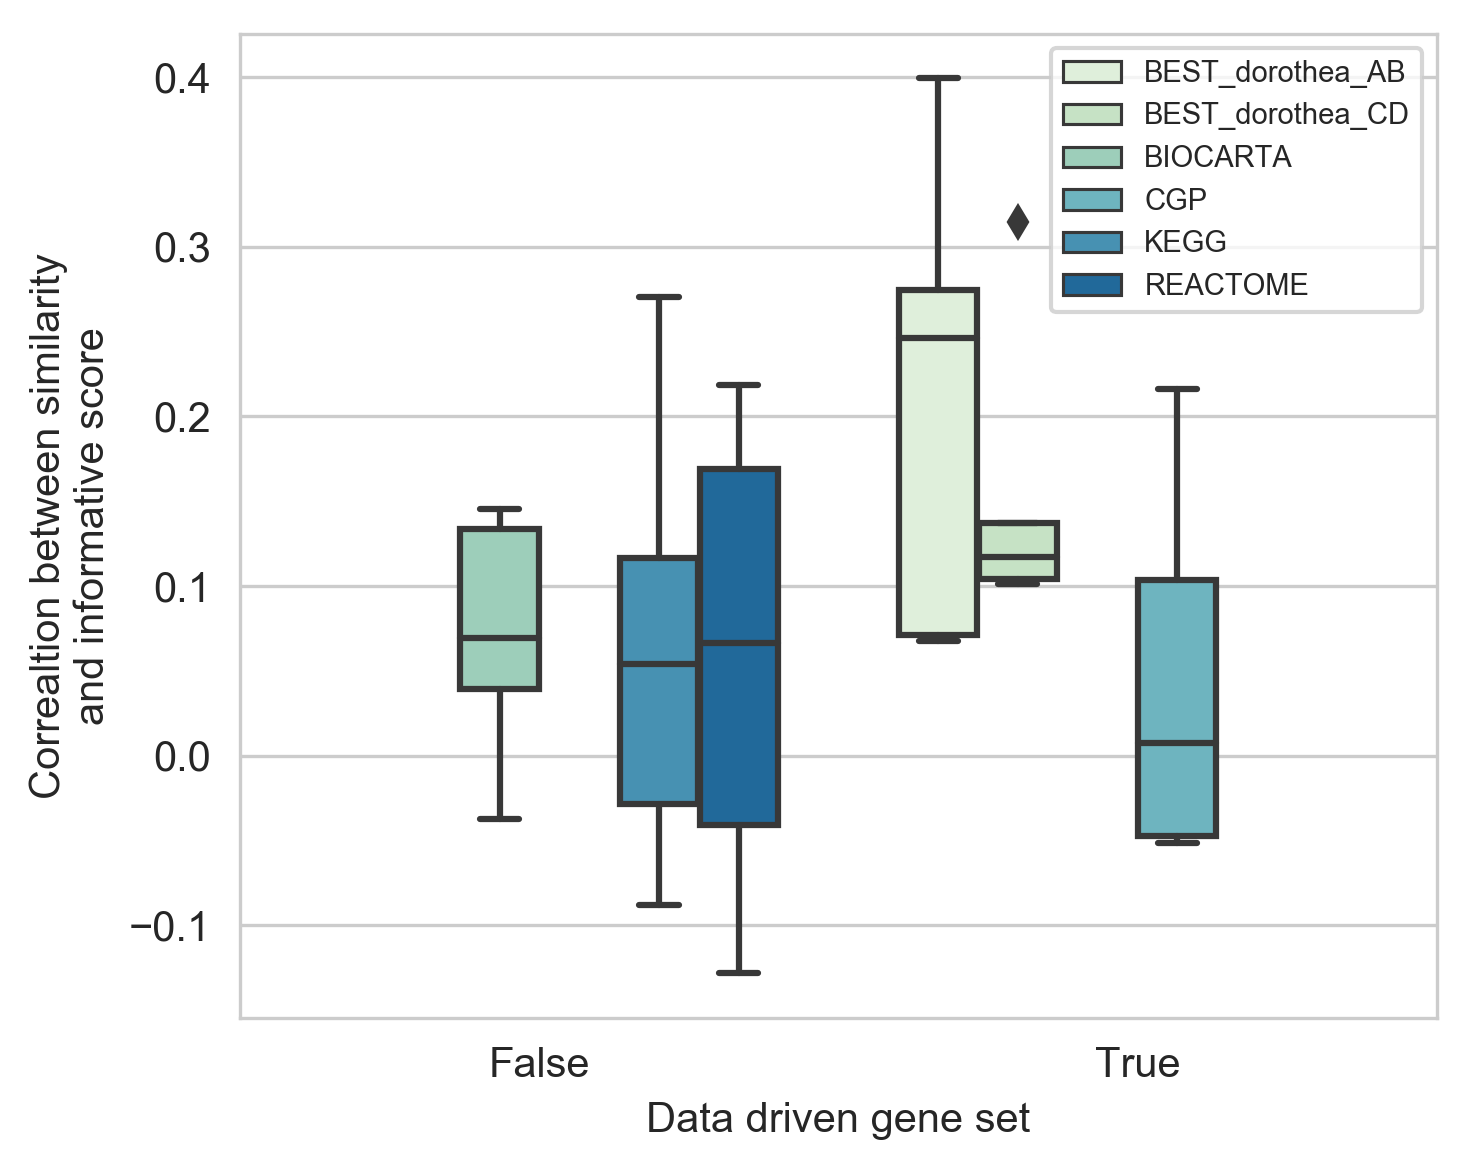

In [130]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6D.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.051119  0.051119  5.588222  0.025254
Residual  28.0  0.256132  0.009148       NaN       NaN

Intercept                 0.011084
to[T.BEST_dorothea_CD]    0.408276
to[T.BIOCARTA]            0.068727
to[T.CGP]                 0.195974
to[T.KEGG]                0.126438
to[T.REACTOME]            0.012046
dtype: float64

Intercept                 0.119508
to[T.BEST_dorothea_CD]   -0.051681
to[T.BIOCARTA]           -0.117019
to[T.CGP]                -0.081674
to[T.KEGG]               -0.097220
to[T.REACTOME]           -0.166791
dtype: float64


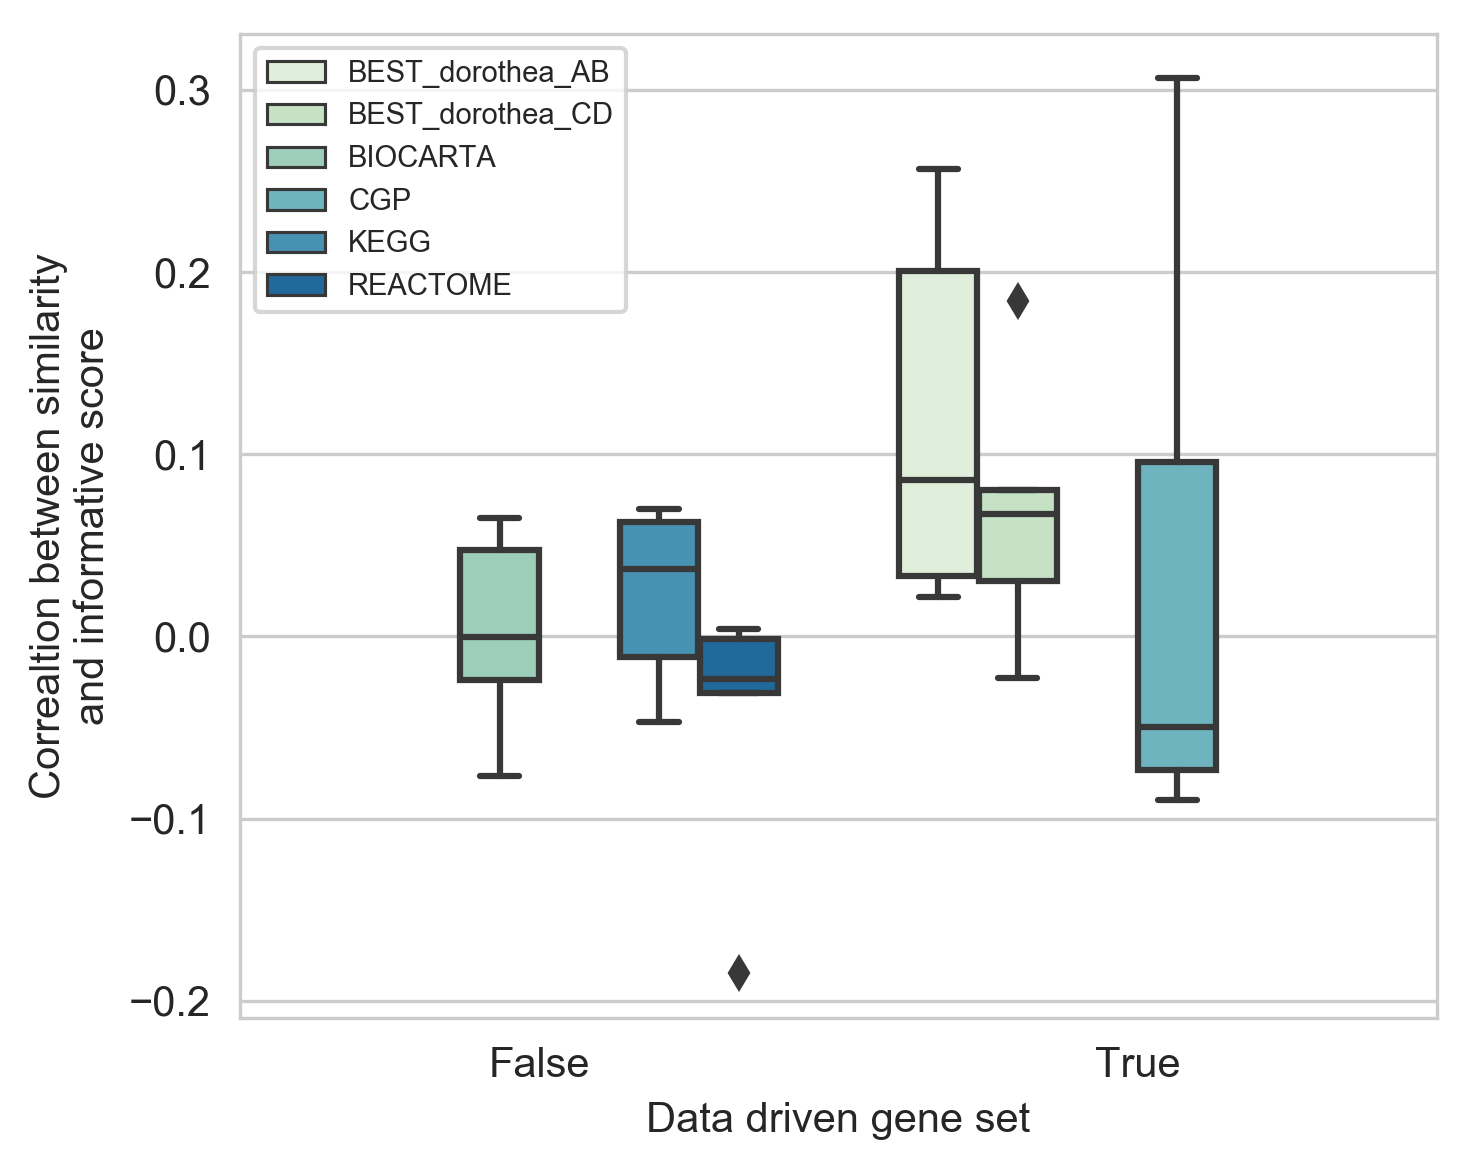

In [129]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6E.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
dd_to      1.0  0.023214  0.023214  2.939622  0.097481
Residual  28.0  0.221112  0.007897       NaN       NaN

Intercept                 0.002756
to[T.BEST_dorothea_CD]    0.156766
to[T.BIOCARTA]            0.253358
to[T.CGP]                 0.123217
to[T.KEGG]                0.065872
to[T.REACTOME]            0.005153
dtype: float64

Intercept                 0.126361
to[T.BEST_dorothea_CD]   -0.078297
to[T.BIOCARTA]           -0.062685
to[T.CGP]                -0.085570
to[T.KEGG]               -0.103225
to[T.REACTOME]           -0.164860
dtype: float64


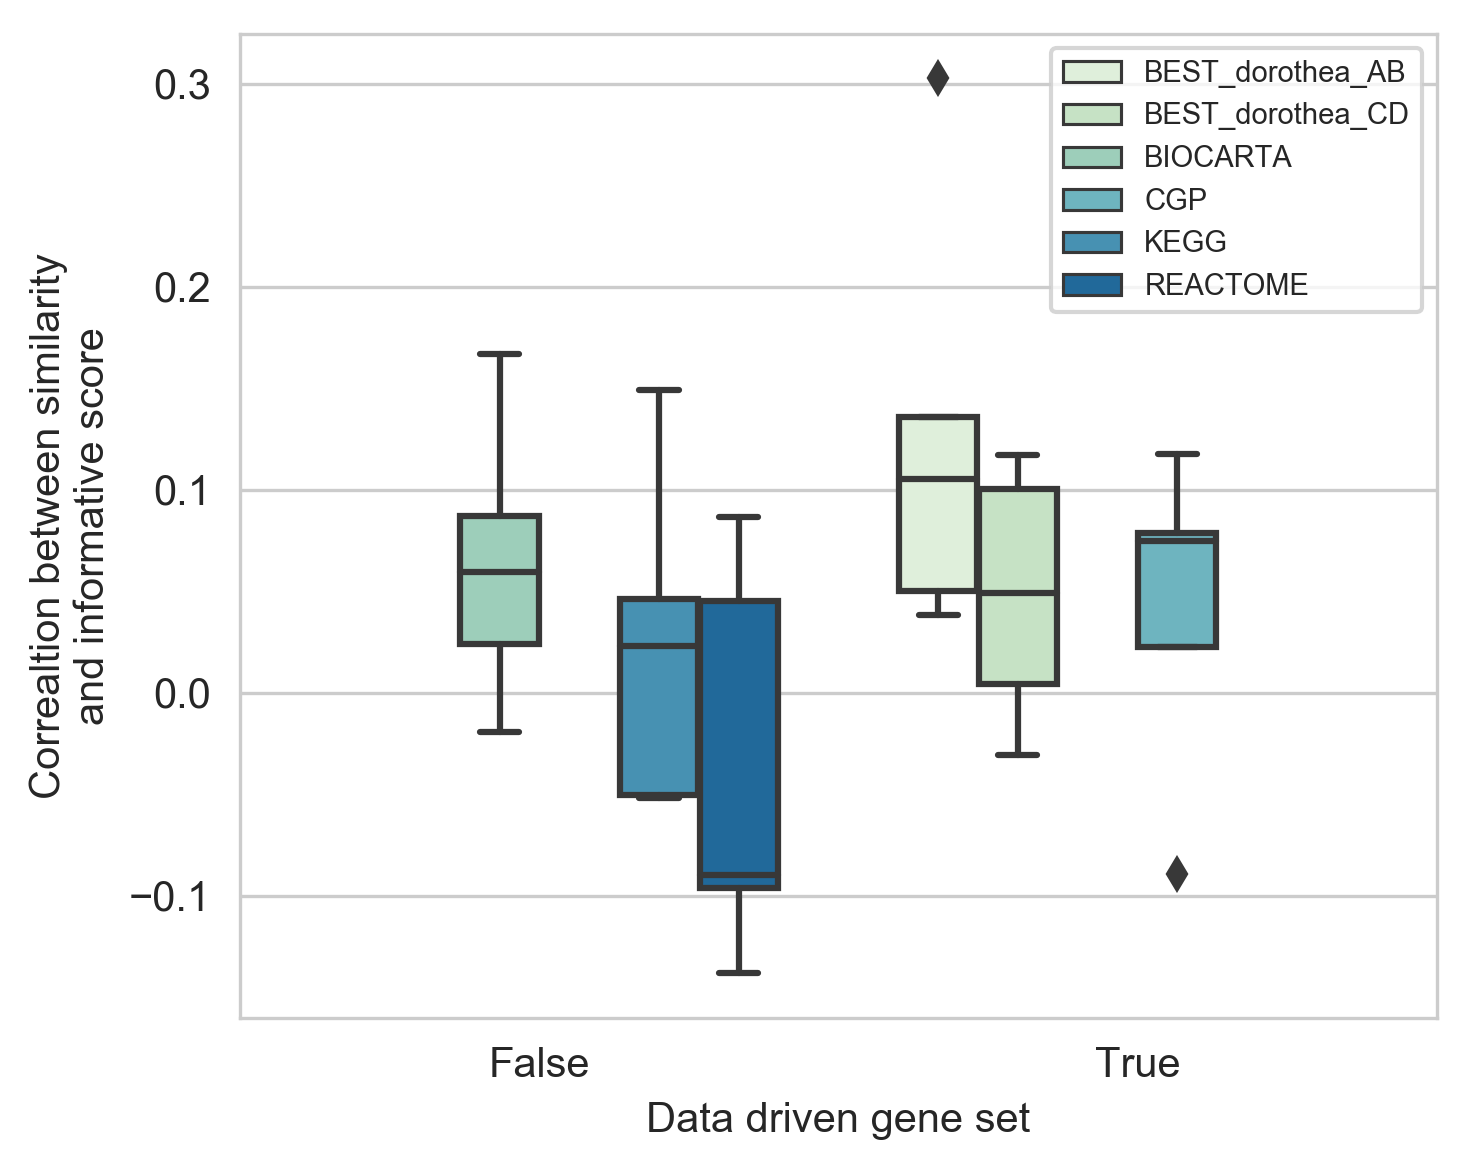

In [131]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6F.pdf')

In [54]:
def plot_overlap(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    
    results=pd.DataFrame(index=range(len(score_overlap)))
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname1,sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname2,sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname1,dname2),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_overlap_%s_filtered.csv' % (dname2,dname1),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname1,dname2),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s_filtered_minus_%s_filtered.csv' % (dname2,dname1),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    print(mwu(results[dname1+' - '+dname2],results[dname2+' - '+dname1]))
    print(mwu(results_genesets[dname1+' - '+dname2],results_genesets[dname2+' - '+dname1]))
    results=pd.melt(results)
    results.columns=['Gene set','Informative score']
    results_genesets=pd.melt(results_genesets)
    results_genesets.columns=['Gene set','Size']
    
    
    return results,results_genesets

In [82]:
dname1='BEST_dorothea_AB'
dname2='BIOCARTA'
results,results_genesets=plot_overlap(dname1=dname1,dname2=dname2,bname='progeny',atype='_abs')

MannwhitneyuResult(statistic=13409.0, pvalue=2.341303271090645e-40)
MannwhitneyuResult(statistic=1590.5, pvalue=2.943878477707892e-85)


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


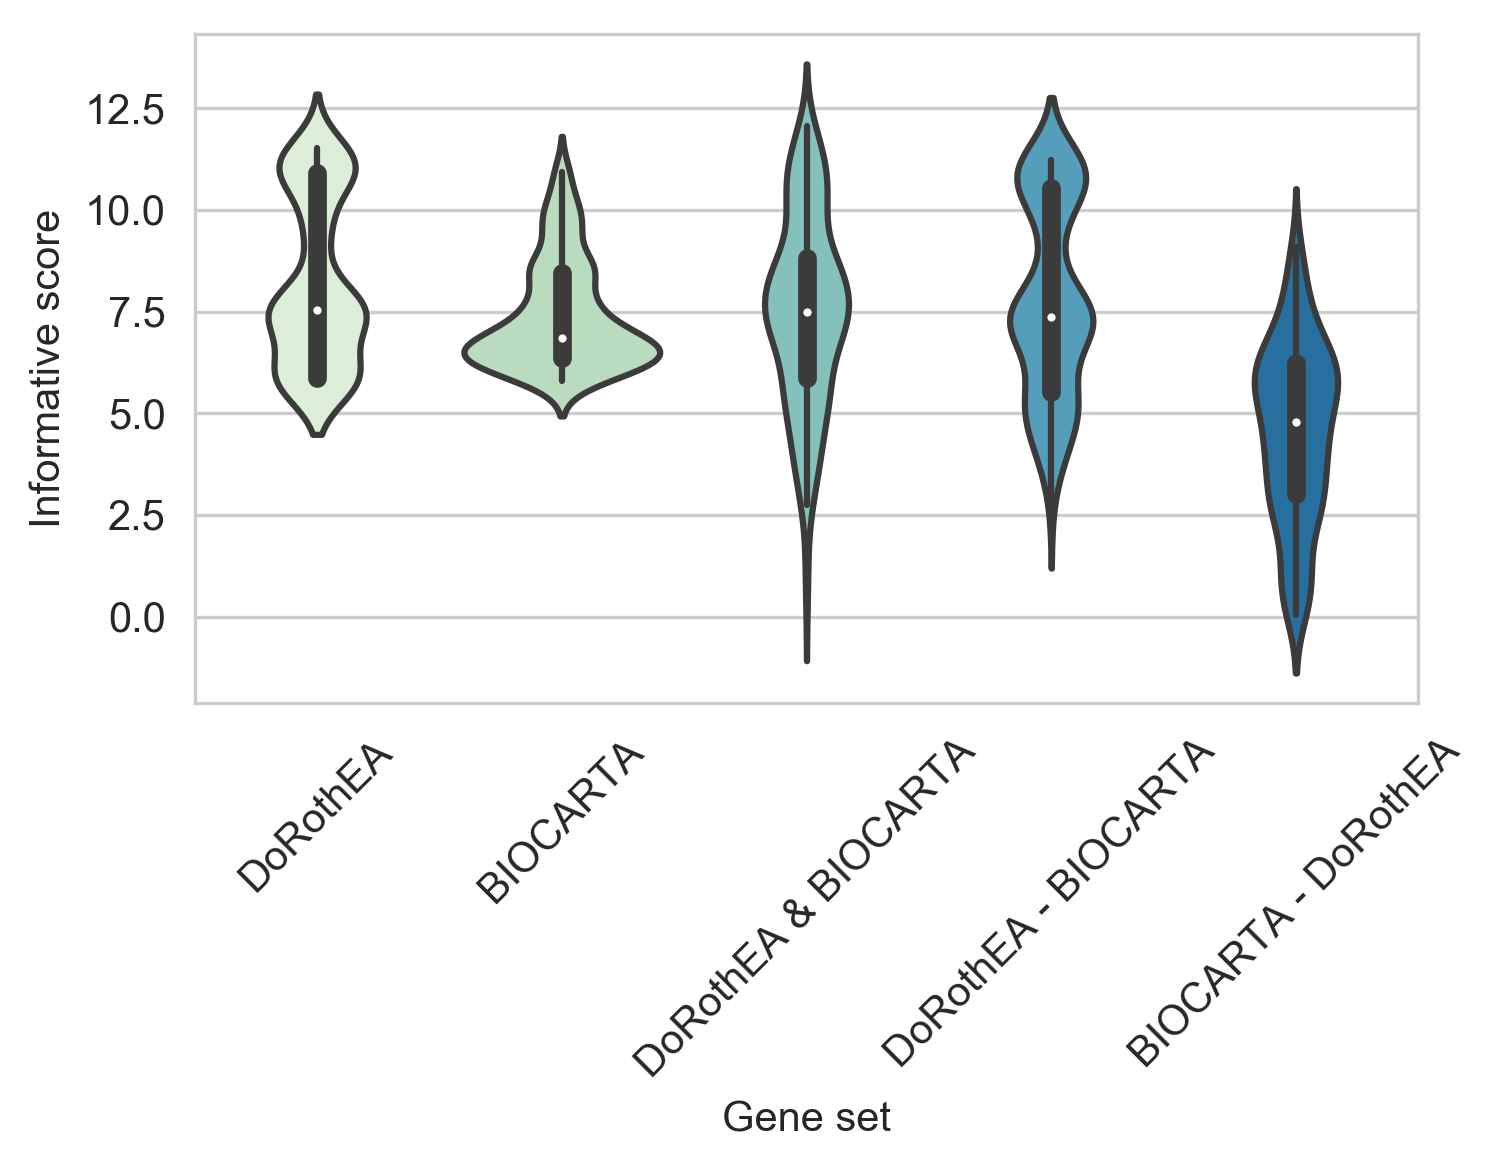

In [83]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',5)
sns.violinplot(x='Gene set',y='Informative score',data=results)
plt.xticks(rotation=45)
plt.xticks([0,1,2,3,4],['DoRothEA','BIOCARTA','DoRothEA & BIOCARTA','DoRothEA - BIOCARTA','BIOCARTA - DoRothEA'])
plt.tight_layout()
plt.savefig('../figures/raw/Fig5A.pdf')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


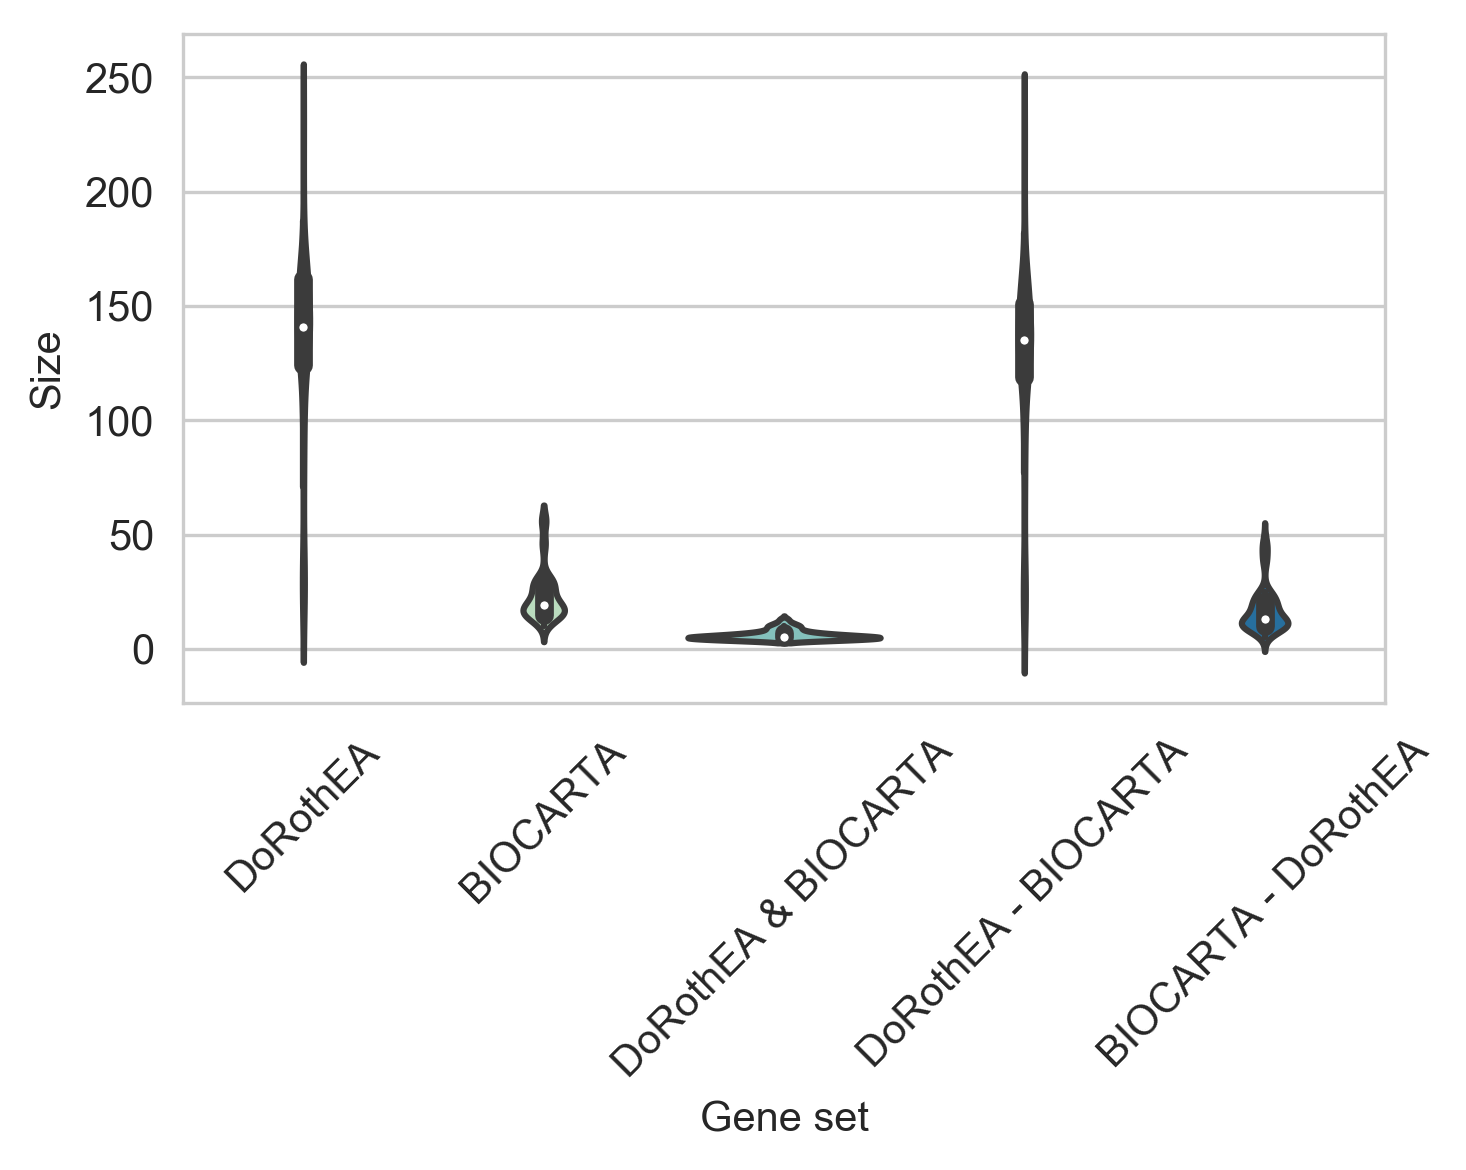

In [84]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',5)
sns.violinplot(x='Gene set',y='Size',data=results_genesets)
plt.xticks(rotation=45)
plt.xticks([0,1,2,3,4],['DoRothEA','BIOCARTA','DoRothEA & BIOCARTA','DoRothEA - BIOCARTA','BIOCARTA - DoRothEA'])
plt.tight_layout()
plt.savefig('../figures/raw/SFig7A.pdf')

In [85]:
results_all=pd.concat([results,results_genesets],1)
results_all.columns=['Set1','Score','Set2','Size']
model=ols('Score ~ Set1 + Size',data=results_all[np.in1d(results_all['Set1'],[dname1+' - '+dname2,
                                                                            dname2+' - '+dname1])]).fit()
sm.stats.anova_lm(model)

df       sum_sq      mean_sq           F        PR(>F)
Set1        1.0  1424.488115  1424.488115  275.082311  2.068847e-50
Size        1.0    19.731220    19.731220    3.810288  5.144484e-02
Residual  551.0  2853.302152     5.178407         NaN           NaN

In [86]:
all_size=pd.DataFrame(columns=['Set','Size'])
all_scores=pd.DataFrame(columns=['Set','Score'])
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
for geneset in datasets:
    size=pd.read_csv('../results/genesets/single/csvs/'+geneset+'_filtered.csv',sep=',',header=0,index_col=0)['Set'].value_counts()
    size=pd.DataFrame(size)
    size['X']=geneset
    size.columns=['Size','Set']
    size=size[['Set','Size']]
    all_size=pd.concat([all_size,size])
    score=pd.read_csv('../results/benchmark/z_scores/progeny/single/'+geneset+'_filtered_abs.csv',
                   sep=',',header=0,index_col=0).abs().max()
    score=pd.DataFrame(score)
    score['X']=geneset
    score.columns=['Score','Set']
    score=score[['Set','Score']]
    all_scores=pd.concat([all_scores,score])
all_size=all_size.loc[all_scores.index]
all_size=all_size.iloc[::-1,]
all_scores=all_scores.iloc[::-1,]

(0.18717852777388722, 5.315752974862208e-40)
CGP (0.18742466826163076, 1.3907096435330254e-23)
REACTOME (0.17067498362001235, 6.163748259733983e-10)
BIOCARTA (0.04019297351183162, 0.5045160152550738)
KEGG (0.15845033390698166, 0.03363137293126007)
BEST_dorothea_CD (0.092177980519195, 0.14779337509209656)
BEST_dorothea_AB (0.3240851636743959, 0.0005864299843948826)


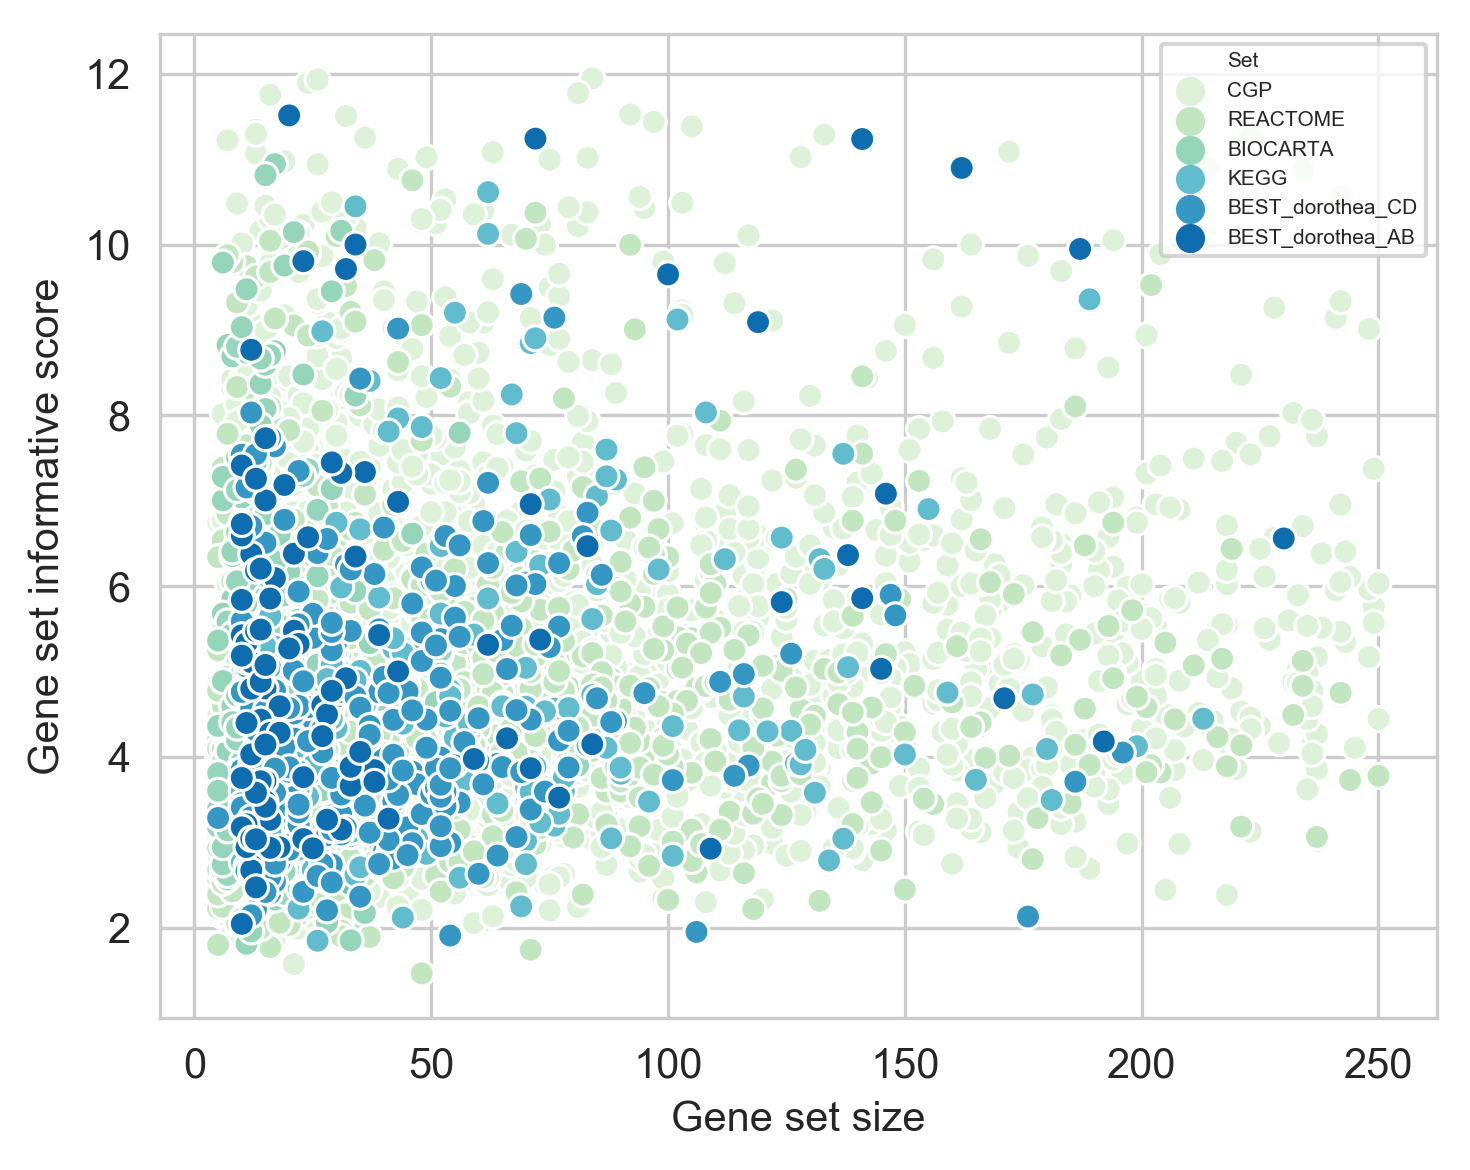

In [87]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',6)
sns.scatterplot(all_size['Size'],all_scores['Score'],hue=all_scores['Set'])
plt.xlabel('Gene set size')
plt.ylabel('Gene set informative score')
plt.legend(prop={"size":5})
print(pcor(all_size['Size'],all_scores['Score']))
for s in all_scores['Set'].unique():
    fil=all_scores['Set']==s
    print(s,pcor(all_size['Size'][fil],all_scores['Score'][fil]))
plt.tight_layout()
plt.savefig('../figures/raw/SFig7B.pdf')

In [88]:
def calc_overlap(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs'):
    good1=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname1,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s_filtered%s.csv' % (bname,dname2,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    results=pd.DataFrame(index=range(len(score_overlap)))
    
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    return np.median(results[dname1+' - '+dname2]),np.median(results[dname2+' - '+dname1])

In [133]:
def plot_median_info_score(bname='progeny',atype='_abs',plotname='Fig5B'):
    results=pd.DataFrame(columns=['Set1','Set2','Score'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            print(dname1,dname2)
            if dname1 < dname2:
                s1,s2=calc_overlap(dname1,dname2,bname=bname,atype=atype)
                data=pd.DataFrame(index=range(len(results),len(results)+2),columns=results.columns)
                data['Set1']=[dname1,dname2]
                data['Set2']=[dname2,dname1]
                data['Score']=[s1,s2]
                results=pd.concat([results,data])
    results['Data_driven']=False
    fil=np.in1d(results['Set1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results.loc[results.index[fil],'Data_driven']=True
    results=results.sort_values('Set1')

    model = ols('Score ~ Data_driven',data=results).fit()
    print(sm.stats.anova_lm(model))
    model = ols('Score ~ Set1',data=results).fit()
    print('')
    print(model.pvalues)
    plt.figure(figsize=(5,4),dpi=300)
    results.columns=['Gene set','Set2','Score','Data_driven']
    sns.set_palette('GnBu',6)
    sns.boxplot(x='Data_driven',y='Score',hue='Gene set',data=results)
    plt.xticks(rotation=45)
    plt.xlabel('Data driven gene set')
    plt.ylabel('Median informative score')
    plt.tight_layout()
    if plotname:
        plt.savefig('../figures/raw/%s.pdf' % plotname)

BEST_dorothea_AB BEST_dorothea_AB
BEST_dorothea_AB BEST_dorothea_CD
BEST_dorothea_AB KEGG
BEST_dorothea_AB BIOCARTA
BEST_dorothea_AB REACTOME
BEST_dorothea_AB CGP
BEST_dorothea_CD BEST_dorothea_AB
BEST_dorothea_CD BEST_dorothea_CD
BEST_dorothea_CD KEGG
BEST_dorothea_CD BIOCARTA
BEST_dorothea_CD REACTOME
BEST_dorothea_CD CGP
KEGG BEST_dorothea_AB
KEGG BEST_dorothea_CD
KEGG KEGG
KEGG BIOCARTA
KEGG REACTOME
KEGG CGP
BIOCARTA BEST_dorothea_AB
BIOCARTA BEST_dorothea_CD
BIOCARTA KEGG
BIOCARTA BIOCARTA
BIOCARTA REACTOME
BIOCARTA CGP
REACTOME BEST_dorothea_AB
REACTOME BEST_dorothea_CD
REACTOME KEGG
REACTOME BIOCARTA
REACTOME REACTOME
REACTOME CGP
CGP BEST_dorothea_AB
CGP BEST_dorothea_CD
CGP KEGG
CGP BIOCARTA
CGP REACTOME
CGP CGP
               df    sum_sq   mean_sq         F    PR(>F)
Data_driven   1.0  0.317197  0.317197  1.487552  0.232771
Residual     28.0  5.970560  0.213234       NaN       NaN

Intercept                   6.421866e-18
Set1[T.BEST_dorothea_CD]    1.518509e-03
Set1[T.BIOC

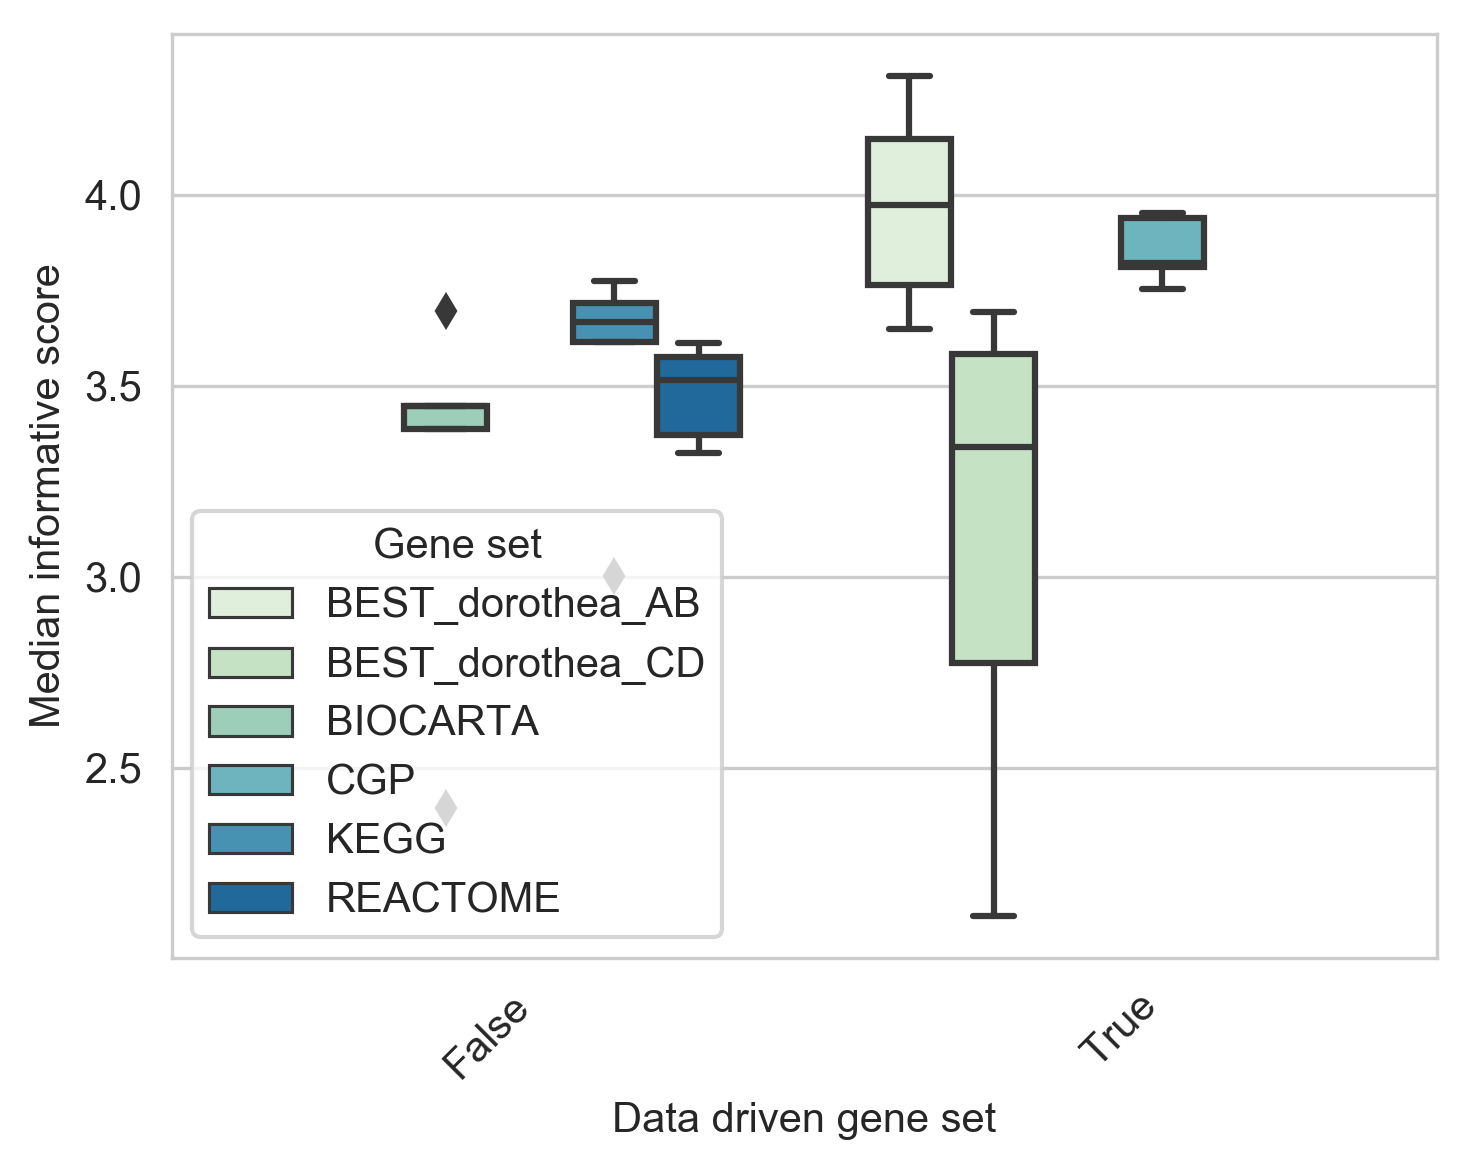

In [135]:
plot_median_info_score(bname='gdsc',atype='_abs',plotname='Fig5C')

In [116]:
results['Data_driven']=False
fil=np.in1d(results['Set1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
results.loc[results.index[fil],'Data_driven']=True

In [125]:
model = ols('Score ~ Data_driven',data=results).fit()
print(sm.stats.anova_lm(model))

               df     sum_sq   mean_sq         F    PR(>F)
Data_driven   1.0   3.231819  3.231819  7.735794  0.009576
Residual     28.0  11.697693  0.417775       NaN       NaN


In [130]:
results

Set1              Set2     Score  Data_driven
0   BEST_dorothea_AB  BEST_dorothea_CD  7.379857         True
1   BEST_dorothea_CD  BEST_dorothea_AB  4.950333         True
2   BEST_dorothea_AB              KEGG  7.184724         True
3               KEGG  BEST_dorothea_AB  6.081349        False
4   BEST_dorothea_AB          BIOCARTA  7.369807         True
5           BIOCARTA  BEST_dorothea_AB  4.780325        False
6   BEST_dorothea_AB          REACTOME  7.339658         True
7           REACTOME  BEST_dorothea_AB  5.990322        False
8   BEST_dorothea_AB               CGP  7.384044         True
9                CGP  BEST_dorothea_AB  6.285273         True
10  BEST_dorothea_CD              KEGG  6.699406         True
11              KEGG  BEST_dorothea_CD  6.845546        False
12  BEST_dorothea_CD          BIOCARTA  6.644132         True
13          BIOCARTA  BEST_dorothea_CD  5.889565        False
14  BEST_dorothea_CD          REACTOME  6.803024         True
15          REACTOME  BEST_dorothea_CD  6.271582        False
16  BEST_dorothea_CD               CGP  6.483755         True
17               CGP  BEST_dorothea_CD  6.722352         True
18              KEGG          REACTOME  7.042353        False
19          REACTOME              KEGG  6.493386        False
20          BIOCARTA              KEGG  5.305424        False
21              KEGG          BIOCARTA  6.838009        False
22          BIOCARTA          REACTOME  5.941070        False
23          REACTOME          BIOCARTA  6.820419        False
24          BIOCARTA               CGP  5.256340        False
25               CGP          BIOCARTA  7.419582         True
26               CGP              KEGG  6.808865         True
27              KEGG               CGP  6.501454        False
28               CGP          REACTOME  6.561132         True
29          REACTOME               CGP  6.132251        False